# Data Cleaning
Let's check out the data and handle missing values etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os 


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), ".."))) # adds folder to Python path

Let's load the data

In [3]:

from src.data.load_data import load_data
import importlib
#importlib.reload(load_data)  # reloads the module to get the latest changes

claims_raw, _ = load_data(raw=True) # returns train and test dataframes
claims_raw.head()


IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0  2122523.0        0      0.43    D         7      18       36          95   
1  3173420.0        0      0.10    D         7      17       80          95   
2  1188619.0        0      0.33    E         7       3       36          76   
3    31400.0        0      0.56    A         5       4       73          52   
4  3138755.0        0      0.27    E         8       0       37          50   

  VehBrand   VehGas  Density Region  
0       B1  Regular     1054    R24  
1       B2  Regular      598    R25  
2       B6  Regular     4172    R82  
3      B13   Diesel       15    R24  
4      B11   Diesel     3021    R53

Quick description

In [3]:
num_features = claims_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = claims_raw.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical:", num_features)
print("Categorical:", cat_features)

target = ["ClaimNb"]


num_features = [c for c in num_features if c not in target]
num_features.remove("IDpol")
cat_features.insert(0, "IDpol")
num_features.remove("VehPower")


claims_raw.info()
claims_raw.shape

Numerical: ['IDpol', 'ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']
Categorical: ['Area', 'VehBrand', 'VehGas', 'Region']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542410 entries, 0 to 542409
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       542410 non-null  float64
 1   ClaimNb     542410 non-null  int64  
 2   Exposure    542410 non-null  float64
 3   Area        542410 non-null  object 
 4   VehPower    542410 non-null  int64  
 5   VehAge      542410 non-null  int64  
 6   DrivAge     542410 non-null  int64  
 7   BonusMalus  542410 non-null  int64  
 8   VehBrand    542410 non-null  object 
 9   VehGas      542410 non-null  object 
 10  Density     542410 non-null  int64  
 11  Region      542410 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 49.7+ MB


(542410, 12)

Some objects that will need to be fixed. IDpol can be removed, as its just an identifier.

In [4]:

if "IDpol" in claims_raw.columns:
    print(pd.Series(claims_raw["IDpol"]).nunique())
    claims_raw.drop(["IDpol"], axis=1, inplace=True)  
claims_raw.info()


542410
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542410 entries, 0 to 542409
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ClaimNb     542410 non-null  int64  
 1   Exposure    542410 non-null  float64
 2   Area        542410 non-null  object 
 3   VehPower    542410 non-null  int64  
 4   VehAge      542410 non-null  int64  
 5   DrivAge     542410 non-null  int64  
 6   BonusMalus  542410 non-null  int64  
 7   VehBrand    542410 non-null  object 
 8   VehGas      542410 non-null  object 
 9   Density     542410 non-null  int64  
 10  Region      542410 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 45.5+ MB


In [5]:
claims_raw.isnull().sum()

ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [6]:
claims_raw.describe()

ClaimNb       Exposure       VehPower         VehAge  \
count  542410.000000  542410.000000  542410.000000  542410.000000   
mean        0.053122       0.528840       6.453281       7.045768   
std         0.238785       0.364463       2.050506       5.660827   
min         0.000000       0.002732       4.000000       0.000000   
25%         0.000000       0.180000       5.000000       2.000000   
50%         0.000000       0.490000       6.000000       6.000000   
75%         0.000000       0.990000       7.000000      11.000000   
max        11.000000       2.010000      15.000000     100.000000   

             DrivAge     BonusMalus        Density  
count  542410.000000  542410.000000  542410.000000  
mean       45.503164      59.761546    1796.176180  
std        14.135435      15.639321    3965.475251  
min        18.000000      50.000000       1.000000  
25%        34.000000      50.000000      92.000000  
50%        44.000000      50.000000     393.000000  
75%        55.000000      64.000000    1662.000000  
max       100.000000     230.000000   27000.000000

So as we can see while there are no null values or missing cells, we have some major issues, for example outliers as well as skewed data, lets go over each features.

# EDA

## Univariate analysis

### `ClaimNb`
Let's start with Numerical values and examine ClaimNb.

In [7]:
claims_raw["ClaimNb"].value_counts()


ClaimNb
0     515199
1      25718
2       1416
3         67
4          4
11         2
5          2
6          1
9          1
Name: count, dtype: int64

As we can see, close to 95% of the data has 0 claims and 4.7% has 1.

In [8]:
claims_raw['ClaimNb'].describe()

count    542410.000000
mean          0.053122
std           0.238785
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: ClaimNb, dtype: float64

super right-skewed, heavy-tailed distribution

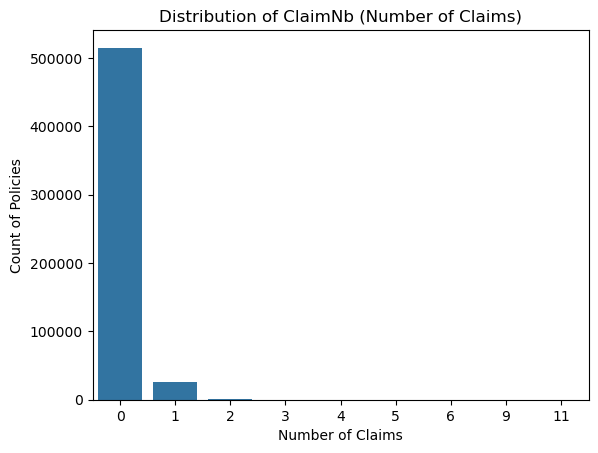

In [9]:
sns.countplot(x='ClaimNb', data=claims_raw)
plt.title("Distribution of ClaimNb (Number of Claims)")
plt.xlabel("Number of Claims")
plt.ylabel("Count of Policies")
plt.show()

In [10]:
from scipy.stats import skew

skew_value = skew(claims_raw['ClaimNb'])
print(f"Skewness: {skew_value:.3f}")

Skewness: 5.140


nothing is really visible, let's try log-scale

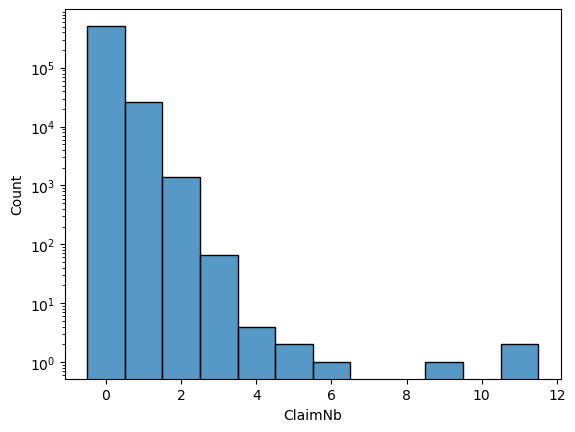

In [11]:
sns.histplot(claims_raw['ClaimNb'], bins=30, discrete=True)
plt.yscale('log')  # helps see rare high-claim values
plt.show()

As we can see, we have a few extreme outliers, (upto 11 claims!), they reflect high-risk cases and not data errors. These can also be fraud attempts/cases. As they are real errors, they should be kept, and treated carefully, but most likely some kind of tranformation is needed. We also have to take into consideration Exposure as its part of the target.

### `Exposure`

In [4]:
print(claims_raw['Exposure'].describe())

count    542410.000000
mean          0.528840
std           0.364463
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64


In [8]:
claims_raw["Exposure"].sort_values().reset_index(drop=True).value_counts().sort_index()


Exposure
0.002732     257
0.002732     597
0.002740     245
0.002740    1403
0.005464     354
            ... 
1.930000       1
1.980000       1
1.990000       1
2.000000       1
2.010000       2
Name: count, Length: 186, dtype: int64

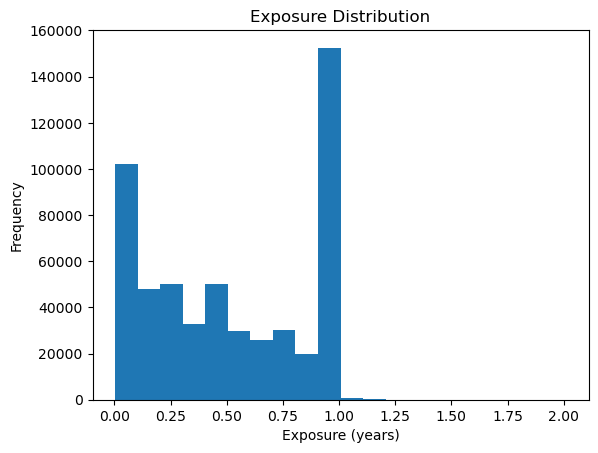

In [13]:
plt.hist(claims_raw['Exposure'], bins=20)
plt.title("Exposure Distribution")
plt.xlabel("Exposure (years)")
plt.ylabel("Frequency")
plt.show()


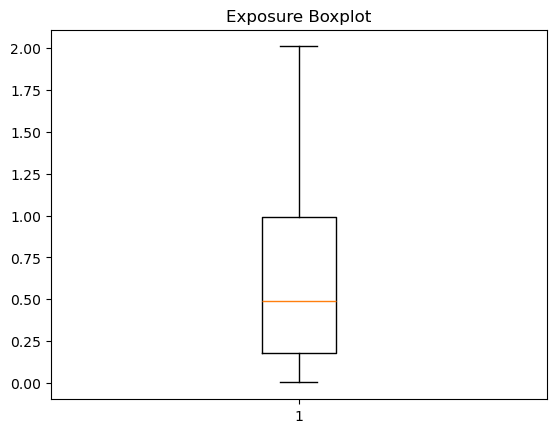

In [14]:
plt.boxplot(claims_raw['Exposure'])
plt.title("Exposure Boxplot")
plt.show()


From this we can see that most exposures are 1 year long or somewhere just over 0 year, so a short duration. As we can see from the histogram, Exposure seems to have a bimodal distributions with one mean around 0 and one mean around 1.
There are also some that are longer than 1 year, lets check these out as well.

count    994.000000
mean       1.115433
std        0.163890
min        1.010000
25%        1.020000
50%        1.040000
75%        1.150000
max        2.010000
Name: Exposure, dtype: float64


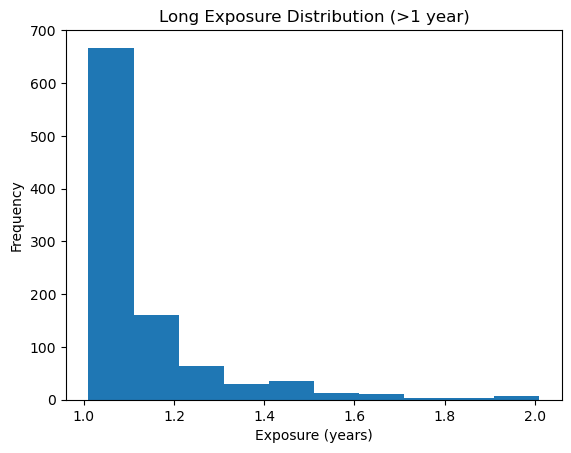

In [15]:
long_exposures = claims_raw[claims_raw['Exposure'] > 1]
print(long_exposures['Exposure'].describe())
plt.hist(long_exposures['Exposure'], bins=10)
plt.title("Long Exposure Distribution (>1 year)")
plt.xlabel("Exposure (years)")
plt.ylabel("Frequency")
plt.show()

Also, the smallest exposure is .00027 years long which is equal to roughly 24 hours or 1 day. If the target variable will be Claims/Exposure, this could make the target incredibly large. These extreme values needs to be thought of later on.

In [9]:
## lets check with a 0.01 cutoff
short_exposures = claims_raw[claims_raw['Exposure'] < 0.01]
print(short_exposures['Exposure'].describe())

count    5509.000000
mean        0.004934
std         0.002244
min         0.002732
25%         0.002740
50%         0.005464
75%         0.008197
max         0.008219
Name: Exposure, dtype: float64


Almost 1% of the `Exposure` would be capped wih a 0.01 threshold.

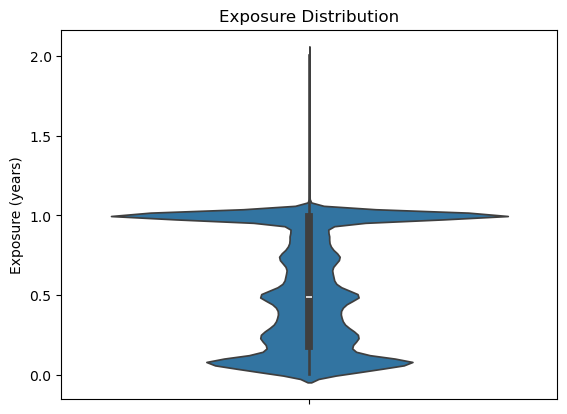

In [16]:
sns.violinplot(y=claims_raw['Exposure'])
plt.title("Exposure Distribution")
plt.ylabel("Exposure (years)")
plt.show()

The violin plot also helps to see how the data is distributed.

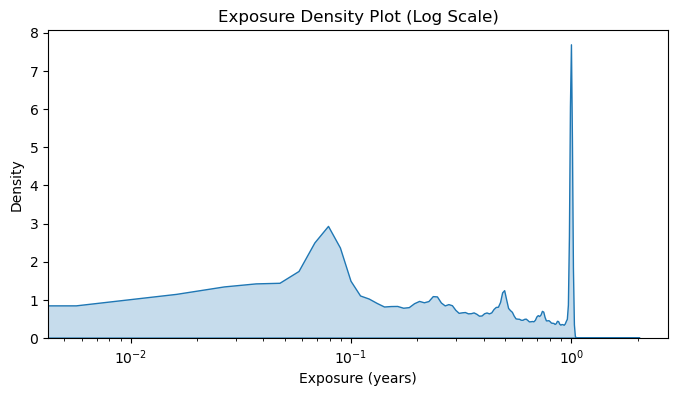

In [17]:
plt.figure(figsize=(8,4))
sns.kdeplot(claims_raw['Exposure'], bw_adjust=0.5, fill=True)
plt.xscale('log')
plt.title("Exposure Density Plot (Log Scale)")
plt.xlabel("Exposure (years)")
plt.show()

The KDE plot also shows the bimodality. 
<p> so overall the data is bimodal, the minimum is extremely low the maximum is 2. Exposure can be essential for normalizing claimsNb

### `VehPower`

In [14]:
print(claims_raw["VehPower"].describe())

count    542410.000000
mean          6.453281
std           2.050506
min           4.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          15.000000
Name: VehPower, dtype: float64


In [15]:
print(claims_raw["VehPower"].value_counts())

VehPower
6     119230
7     116340
5      99841
4      92413
8      37369
10     25159
9      24080
11     14652
12      6515
13      2582
15      2321
14      1908
Name: count, dtype: int64


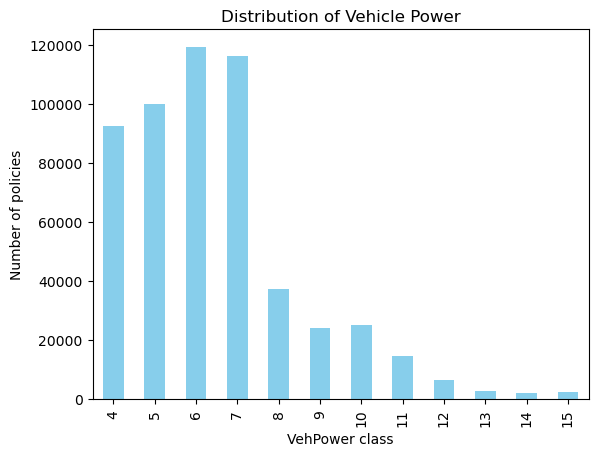

In [20]:
claims_raw['VehPower'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("VehPower class")
plt.ylabel("Number of policies")
plt.title("Distribution of Vehicle Power")
plt.show()

This feature is just rating classes. We know from the documentation that higher values correspond to highervehicle power. As these are discrete categories and not continous values, for linear models or neural networks it might be worth treating these as categoires, as we dont know if the difference between 6 and 7 is the same as the difference between 12 and 13.
<p> What we can observe though, is that most people who have insurances have lower power cars. This could be simply because most people have lower power rating cars and only rich people have high ones.
<p> As Power from 12 to 15 are rare, we could bin them together, so we keep monotonicity more and reduce noise in the rarer high-power bins. We could also bin 8-9 and 10-11.

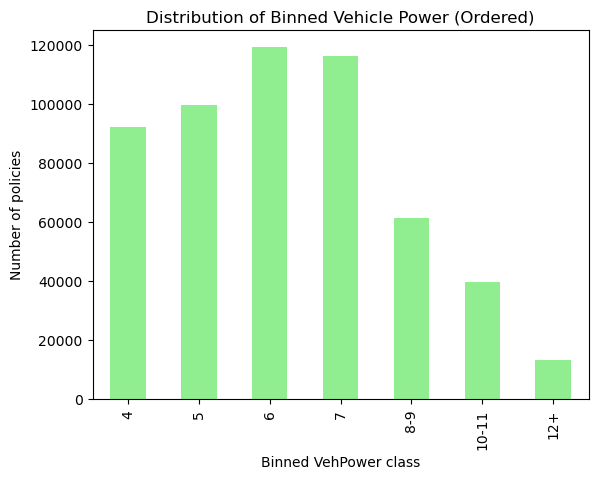

In [19]:
# lets make bins like this: 4,5,6,7, 8-9, 10-11, 12+
def bin_vehpower(vp):
    if vp <= 7:
        return str(vp)
    elif 8 <= vp <= 9:
        return "8-9"
    elif 10 <= vp <= 11:
        return "10-11"
    else:
        return "12+"
claims_raw['VehPower_binned'] = claims_raw['VehPower'].apply(bin_vehpower)
# claims_raw['VehPower_binned'].value_counts().sort_index().plot(kind='bar', color='salmon')
# plt.xlabel("Binned VehPower class")
# plt.ylabel("Number of policies")
# plt.title("Distribution of Binned Vehicle Power")
# plt.show()
# the order is wrong of the columns in the plot, lets fix that, as 10-11 and 12+ are at the start
vehpower_order = ['4', '5', '6', '7', '8-9', '10-11', '12+']
claims_raw['VehPower_binned'].value_counts().reindex(vehpower_order).plot(kind='bar', color='lightgreen')
plt.xlabel("Binned VehPower class")
plt.ylabel("Number of policies")
plt.title("Distribution of Binned Vehicle Power (Ordered)")
plt.show()


This looks much better than before.

Another approach that will need more consideration, is combining `VehPower` with another feature(e.g `DriverAge`), as for example younger drivers who drive luxury cars might cause more accidents than young people driving normal cars or older people driving luxury cars,

### `VehAge`

In [21]:
print(claims_raw["VehAge"].describe())

count    542410.000000
mean          7.045768
std           5.660827
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max         100.000000
Name: VehAge, dtype: float64


In [26]:
print(claims_raw["VehAge"].value_counts().sort_values(ascending=False).head(30))

VehAge
1     57009
2     47321
0     46072
3     40272
4     34753
5     31018
10    30931
6     28426
7     26310
8     26052
9     25614
11    23552
12    23283
13    21884
14    19695
15    18764
16    12297
17     8934
18     6565
19     4386
20     2665
21     1769
22     1135
23      719
24      524
25      405
26      280
27      252
28      234
29      218
Name: count, dtype: int64


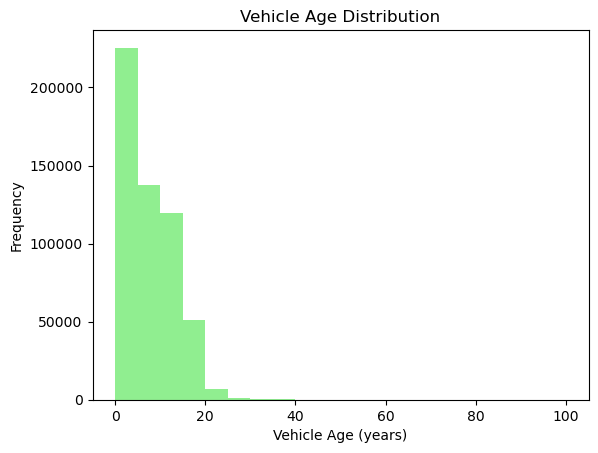

In [22]:
plt.hist(claims_raw['VehAge'], bins=20, color='lightgreen')
plt.title("Vehicle Age Distribution")
plt.xlabel("Vehicle Age (years)")
plt.ylabel("Frequency")
plt.show()

In [23]:
skew_value = skew(claims_raw['VehAge'])
print(f"Skewness: {skew_value:.3f}")

Skewness: 1.136


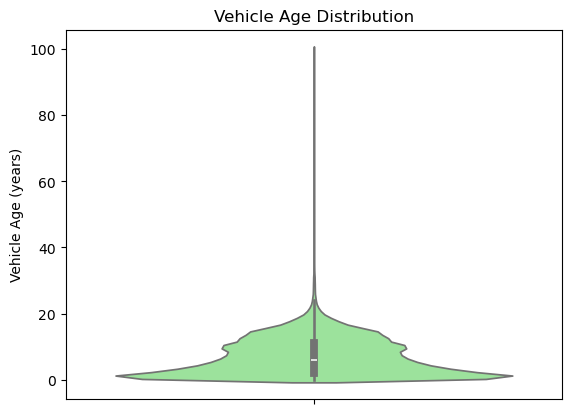

In [24]:
sns.violinplot(y=claims_raw['VehAge'], color='lightgreen')
plt.title("Vehicle Age Distribution")
plt.ylabel("Vehicle Age (years)")
plt.show()


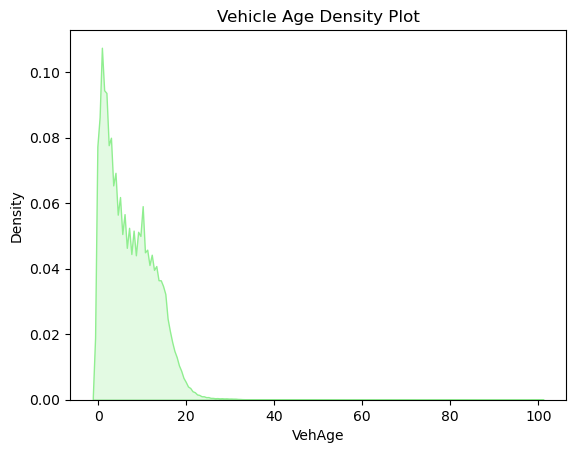

In [25]:
sns.kdeplot(claims_raw['VehAge'], fill=True, color='lightgreen')
plt.title("Vehicle Age Density Plot")
plt.show()

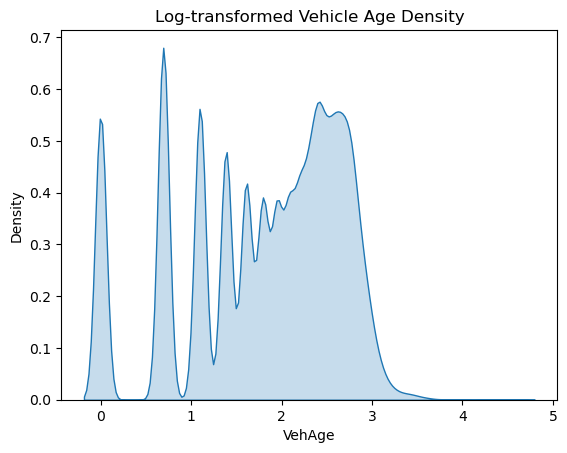

In [26]:
sns.kdeplot(np.log1p(claims_raw['VehAge']), fill=True)
plt.title("Log-transformed Vehicle Age Density")
plt.show()



`VehAge` represents the age of the vehicle in years. The distribution is right-skewed, with most vehicles being relatively new (0–5 years) and fewer older vehicles forming a long tail. The ages in the dataset typically range from 0 to around 15 years, with occasional older vehicles appearing as outliers. This skew suggests that for some models, applying a log transformation or binning the feature could help reduce the influence of extreme values. A histogram or violinplot effectively illustrates the concentration of newer vehicles and the presence of older ones in the dataset.

<p> Let's try binning how it does.


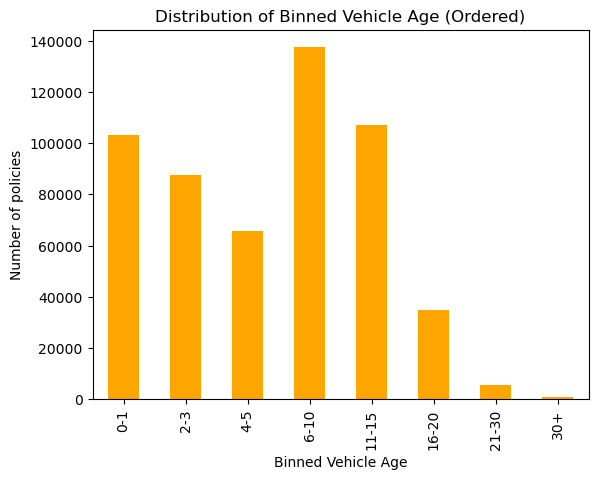

In [27]:
# lets try binning VehAge with teh following bins : 0-1, 2-3, 4-5, 6-10, 11-15, 16-20, 21-30, 30+
def bin_vehage(va):
    if va <= 1:
        return "0-1"
    elif 2 <= va <= 3:
        return "2-3"
    elif 4 <= va <= 5:
        return "4-5"
    elif 6 <= va <= 10:
        return "6-10"
    elif 11 <= va <= 15:
        return "11-15"
    elif 16 <= va <= 20:
        return "16-20"
    elif 21 <= va <= 30:
        return "21-30"
    else:
        return "30+"
    
claims_raw['VehAge_binned'] = claims_raw['VehAge'].apply(bin_vehage)
vehage_order = ["0-1", "2-3", "4-5", "6-10", "11-15", "16-20", "21-30", "30+"]
claims_raw['VehAge_binned'].value_counts().reindex(vehage_order).plot(kind='bar', color='orange')
plt.xlabel("Binned Vehicle Age")
plt.ylabel("Number of policies")
plt.title("Distribution of Binned Vehicle Age (Ordered)")
plt.show()

### `DrivAge`


In [40]:
print(claims_raw["DrivAge"].describe())

count    542410.000000
mean         45.503164
std          14.135435
min          18.000000
25%          34.000000
50%          44.000000
75%          55.000000
max         100.000000
Name: DrivAge, dtype: float64


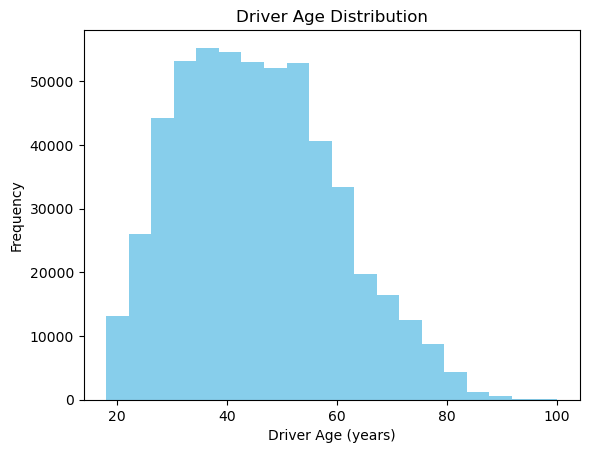

Skewness: 0.436


In [43]:
from scipy.stats import skew
plt.hist(claims_raw['DrivAge'], bins=20, color='skyblue')
plt.title("Driver Age Distribution")
plt.xlabel("Driver Age (years)")
plt.ylabel("Frequency")
plt.show()
skew_value = skew(claims_raw['DrivAge'])
print(f"Skewness: {skew_value:.3f}")

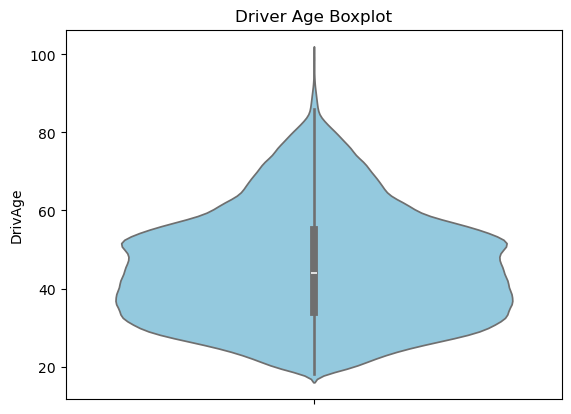

In [29]:
sns.violinplot(y=claims_raw['DrivAge'], color='skyblue')
plt.title("Driver Age Boxplot")
plt.show()


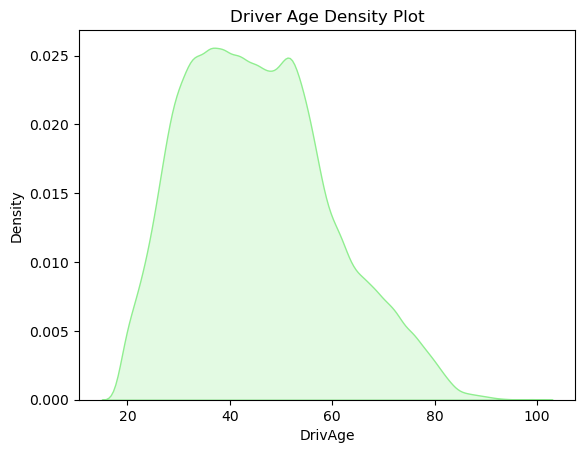

In [30]:
sns.kdeplot(claims_raw['DrivAge'], fill=True, color='lightgreen')
plt.title("Driver Age Density Plot")
plt.show()


In [31]:

skew_value = skew(claims_raw['DrivAge'])
print(f"Skewness: {skew_value:.3f}")

Skewness: 0.436


`DrivAge` represents the age of the principal driver in years. The distribution is mildly right-skewed, with most drivers clustered in the young adult to middle-aged range, and relatively few very young or very old drivers. The ages in the dataset span from around 18 to 100 years, with extreme values being rare. Compared to highly skewed variables like `VehAge`, the skewness of `DrivAge` is minor (≈0.43), suggesting that it can generally be used as-is for modeling, though optional binning into age groups could improve interpretability in some models. Visualization via histogram or KDE illustrates the concentration of drivers in the middle age ranges and the tapering of older or younger extremes.

### `Density`

In [32]:
claims_raw['Density'].describe()


count    542410.000000
mean       1796.176180
std        3965.475251
min           1.000000
25%          92.000000
50%         393.000000
75%        1662.000000
max       27000.000000
Name: Density, dtype: float64

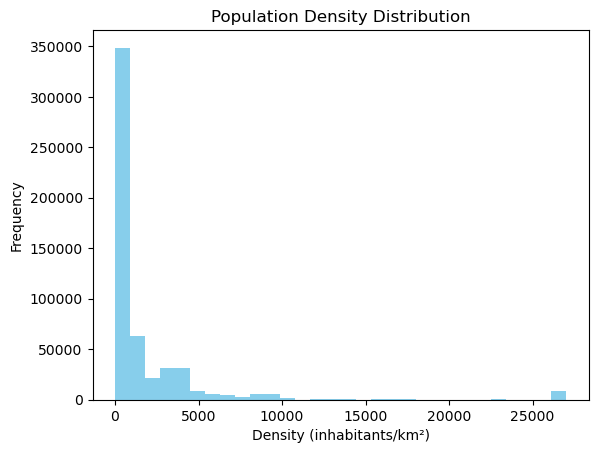

In [33]:
plt.hist(claims_raw['Density'], bins=30, color='skyblue')
plt.title("Population Density Distribution")
plt.xlabel("Density (inhabitants/km²)")
plt.ylabel("Frequency")
plt.show()


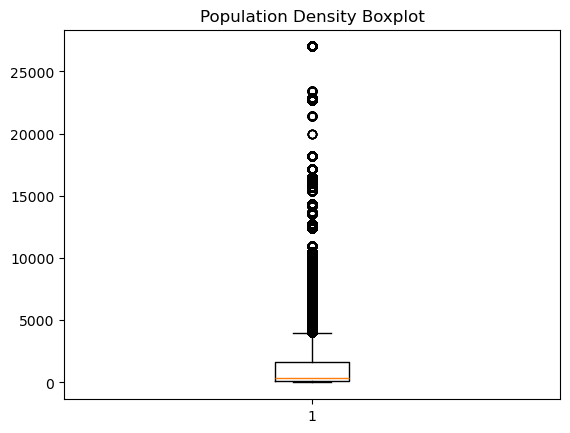

In [34]:
plt.boxplot(claims_raw['Density'])
plt.title("Population Density Boxplot")
plt.show()


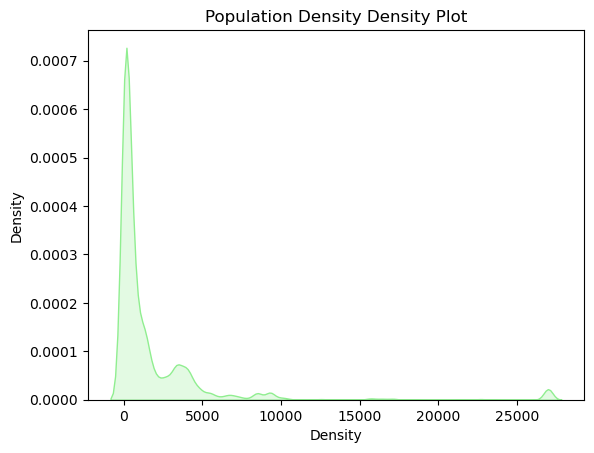

In [35]:
sns.kdeplot(claims_raw['Density'], fill=True, color='lightgreen')
plt.title("Population Density Density Plot")
plt.show()


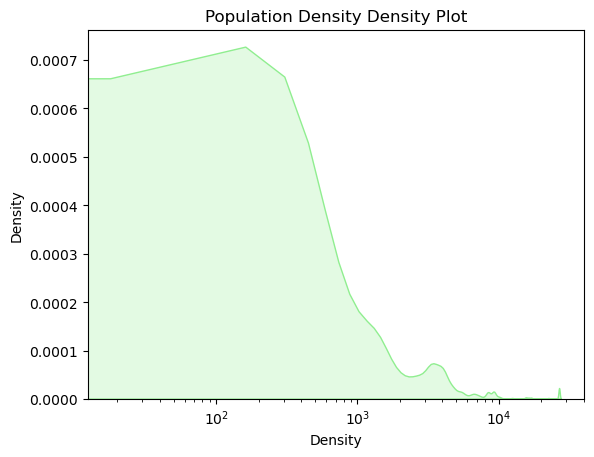

In [36]:
sns.kdeplot(claims_raw['Density'], fill=True, color='lightgreen')
plt.title("Population Density Density Plot")
plt.xscale('log')
plt.show()


In [37]:
# Very low densities
claims_raw[claims_raw['Density'] < 50]['Density'].describe()


count    82411.000000
mean        27.284792
std         12.369511
min          1.000000
25%         16.000000
50%         27.000000
75%         38.000000
max         49.000000
Name: Density, dtype: float64

In [38]:
# High densities
claims_raw[claims_raw['Density'] > 10000]['Density'].describe()

count    14404.000000
mean     22030.834699
std       6382.406020
min      10008.000000
25%      16052.000000
50%      27000.000000
75%      27000.000000
max      27000.000000
Name: Density, dtype: float64

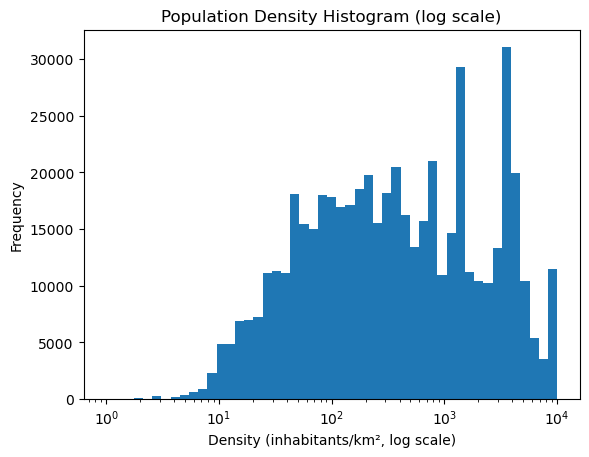

In [39]:
plt.hist(claims_raw['Density'], bins=np.logspace(0, 4, 50))
plt.xscale('log')
plt.xlabel("Density (inhabitants/km², log scale)")
plt.ylabel("Frequency")
plt.title("Population Density Histogram (log scale)")
plt.show()


In [40]:
skew_value = skew(claims_raw['Density'])
print(f"Skewness: {skew_value:.3f}")

Skewness: 4.645



`Density` represents the number of inhabitants per square kilometer in the driver’s area. The raw distribution is highly right-skewed, with most drivers living in low-to-moderate density areas and a few living in very densely populated regions, creating a small bump at the maximum. Applying a log transformation to the feature makes the bulk of the distribution roughly symmetric while still showing the extreme urban clusters as separate peaks. For modeling, the skew suggests that a log transformation or binning into categories (e.g., low, medium, high, very high density) could help reduce the influence of extreme values while preserving meaningful variation.
### `BonusMalus`

In [41]:
claims_raw["BonusMalus"].describe()

count    542410.000000
mean         59.761546
std          15.639321
min          50.000000
25%          50.000000
50%          50.000000
75%          64.000000
max         230.000000
Name: BonusMalus, dtype: float64

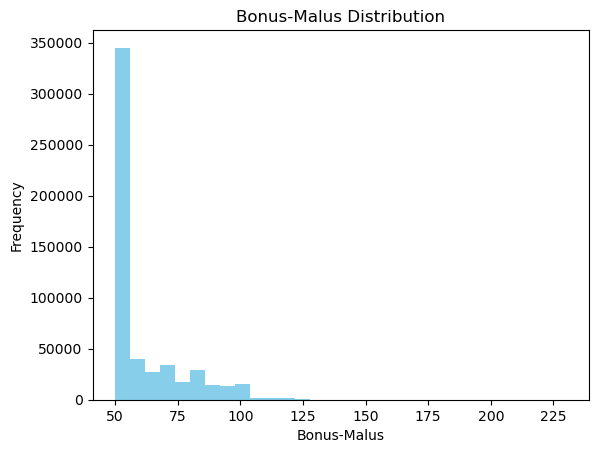

In [42]:
plt.hist(claims_raw['BonusMalus'], bins=30, color='skyblue')
plt.title("Bonus-Malus Distribution")
plt.xlabel("Bonus-Malus")
plt.ylabel("Frequency")
plt.show()


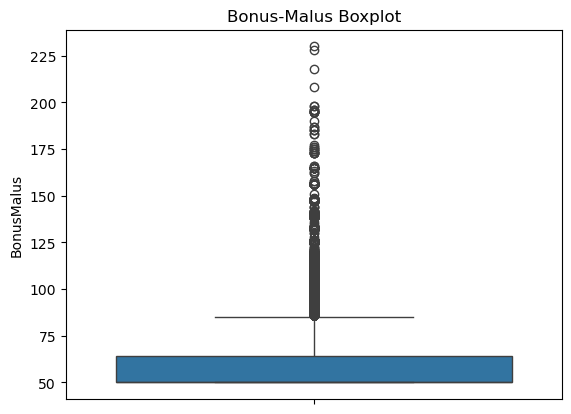

In [43]:
sns.boxplot(claims_raw['BonusMalus'])
plt.title("Bonus-Malus Boxplot")
plt.show()


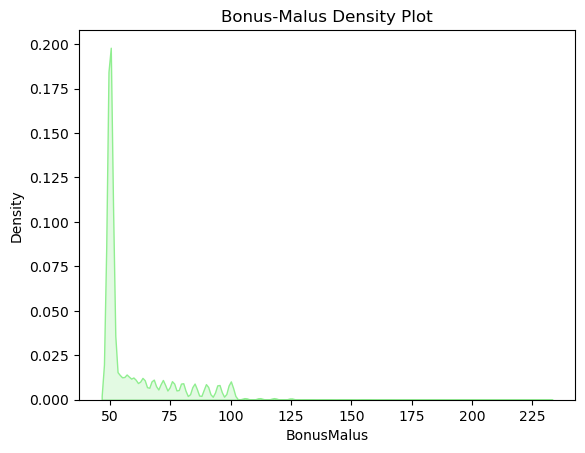

In [44]:
sns.kdeplot(claims_raw['BonusMalus'], fill=True, color='lightgreen')
plt.title("Bonus-Malus Density Plot")
plt.show()


In [45]:
skew_value = skew(claims_raw['BonusMalus'])
print(f"Skewness: {skew_value:.3f}")

Skewness: 1.730


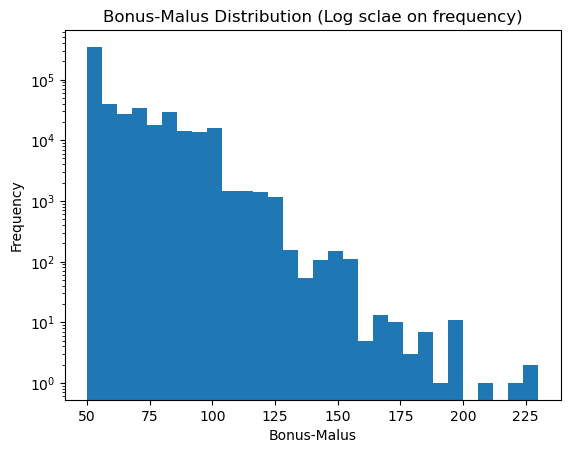

In [46]:
plt.hist(claims_raw['BonusMalus'], bins=30)
plt.title("Bonus-Malus Distribution (Log sclae on frequency)")
plt.xlabel("Bonus-Malus")
plt.yscale("log")
plt.ylabel("Frequency")
plt.show()




`BonusMalus` represents the driver’s insurance score, where values below 100 indicate a bonus (good driving record) and values above 100 indicate a malus (worse record). The distribution is heavily right-skewed, with the majority of drivers clustered in the bonus range and a long tail of high malus values. Log-scaling does not significantly normalize the distribution due to its narrow range, so visualizations such as violin plots with overlaid points or histograms with custom bins are recommended to clearly display both the dense bulk and the extreme malus tail. For modeling, the skew can be addressed by binning into categories or applying mild transformations if needed.
<p> Now let's do the categorical features.


### `VehBrand`

In [47]:
claims_raw["VehBrand"].unique()

array(['B1', 'B2', 'B6', 'B13', 'B11', 'B5', 'B12', 'B3', 'B10', 'B4',
       'B14'], dtype=object)

In [48]:
claims_raw["VehBrand"].value_counts()

VehBrand
B12    132831
B1     130256
B2     127821
B3      42682
B5      27850
B6      22754
B4      20186
B10     14220
B11     10889
B13      9680
B14      3241
Name: count, dtype: int64

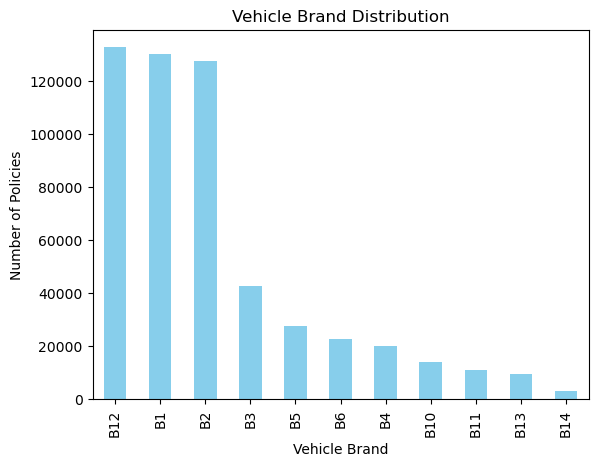

In [49]:
claims_raw['VehBrand'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Vehicle Brand Distribution")
plt.xlabel("Vehicle Brand")
plt.ylabel("Number of Policies")
plt.show()




`VehBrand` represents the anonymized vehicle brand category. There are 11 brands in the dataset, with `B12`, `B1`, and `B2` being the most common, while the remaining brands occur less frequently but without extreme imbalance.  The distribution is mildy uneven, but all categories have sufficient representation for modeling. For modeling purposes, the feature can be treated as categorical, with one-hot encoding recommended for linear models or neural networks, and numeric encoding acceptable for tree-based models.


### `VehGas`

In [50]:
claims_raw["VehGas"].unique()

array(['Regular', 'Diesel'], dtype=object)

In [51]:
claims_raw["VehGas"].value_counts(normalize=True)

VehGas
Regular    0.510173
Diesel     0.489827
Name: proportion, dtype: float64

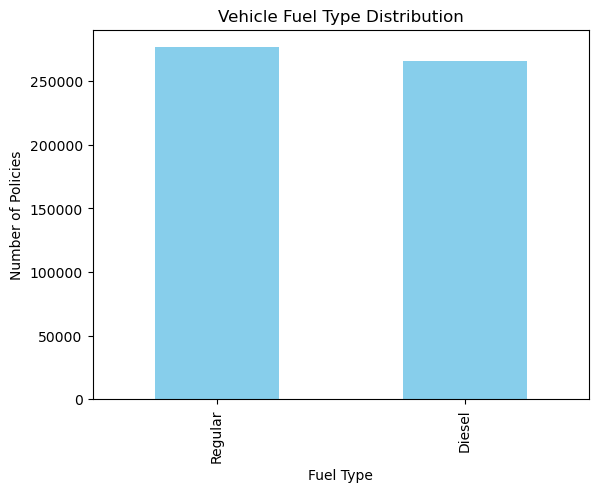

In [52]:
claims_raw['VehGas'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Vehicle Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Policies")
plt.show()



`VehGas` represents the fuel type of the vehicle. The dataset contains two categories: `Regular` (51%) and `Diesel` (49%), showing an almost even split. There are no  unexpected values. This binary feature is clean and balanced, and can be directly used for modeling, with binary or one-hot encoding as appropriate for the chosen algorithm.

### `Area` 

In [53]:
claims_raw["Area"].unique()

array(['D', 'E', 'A', 'C', 'B', 'F'], dtype=object)

In [54]:
print(claims_raw["Area"].value_counts(normalize=True))

Area
C    0.282604
D    0.223512
E    0.202635
A    0.153297
B    0.111397
F    0.026556
Name: proportion, dtype: float64


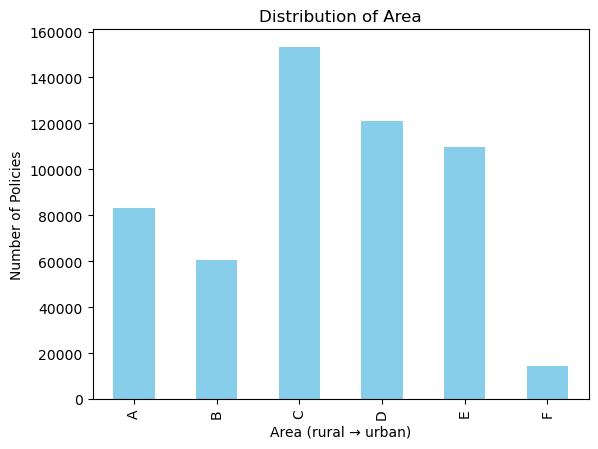

In [55]:
claims_raw['Area'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of Area")
plt.xlabel("Area (rural → urban)")
plt.ylabel("Number of Policies")
plt.show()


`Area` is an ordinal feature representing the type of location, from most rural (`A`) to more urban (`F`). The distribution shows that most policies are in moderately populated areas: `C` (28%), `D` (22%), and `E` (20%). Fewer policies are in the most rural areas, `A` (15%) and `B` (11%), while very sparsely populated areas `F` account for only 2.6% of policies. The ordinal nature of the feature makes it suitable for both ordinal encoding or one-hot encoding in modeling.


### `Region`

In [56]:
claims_raw['Region'].unique()

array(['R24', 'R25', 'R82', 'R53', 'R54', 'R11', 'R94', 'R93', 'R91',
       'R52', 'R72', 'R31', 'R73', 'R23', 'R22', 'R41', 'R42', 'R83',
       'R21', 'R26', 'R74', 'R43'], dtype=object)

In [57]:
claims_raw['Region'].value_counts(normalize=True)


Region
R24    0.236909
R82    0.124946
R93    0.117101
R11    0.103213
R53    0.062025
R52    0.057045
R91    0.052953
R72    0.046026
R31    0.040215
R54    0.028071
R73    0.025313
R41    0.019129
R25    0.016054
R26    0.015405
R23    0.012972
R22    0.011794
R83    0.007821
R74    0.006770
R94    0.006624
R21    0.004428
R42    0.003230
R43    0.001954
Name: proportion, dtype: float64

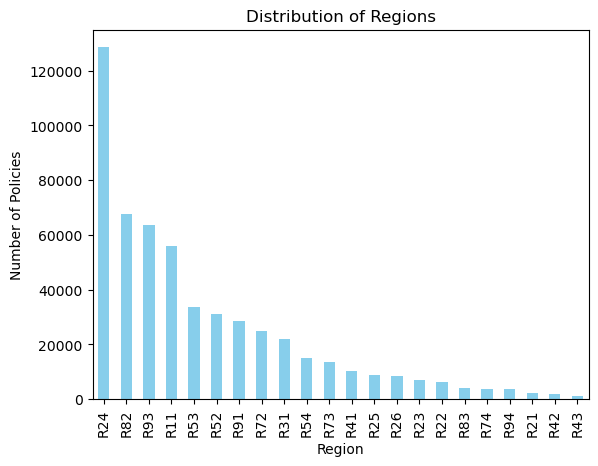

In [58]:


claims_raw['Region'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Regions")
plt.xlabel("Region")
plt.ylabel("Number of Policies")
plt.show()


`Region` represents the administrative area where the policyholder resides. The dataset includes 22 regions, with `R24` (23.7%), `R82`, `R93`, and `R11` being the most represented. The remaining regions each account for smaller but non-negligible proportions. The distribution is uneven but not extreme, making the feature suitable for one-hot encoding in modeling.


### Univariate Analysis Summary

The univariate exploration provided an overview of the distributions and characteristics of all key features in the dataset. Most numeric variables, such as `ClaimNb`, `VehAge`, and `BonusMalus`, showed strong right skewness, while `DrivAge` and `Exposure` were more balanced, with `Exposure` exhibiting a bimodal pattern around 0 and 1. Among categorical features, `VehBrand` and `VehGas` were evenly distributed, with `B12`, `B1`, and `B2` being the most common brands, and fuel type split almost evenly between regular and diesel. The `Area` feature displayed an ordinal pattern with most policies in moderately populated regions, and `Region` showed geographic imbalance, with a few regions dominating. Overall, no invalid or missing values were detected, and all features fall within reasonable ranges, requiring minimal cleaning before further analysis.


## Bivariate analysis

Let's move on to bivariate analysis, and analyze the connection between features and target and features.

We are gonna create a `ClaimRate` column, as `ClaimNb`/`Exposure` is a definitely a choice for target, so we can also analyze that.


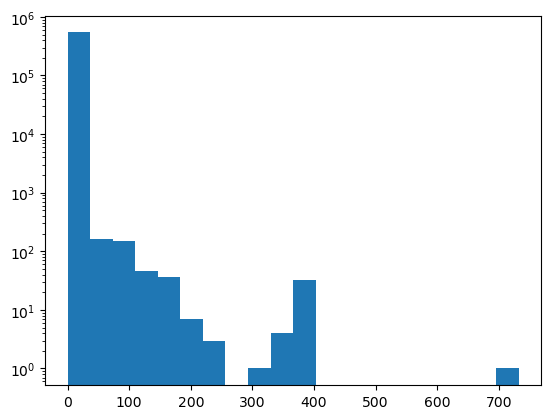

array([0.00000000e+00, 1.28205128e+00, 2.00000000e+00, 1.66666667e+01,
       1.25000000e+01, 1.00000000e+00, 1.04166667e+00, 2.32558140e+00,
       3.44827586e+00, 2.22222222e+00, 2.94117647e+00, 1.25000000e+00,
       5.00000000e+00, 8.33333333e+00, 7.14285714e+00, 2.22222222e+01,
       1.35135135e+00, 1.75438596e+00, 1.66666667e+00, 3.70370370e+00,
       2.50000000e+01, 1.44927536e+00, 5.26315789e+00, 1.33333333e+00,
       1.88679245e+00, 4.34782609e+00, 4.08163265e+00, 1.23456790e+00,
       1.63934426e+00, 5.71428571e+00, 1.81818182e+00, 1.96078431e+00,
       3.57142857e+00, 2.17391304e+00, 5.00000000e+01, 1.26582278e+00,
       1.29870130e+00, 3.22580645e+00, 2.38095238e+00, 1.85185185e+00,
       1.72413793e+00, 2.00000000e+01, 1.92307692e+00, 3.33333333e+00,
       3.12500000e+00, 1.07526882e+00, 1.49253731e+00, 1.00000000e+02,
       2.63157895e+00, 3.33333333e+01, 1.78571429e+00, 5.55555556e+00,
       1.14942529e+00, 2.04081633e+00, 1.20481928e+00, 1.11111111e+01,
      

In [29]:
claims_raw["ClaimRate"] = claims_raw["ClaimNb"] / claims_raw["Exposure"]
claims_raw["ClaimRate"].describe()
plt.hist(claims_raw['ClaimRate'], bins=20)
plt.yscale('log')
plt.show()
claims_raw["ClaimRate"].unique()

In [36]:
# lets see claimrate when exposure is floored to 0.01
claims_raw['Exposure_floored'] = claims_raw['Exposure'].apply(lambda x: max(x, 0.01))
claims_raw["ClaimRate_floored"] = claims_raw["ClaimNb"] / claims_raw["Exposure_floored"]
claims_raw["ClaimRate_floored"].describe()



count    542410.000000
mean          0.235189
std           2.911120
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         300.000000
Name: ClaimRate_floored, dtype: float64

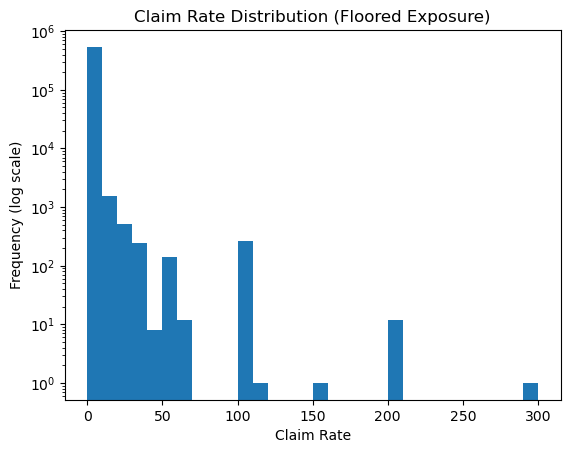

In [39]:
plt.hist(claims_raw['ClaimRate_floored'], bins=30)
plt.yscale('log')
plt.title("Claim Rate Distribution (Floored Exposure)")
plt.xlabel("Claim Rate")
plt.ylabel("Frequency (log scale)")
plt.show()

### Target vs Continous variables

Let's check the correaltion between them.

In [60]:
# correlation with claimrate using Pearson which uses linear correlation
# lets add exposure to the num_features for this purpose
num_features.remove("Exposure") 
correlations = claims_raw[num_features + ['ClaimRate']].corr()['ClaimRate'].sort_values()
print(correlations)
num_features.append("Exposure")
correlations_nb = claims_raw[num_features + ['ClaimNb']].corr()['ClaimNb'].sort_values()
print(correlations_nb)

num_features.remove("Exposure")  # remove exposure again to restore original list

VehAge       -0.023962
DrivAge      -0.003344
Density       0.005868
BonusMalus    0.013873
ClaimRate     1.000000
Name: ClaimRate, dtype: float64
VehAge       -0.022305
DrivAge       0.011354
Density       0.011443
BonusMalus    0.049738
Exposure      0.069290
ClaimNb       1.000000
Name: ClaimNb, dtype: float64


/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3029743839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index[:-1], y=correlations.values[:-1], palette='viridis')


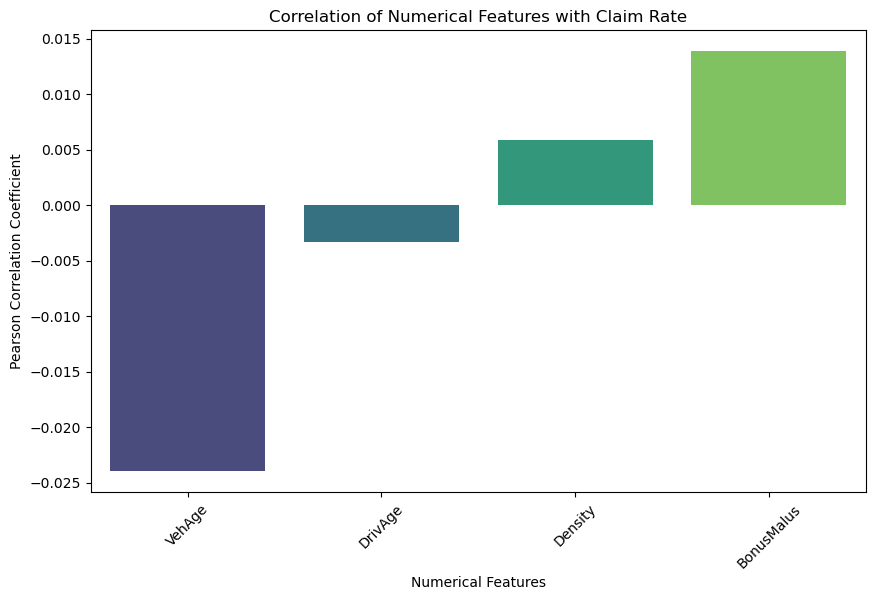

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3029743839.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_nb.index[:-1], y=correlations_nb.values[:-1], palette='viridis')


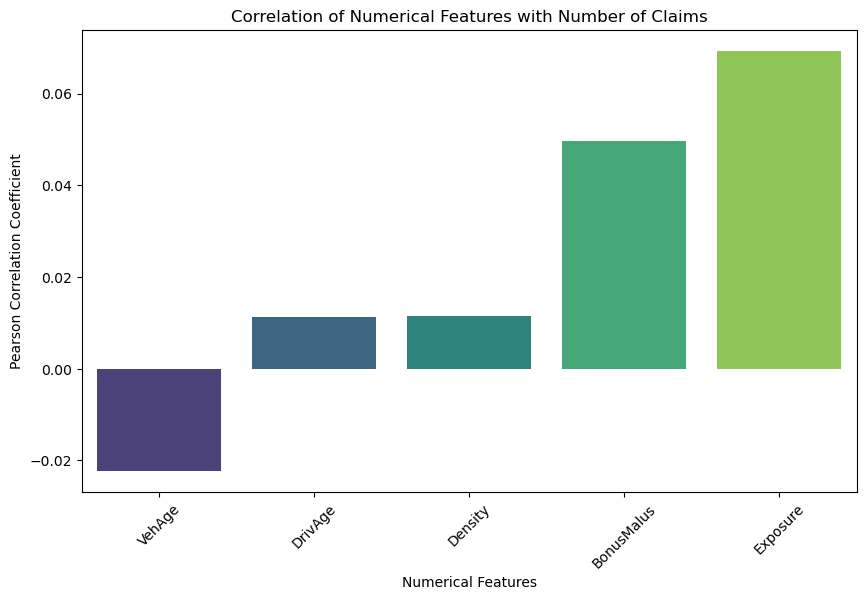

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.index[:-1], y=correlations.values[:-1], palette='viridis')
plt.xticks(rotation=45)
plt.title("Correlation of Numerical Features with Claim Rate")
plt.ylabel("Pearson Correlation Coefficient")
plt.xlabel("Numerical Features")
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(x=correlations_nb.index[:-1], y=correlations_nb.values[:-1], palette='viridis')
plt.xticks(rotation=45)
plt.title("Correlation of Numerical Features with Number of Claims")
plt.ylabel("Pearson Correlation Coefficient")
plt.xlabel("Numerical Features")
plt.show()

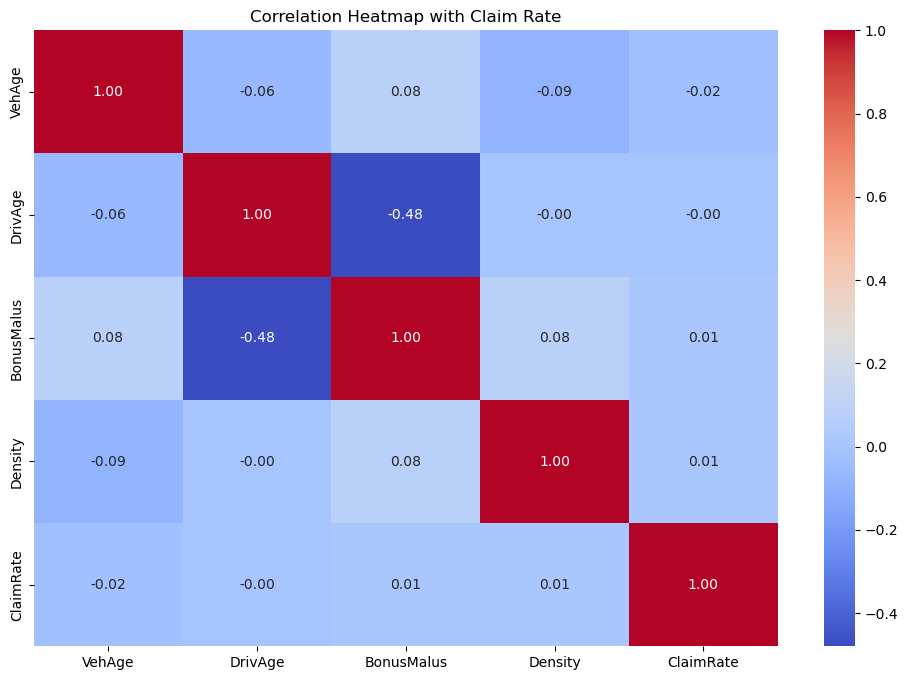

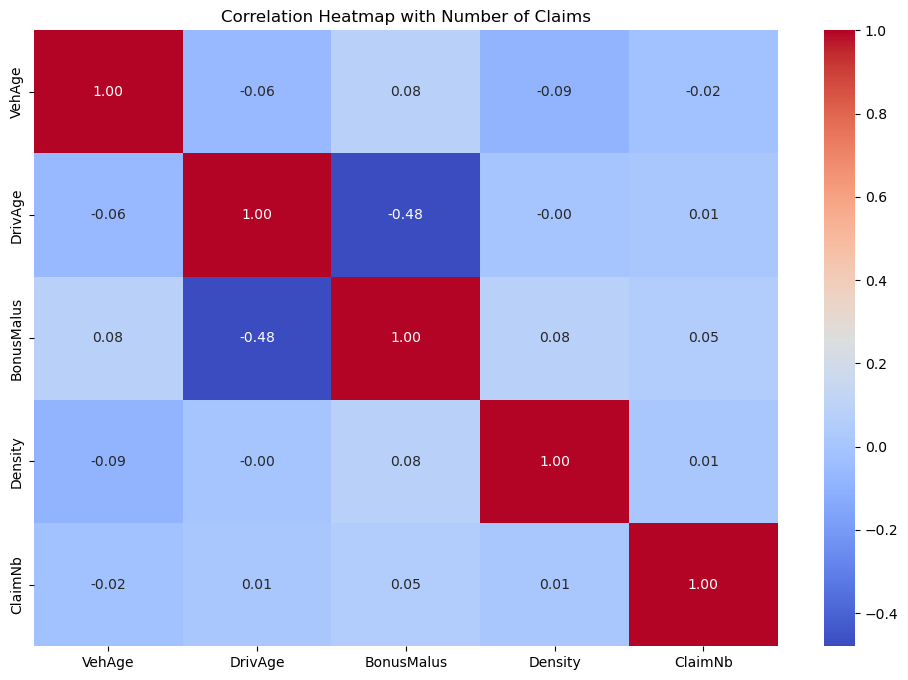

In [62]:
# lets also make heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(claims_raw[num_features + ['ClaimRate']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap with Claim Rate")
plt.show()
plt.figure(figsize=(12,8))
sns.heatmap(claims_raw[num_features + ['ClaimNb']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap with Number of Claims")
plt.show()


As we can see, `VehAge` has the strongest linear correalation with `ClaimRate`(its still super weak), and with `ClaimNb` its `Exposure` and `BonusMalus`.

Lets go over the pairs now. We are gonna use `ClaimRate` and `ClaimNb`

#### Target vs `VehAge`

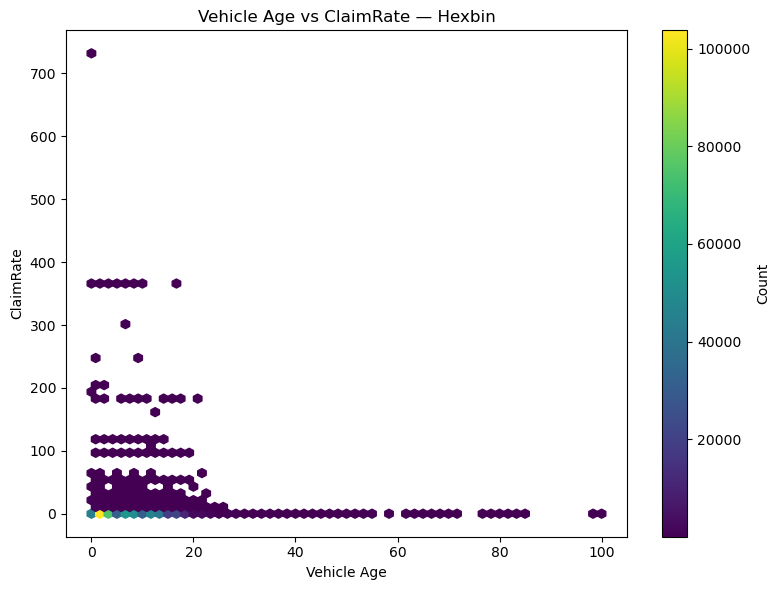

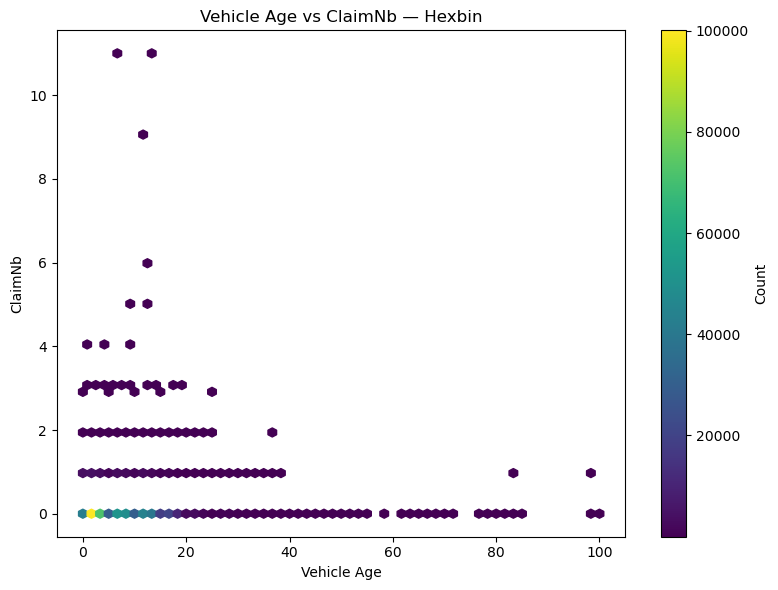

In [63]:
plt.figure(figsize=(8, 6))
plt.hexbin(claims_raw["VehAge"], claims_raw["ClaimRate"],
           gridsize=60, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("Vehicle Age vs ClaimRate — Hexbin")
plt.xlabel("Vehicle Age")
plt.ylabel("ClaimRate")
plt.tight_layout()
plt.show()
# lets try claimnb instead of claimrate
plt.figure(figsize=(8, 6))
plt.hexbin(claims_raw["VehAge"], claims_raw["ClaimNb"],
           gridsize=60, cmap="viridis", mincnt=1)

plt.colorbar(label="Count")
plt.title("Vehicle Age vs ClaimNb — Hexbin")
plt.xlabel("Vehicle Age")
plt.ylabel("ClaimNb")
plt.tight_layout()
plt.show()

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_42068/1106836141.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_stats = claims_raw.groupby("VehAge_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_42068/1106836141.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_stats_nb = claims_raw.groupby("VehAge_bin")["ClaimNb"].agg(["mean","std"]).reset_index()


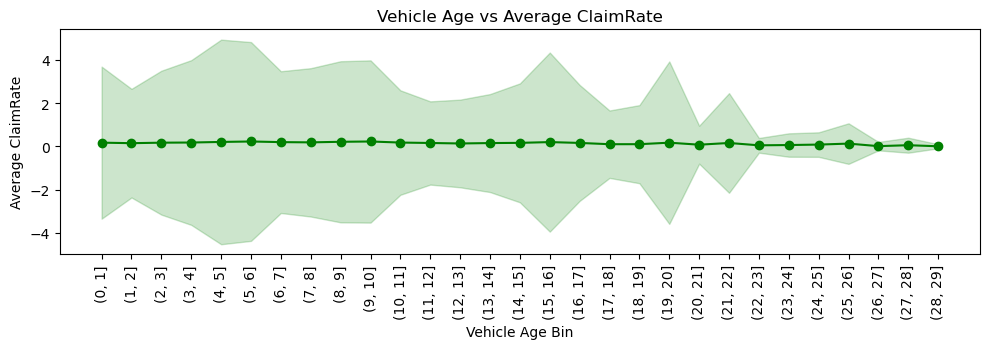

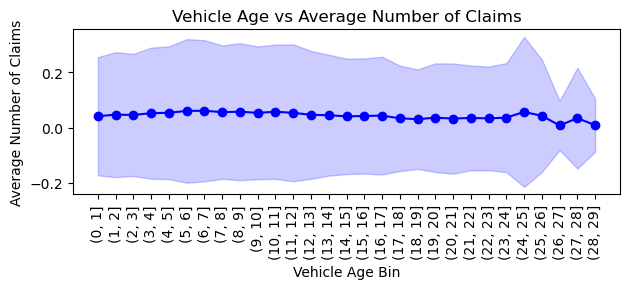

In [33]:
# Bin the data

vehicle_bins = range(0, 30, 1)  # 1-year bins for vehicles 0–30 yrs, we skip 30+, as there are few samples
claims_raw["VehAge_bin"] = pd.cut(claims_raw["VehAge"], bins=vehicle_bins)

# Compute means and std
vehicle_stats = claims_raw.groupby("VehAge_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
vehicle_stats_nb = claims_raw.groupby("VehAge_bin")["ClaimNb"].agg(["mean","std"]).reset_index()


# Vehicle Age
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(vehicle_stats["VehAge_bin"].astype(str), vehicle_stats["mean"], marker='o', color='green')
plt.fill_between(vehicle_stats["VehAge_bin"].astype(str),
                 vehicle_stats["mean"] - vehicle_stats["std"],
                 vehicle_stats["mean"] + vehicle_stats["std"],
                 color='green', alpha=0.2)
plt.xticks(rotation=90)
plt.title("Vehicle Age vs Average ClaimRate")
plt.xlabel("Vehicle Age Bin")
plt.ylabel("Average ClaimRate")

plt.tight_layout()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(vehicle_stats_nb["VehAge_bin"].astype(str), vehicle_stats_nb["mean"], marker='o', color='blue')
plt.fill_between(vehicle_stats_nb["VehAge_bin"].astype(str),
                 vehicle_stats_nb["mean"] - vehicle_stats_nb["std"],
                 vehicle_stats_nb["mean"] + vehicle_stats_nb["std"],
                 color='blue', alpha=0.2)
plt.xticks(rotation=90)
plt.title("Vehicle Age vs Average Number of Claims")
plt.xlabel("Vehicle Age Bin")
plt.ylabel("Average Number of Claims")
plt.tight_layout()
plt.show()




/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_42068/4140390560.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  veh_claim_counts = claims_raw.groupby(["VehAge_bin", "has_claim"]).size().reset_index(name="count")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_42068/4140390560.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  veh_claim_counts = claims_raw.groupby(["VehAge_bin", "has_claim"]).size().unstack(fill_value=0)


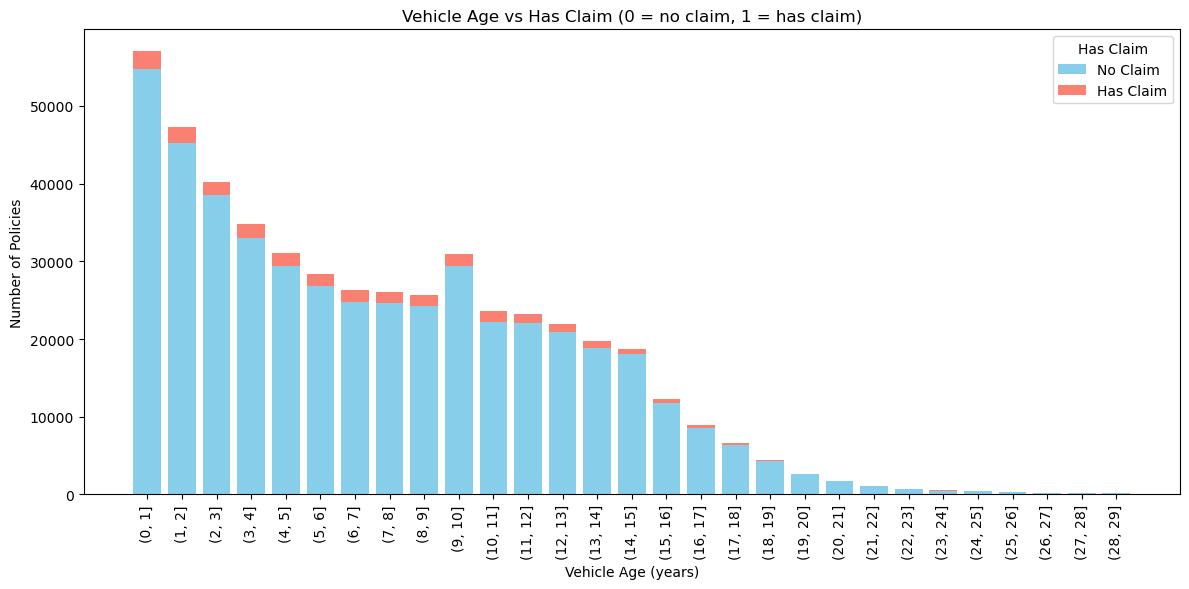

In [34]:
claims_raw["has_claim"] = (claims_raw["ClaimNb"] > 0).astype(int)



veh_claim_counts = claims_raw.groupby(["VehAge_bin", "has_claim"]).size().reset_index(name="count")
veh_claim_counts = claims_raw.groupby(["VehAge_bin", "has_claim"]).size().unstack(fill_value=0)
veh_claim_counts.columns = ["No Claim", "Has Claim"]

plt.figure(figsize=(12,6))
plt.bar(veh_claim_counts.index.astype(str), veh_claim_counts["No Claim"], label="No Claim", color="skyblue")
plt.bar(veh_claim_counts.index.astype(str), veh_claim_counts["Has Claim"], bottom=veh_claim_counts["No Claim"], label="Has Claim", color="salmon")

plt.xticks(rotation=90)
plt.xlabel("Vehicle Age (years)")
plt.ylabel("Number of Policies")
plt.title("Vehicle Age vs Has Claim (0 = no claim, 1 = has claim)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()


/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_42068/1114870842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  veh_claim_counts = claims_raw.groupby(["VehAge_bin", "has_claim"]).size().unstack(fill_value=0)


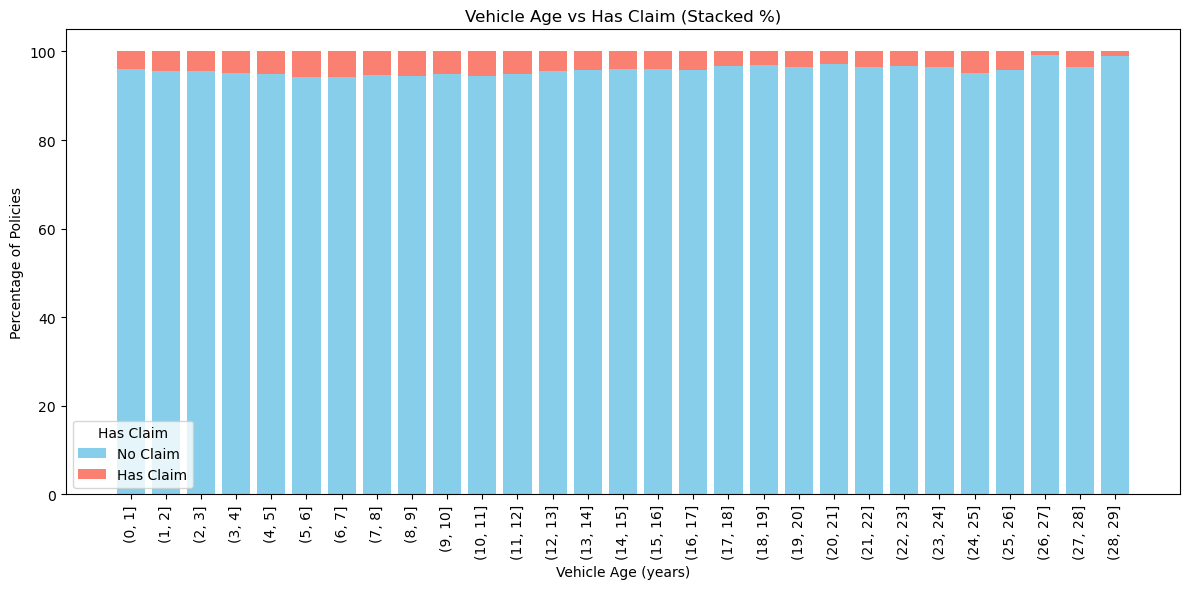

In [35]:
veh_claim_counts = claims_raw.groupby(["VehAge_bin", "has_claim"]).size().unstack(fill_value=0)
veh_claim_counts.columns = ["No Claim", "Has Claim"]

# Convert to percentages per bin
veh_claim_pct = veh_claim_counts.div(veh_claim_counts.sum(axis=1), axis=0) * 100

# --- Plot stacked bar (percentages) ---
plt.figure(figsize=(12,6))
plt.bar(veh_claim_pct.index.astype(str), veh_claim_pct["No Claim"], label="No Claim", color="skyblue")
plt.bar(veh_claim_pct.index.astype(str), veh_claim_pct["Has Claim"], bottom=veh_claim_pct["No Claim"], label="Has Claim", color="salmon")

plt.xticks(rotation=90)
plt.xlabel("Vehicle Age (years)")
plt.ylabel("Percentage of Policies")
plt.title("Vehicle Age vs Has Claim (Stacked %)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()

We can see that its hard to conclude the exact relationship between `VehAge` and our targets.

#### Target vs `DrivAge`

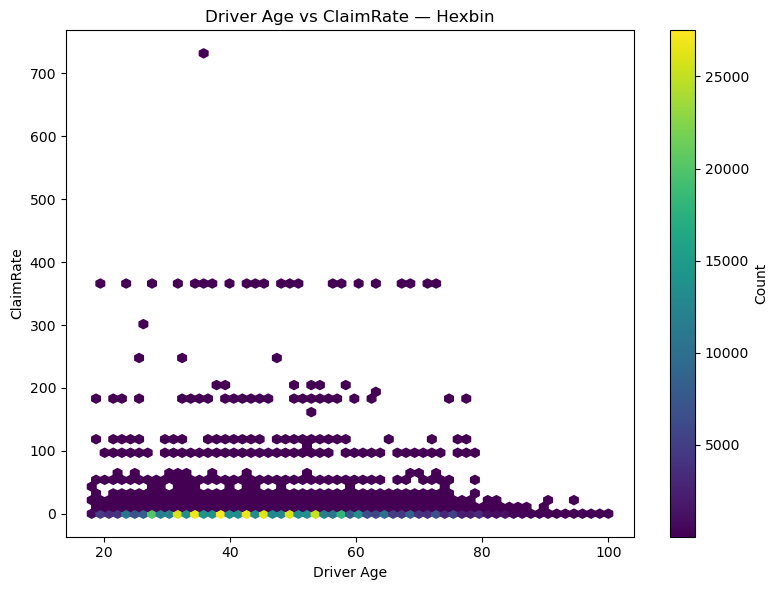

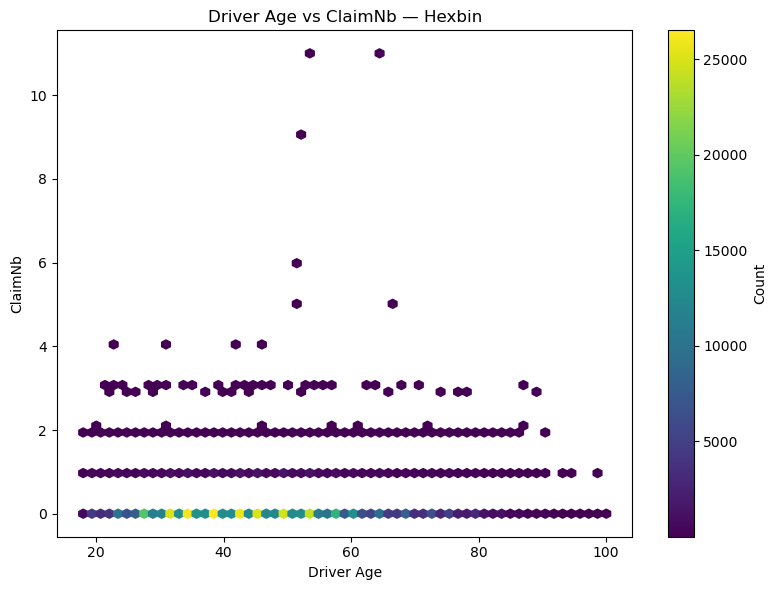

In [67]:
plt.figure(figsize=(8, 6))
plt.hexbin(claims_raw["DrivAge"], claims_raw["ClaimRate"],
           gridsize=60, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("Driver Age vs ClaimRate — Hexbin")
plt.xlabel("Driver Age")
plt.ylabel("ClaimRate")
plt.tight_layout()
plt.show()
# lets try claimnb instead of claimrate
plt.figure(figsize=(8, 6))
plt.hexbin(claims_raw["DrivAge"], claims_raw["ClaimNb"],
           gridsize=60, cmap="viridis", mincnt=1)

plt.colorbar(label="Count")
plt.title("Driver Age vs ClaimNb — Hexbin")
plt.xlabel("Driver Age")
plt.ylabel("ClaimNb")
plt.tight_layout()
plt.show()

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2814922235.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_stats = claims_raw.groupby("DrivAge_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2814922235.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_stats_nb = claims_raw.groupby("DrivAge_bin")["ClaimNb"].agg(["mean","std"]).reset_index()


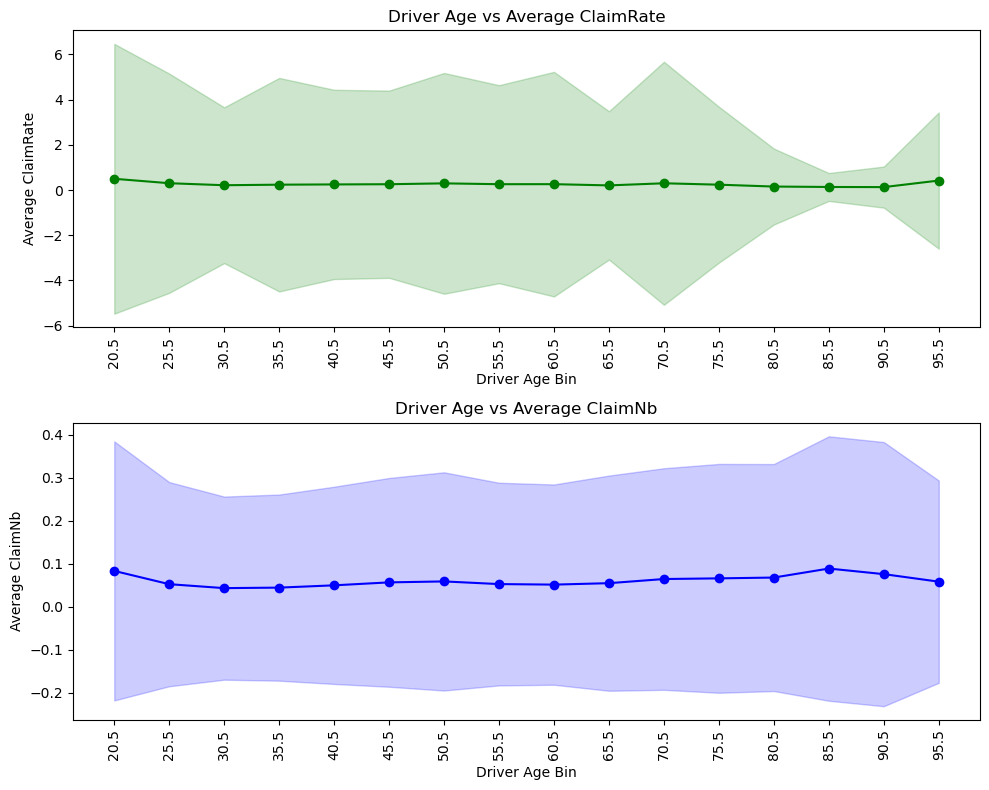

In [68]:

# Bin Driver Age
driv_bins = range(18, 100, 5)
claims_raw["DrivAge_bin"] = pd.cut(claims_raw["DrivAge"], bins=driv_bins)

# Compute mean and std
driver_stats = claims_raw.groupby("DrivAge_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
driver_stats_nb = claims_raw.groupby("DrivAge_bin")["ClaimNb"].agg(["mean","std"]).reset_index()

# Compute bin midpoints for plotting
driver_stats["mid"] = driver_stats["DrivAge_bin"].apply(lambda x: x.mid)
driver_stats_nb["mid"] = driver_stats_nb["DrivAge_bin"].apply(lambda x: x.mid)

# Plot both in same figure
plt.figure(figsize=(10, 8))

# ClaimRate
plt.subplot(2, 1, 1)
plt.plot(driver_stats["mid"], driver_stats["mean"], marker='o', color='green')
plt.fill_between(driver_stats["mid"],
                 driver_stats["mean"] - driver_stats["std"],
                 driver_stats["mean"] + driver_stats["std"],
                 color='green', alpha=0.2)
plt.xticks(driver_stats["mid"], rotation=90)
plt.title("Driver Age vs Average ClaimRate")
plt.xlabel("Driver Age Bin")
plt.ylabel("Average ClaimRate")

# ClaimNb
plt.subplot(2, 1, 2)
plt.plot(driver_stats_nb["mid"], driver_stats_nb["mean"], marker='o', color='blue')
plt.fill_between(driver_stats_nb["mid"],
                 driver_stats_nb["mean"] - driver_stats_nb["std"],
                 driver_stats_nb["mean"] + driver_stats_nb["std"],
                 color='blue', alpha=0.2)
plt.xticks(driver_stats_nb["mid"], rotation=90)
plt.title("Driver Age vs Average ClaimNb")
plt.xlabel("Driver Age Bin")
plt.ylabel("Average ClaimNb")

plt.tight_layout()
plt.show()


/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/1433678783.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driv_claim_counts = claims_raw.groupby(["DrivAge_bin", "has_claim"]).size().unstack(fill_value=0)


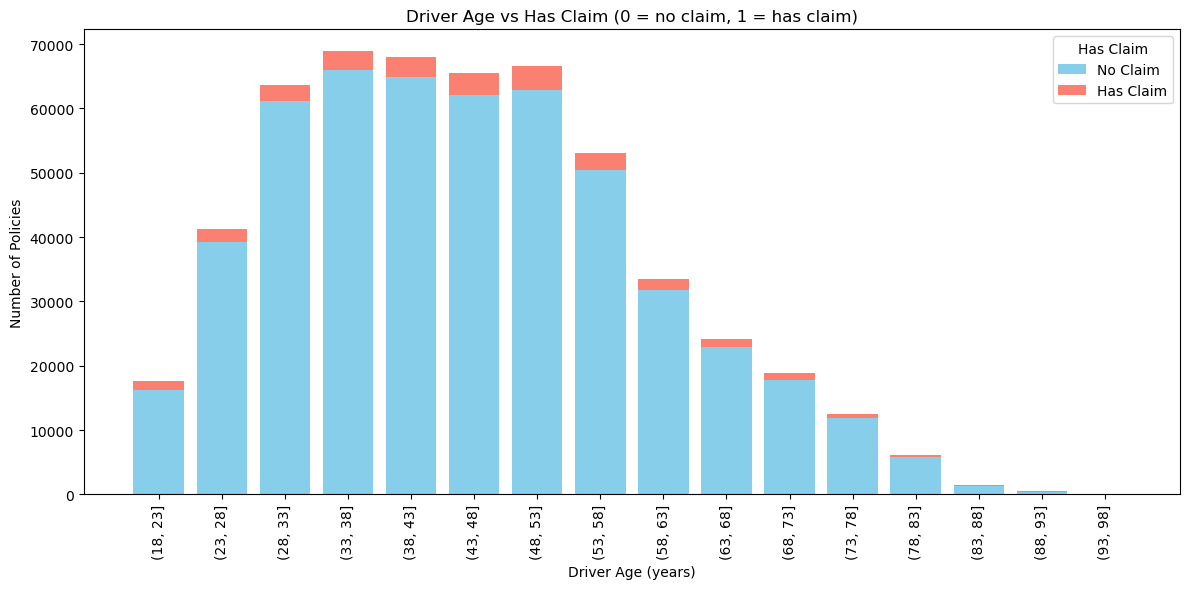

In [69]:

driv_claim_counts = claims_raw.groupby(["DrivAge_bin", "has_claim"]).size().unstack(fill_value=0)
driv_claim_counts.columns = ["No Claim", "Has Claim"]


plt.figure(figsize=(12,6))
plt.bar(driv_claim_counts.index.astype(str), driv_claim_counts["No Claim"], label="No Claim", color="skyblue")
plt.bar(driv_claim_counts.index.astype(str), driv_claim_counts["Has Claim"], bottom=driv_claim_counts["No Claim"], label="Has Claim", color="salmon")

plt.xticks(rotation=90)
plt.xlabel("Driver Age (years)")
plt.ylabel("Number of Policies")
plt.title("Driver Age vs Has Claim (0 = no claim, 1 = has claim)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2940879379.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driv_claim_counts = claims_raw.groupby(["DrivAge_bin", "has_claim"]).size().unstack(fill_value=0)


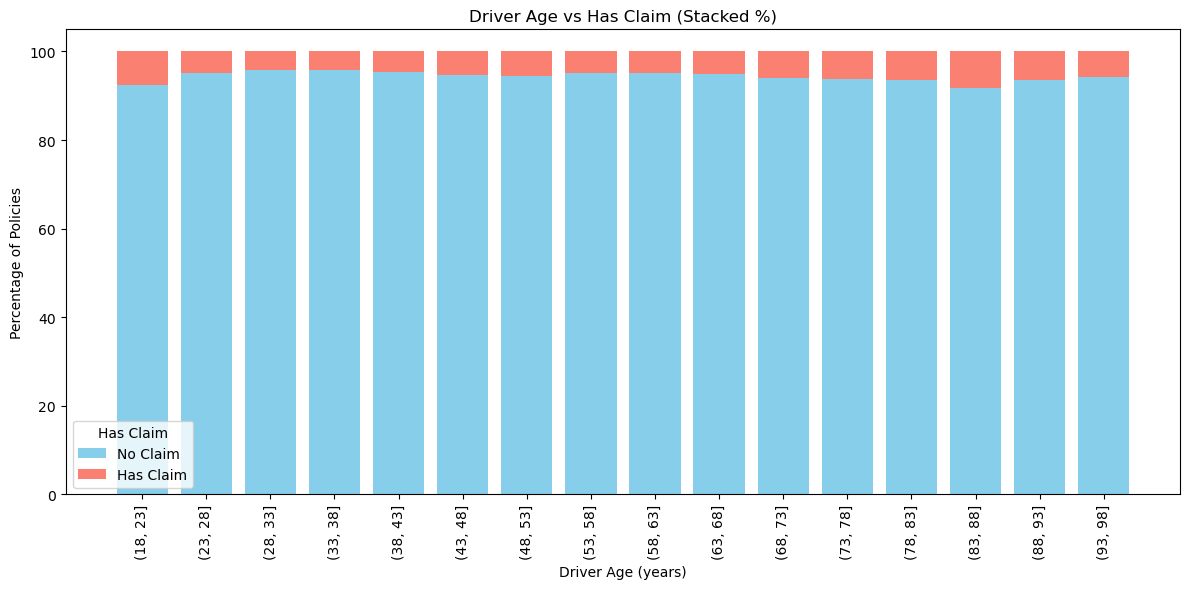

In [70]:

# Aggregate counts per bin and has_claim
driv_claim_counts = claims_raw.groupby(["DrivAge_bin", "has_claim"]).size().unstack(fill_value=0)
driv_claim_counts.columns = ["No Claim", "Has Claim"]

# Convert to percentages per bin
driv_claim_pct = driv_claim_counts.div(driv_claim_counts.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12,6))
plt.bar(driv_claim_pct.index.astype(str), driv_claim_pct["No Claim"], label="No Claim", color="skyblue")
plt.bar(driv_claim_pct.index.astype(str), driv_claim_pct["Has Claim"], bottom=driv_claim_pct["No Claim"], label="Has Claim", color="salmon")

plt.xticks(rotation=90)
plt.xlabel("Driver Age (years)")
plt.ylabel("Percentage of Policies")
plt.title("Driver Age vs Has Claim (Stacked %)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()

From this, we might see a small pattern: youngsters and older people usually have higher percentages of claims.

#### Target vs `Density`

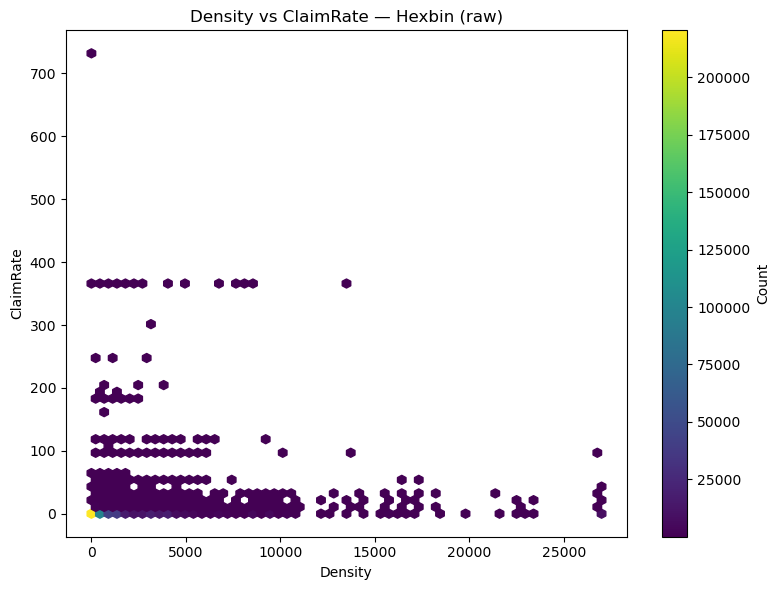

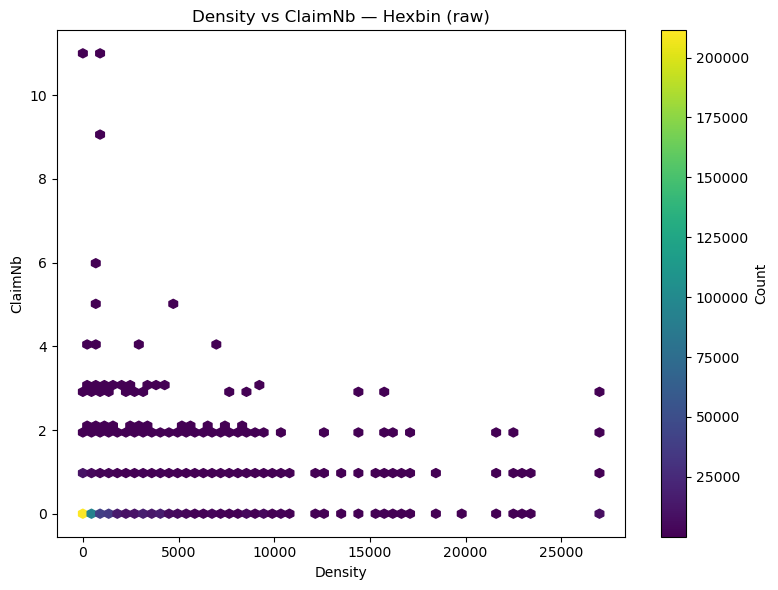

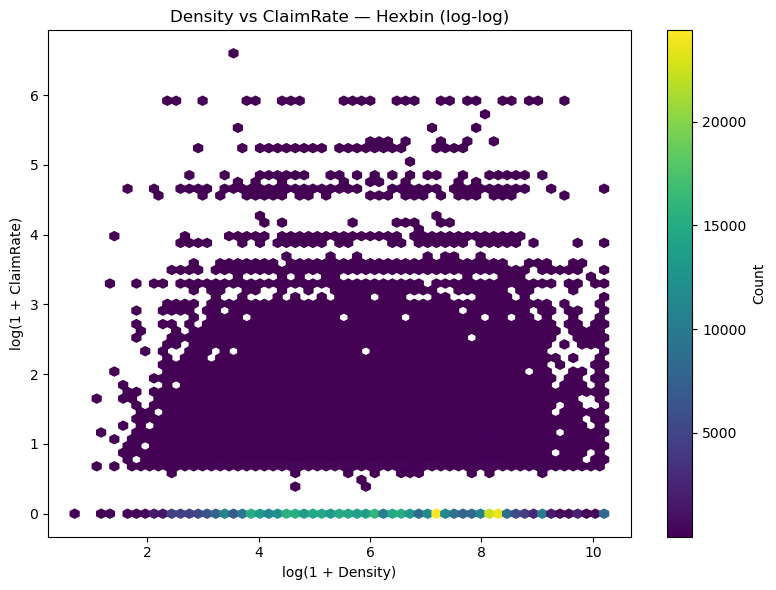

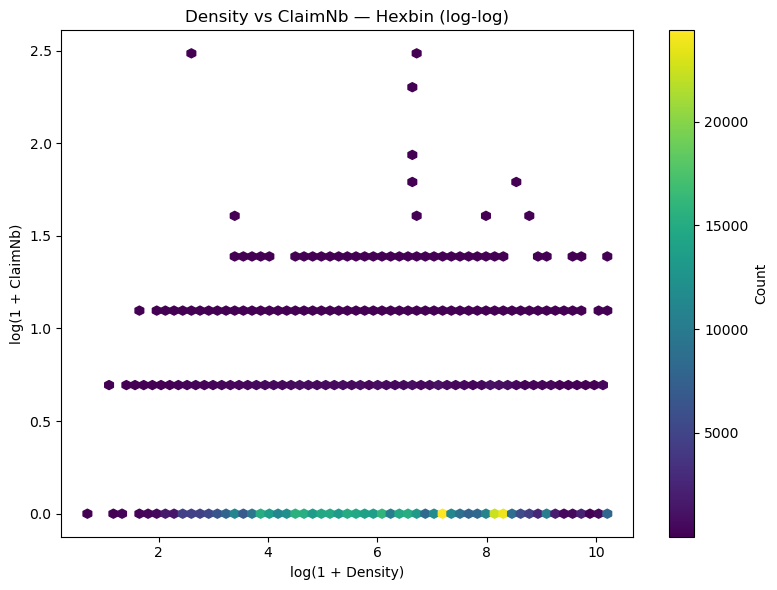

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# --- Hexbin: Density vs ClaimRate (raw) ---
plt.figure(figsize=(8, 6))
plt.hexbin(claims_raw["Density"], claims_raw["ClaimRate"],
           gridsize=60, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("Density vs ClaimRate — Hexbin (raw)")
plt.xlabel("Density")
plt.ylabel("ClaimRate")
plt.tight_layout()
plt.show()

# --- Hexbin: Density vs ClaimNb (raw) ---
plt.figure(figsize=(8, 6))
plt.hexbin(claims_raw["Density"], claims_raw["ClaimNb"],
           gridsize=60, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("Density vs ClaimNb — Hexbin (raw)")
plt.xlabel("Density")
plt.ylabel("ClaimNb")
plt.tight_layout()
plt.show()

# --- Hexbin: Density vs ClaimRate (log-log) ---
plt.figure(figsize=(8, 6))
plt.hexbin(np.log1p(claims_raw["Density"]), np.log1p(claims_raw["ClaimRate"]),
           gridsize=60, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("Density vs ClaimRate — Hexbin (log-log)")
plt.xlabel("log(1 + Density)")
plt.ylabel("log(1 + ClaimRate)")
plt.tight_layout()
plt.show()

# --- Hexbin: Density vs ClaimNb (log-log) ---
plt.figure(figsize=(8, 6))
plt.hexbin(np.log1p(claims_raw["Density"]), np.log1p(claims_raw["ClaimNb"]),
           gridsize=60, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("Density vs ClaimNb — Hexbin (log-log)")
plt.xlabel("log(1 + Density)")
plt.ylabel("log(1 + ClaimNb)")
plt.tight_layout()
plt.show()


Log transformation can help here distribute the data better!

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/343764117.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_stats_rate = claims_raw.groupby("Density_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/343764117.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_stats_nb = claims_raw.groupby("Density_bin")["ClaimNb"].agg(["mean","std"]).reset_index()


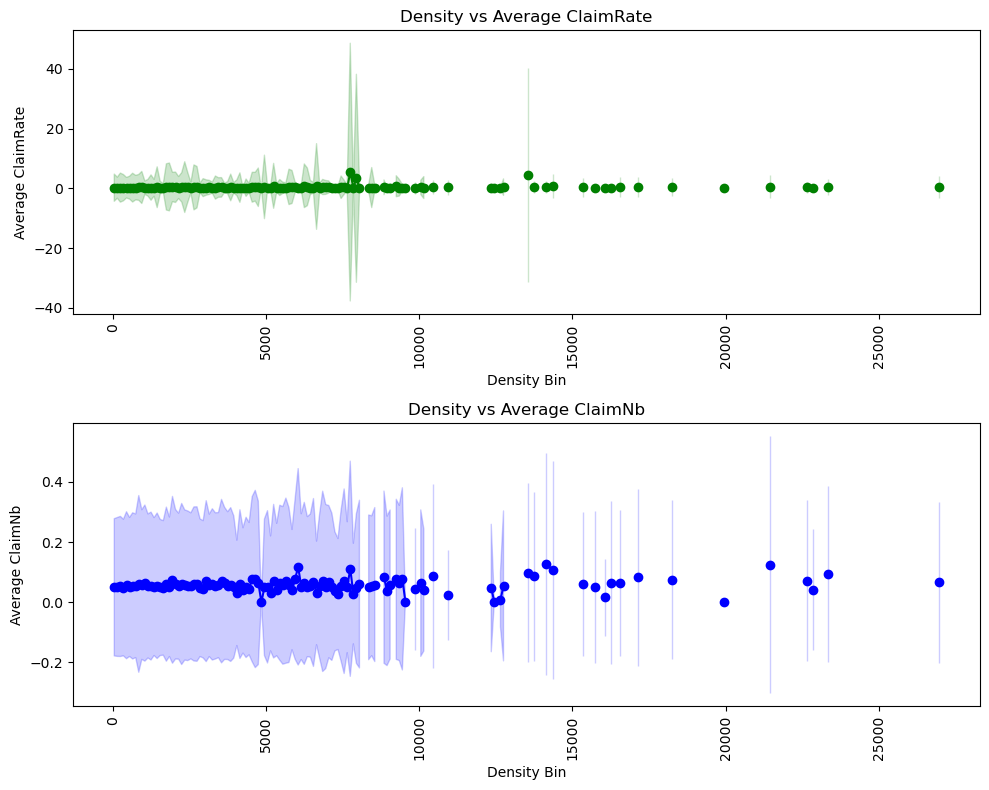

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Bin Density ---
density_bins = range(0, int(claims_raw["Density"].max()) + 100, 100)  # 0,100,200,...,max_density
claims_raw["Density_bin"] = pd.cut(claims_raw["Density"], bins=density_bins)

# --- Compute mean and std per bin ---
density_stats_rate = claims_raw.groupby("Density_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
density_stats_nb = claims_raw.groupby("Density_bin")["ClaimNb"].agg(["mean","std"]).reset_index()

# --- Compute bin midpoints for plotting ---
density_stats_rate["mid"] = density_stats_rate["Density_bin"].apply(lambda x: x.mid)
density_stats_nb["mid"] = density_stats_nb["Density_bin"].apply(lambda x: x.mid)

# --- Plot both in same figure ---
plt.figure(figsize=(10, 8))

# ClaimRate
plt.subplot(2, 1, 1)
plt.plot(density_stats_rate["mid"], density_stats_rate["mean"], marker='o', color='green')
plt.fill_between(density_stats_rate["mid"],
                 density_stats_rate["mean"] - density_stats_rate["std"],
                 density_stats_rate["mean"] + density_stats_rate["std"],
                 color='green', alpha=0.2)
plt.xticks(rotation=90)
plt.title("Density vs Average ClaimRate")
plt.xlabel("Density Bin")
plt.ylabel("Average ClaimRate")

# ClaimNb
plt.subplot(2, 1, 2)
plt.plot(density_stats_nb["mid"], density_stats_nb["mean"], marker='o', color='blue')
plt.fill_between(density_stats_nb["mid"],
                 density_stats_nb["mean"] - density_stats_nb["std"],
                 density_stats_nb["mean"] + density_stats_nb["std"],
                 color='blue', alpha=0.2)
plt.xticks(rotation=90)
plt.title("Density vs Average ClaimNb")
plt.xlabel("Density Bin")
plt.ylabel("Average ClaimNb")

plt.tight_layout()
plt.show()


/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2777835406.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_stats_rate = claims_raw.groupby("logDensity_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2777835406.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_stats_nb = claims_raw.groupby("logDensity_bin")["ClaimNb"].agg(["mean","std"]).reset_index()


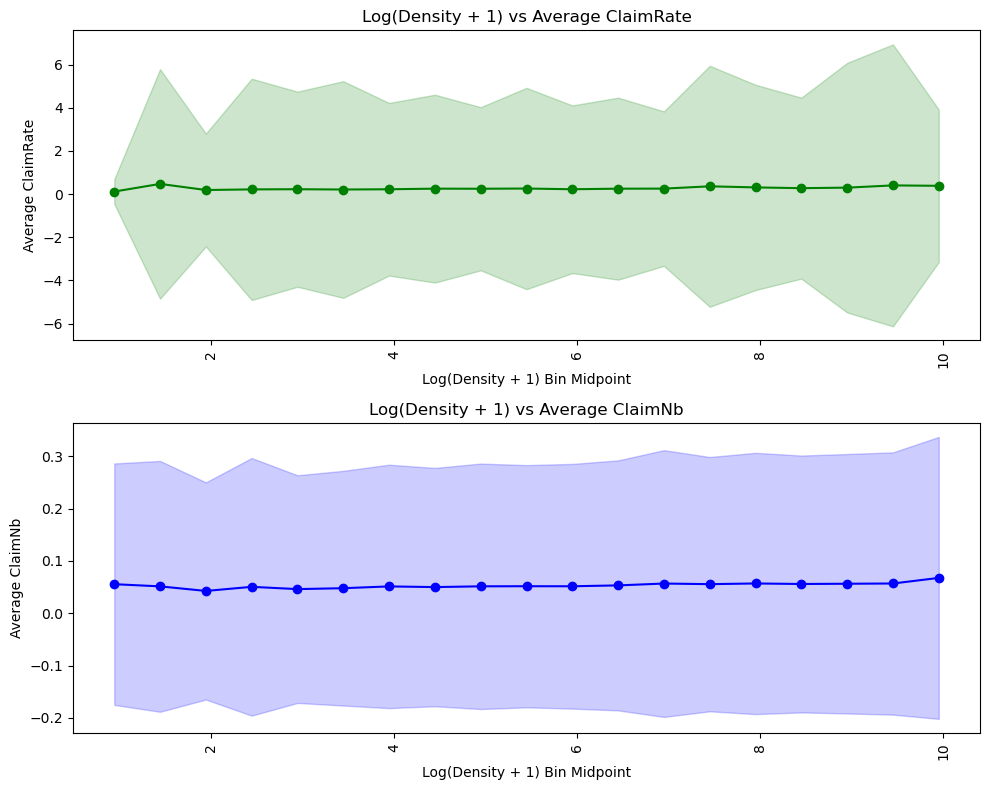

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# --- Log-transform Density (log1p handles zeros) ---
claims_raw["log_Density"] = np.log1p(claims_raw["Density"])

# --- Bin log-transformed Density ---
log_density_bins = np.linspace(claims_raw["log_Density"].min(),
                               claims_raw["log_Density"].max(), 20)  # 20 bins
claims_raw["logDensity_bin"] = pd.cut(claims_raw["log_Density"], bins=log_density_bins)

# --- Compute mean and std per bin ---
density_stats_rate = claims_raw.groupby("logDensity_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
density_stats_nb = claims_raw.groupby("logDensity_bin")["ClaimNb"].agg(["mean","std"]).reset_index()

# --- Compute bin midpoints for plotting ---
density_stats_rate["mid"] = density_stats_rate["logDensity_bin"].apply(lambda x: x.mid)
density_stats_nb["mid"] = density_stats_nb["logDensity_bin"].apply(lambda x: x.mid)

# --- Plot both in same figure ---
plt.figure(figsize=(10, 8))

# ClaimRate
plt.subplot(2, 1, 1)
plt.plot(density_stats_rate["mid"], density_stats_rate["mean"], marker='o', color='green')
plt.fill_between(density_stats_rate["mid"],
                 density_stats_rate["mean"] - density_stats_rate["std"],
                 density_stats_rate["mean"] + density_stats_rate["std"],
                 color='green', alpha=0.2)
plt.xticks(rotation=90)
plt.title("Log(Density + 1) vs Average ClaimRate")
plt.xlabel("Log(Density + 1) Bin Midpoint")
plt.ylabel("Average ClaimRate")

# ClaimNb
plt.subplot(2, 1, 2)
plt.plot(density_stats_nb["mid"], density_stats_nb["mean"], marker='o', color='blue')
plt.fill_between(density_stats_nb["mid"],
                 density_stats_nb["mean"] - density_stats_nb["std"],
                 density_stats_nb["mean"] + density_stats_nb["std"],
                 color='blue', alpha=0.2)
plt.xticks(rotation=90)
plt.title("Log(Density + 1) vs Average ClaimNb")
plt.xlabel("Log(Density + 1) Bin Midpoint")
plt.ylabel("Average ClaimNb")

plt.tight_layout()
plt.show()


These plots are not useful for our analysis really.

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3755778515.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_claim_counts = claims_raw.groupby(["Density_bin", "has_claim"]).size().unstack(fill_value=0)


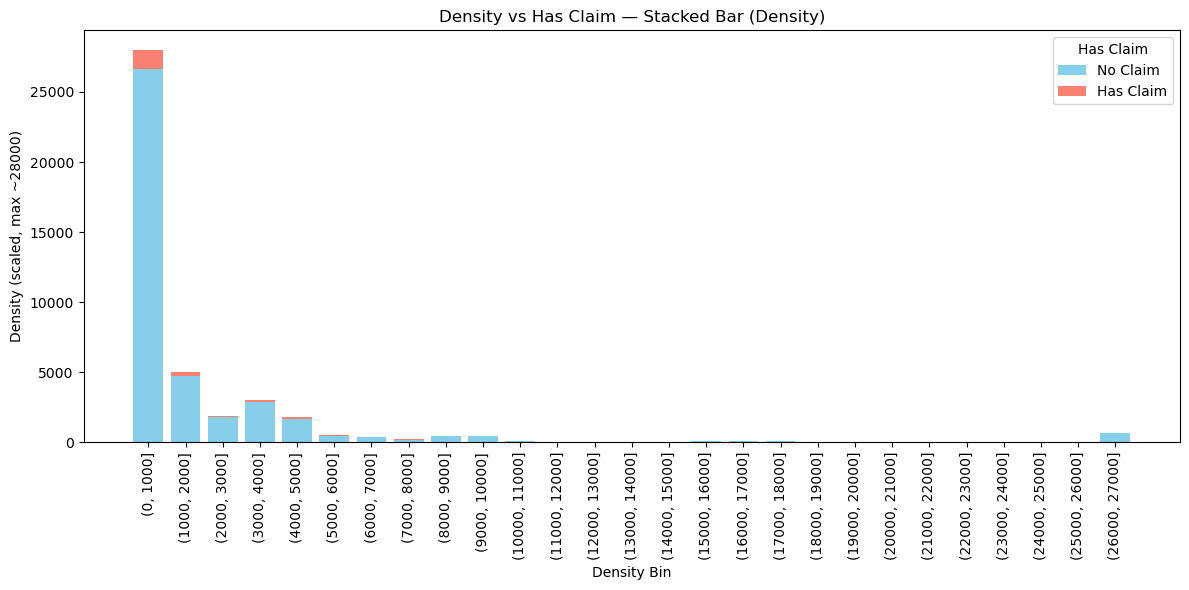

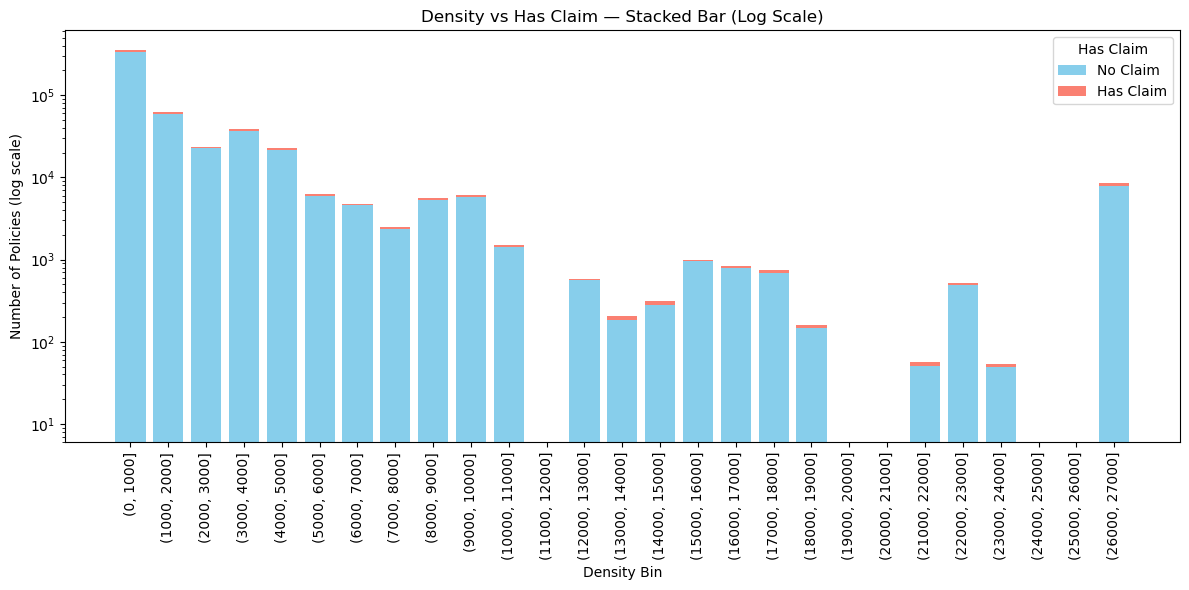

In [74]:
import matplotlib.pyplot as plt

# --- Bin Density ---
density_bins = range(0, int(claims_raw["Density"].max()) + 100, 1000)  # adjust bin width if needed
claims_raw["Density_bin"] = pd.cut(claims_raw["Density"], bins=density_bins)

# --- Group by Density bin and has_claim ---
density_claim_counts = claims_raw.groupby(["Density_bin", "has_claim"]).size().unstack(fill_value=0)
density_claim_counts.columns = ["No Claim", "Has Claim"]

# --- Plot stacked bar (density style) ---
# Optionally scale to max ~28000 like before
max_density = 28000
density_claim_counts_scaled = density_claim_counts / density_claim_counts.sum(axis=1).max() * max_density

plt.figure(figsize=(12,6))
plt.bar(density_claim_counts_scaled.index.astype(str), density_claim_counts_scaled["No Claim"], 
        label="No Claim", color="skyblue")
plt.bar(density_claim_counts_scaled.index.astype(str), density_claim_counts_scaled["Has Claim"], 
        bottom=density_claim_counts_scaled["No Claim"], label="Has Claim", color="salmon")

plt.xticks(rotation=90)
plt.xlabel("Density Bin")
plt.ylabel("Density (scaled, max ~28000)")
plt.title("Density vs Has Claim — Stacked Bar (Density)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()

# --- Plot stacked bar with log scale ---
plt.figure(figsize=(12,6))
plt.bar(density_claim_counts.index.astype(str), density_claim_counts["No Claim"], 
        label="No Claim", color="skyblue")
plt.bar(density_claim_counts.index.astype(str), density_claim_counts["Has Claim"], 
        bottom=density_claim_counts["No Claim"], label="Has Claim", color="salmon")

plt.yscale("log")
plt.xticks(rotation=90)
plt.xlabel("Density Bin")
plt.ylabel("Number of Policies (log scale)")
plt.title("Density vs Has Claim — Stacked Bar (Log Scale)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()


/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/862294192.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_claim_counts = claims_raw.groupby(["Density_bin", "has_claim"]).size().unstack(fill_value=0)


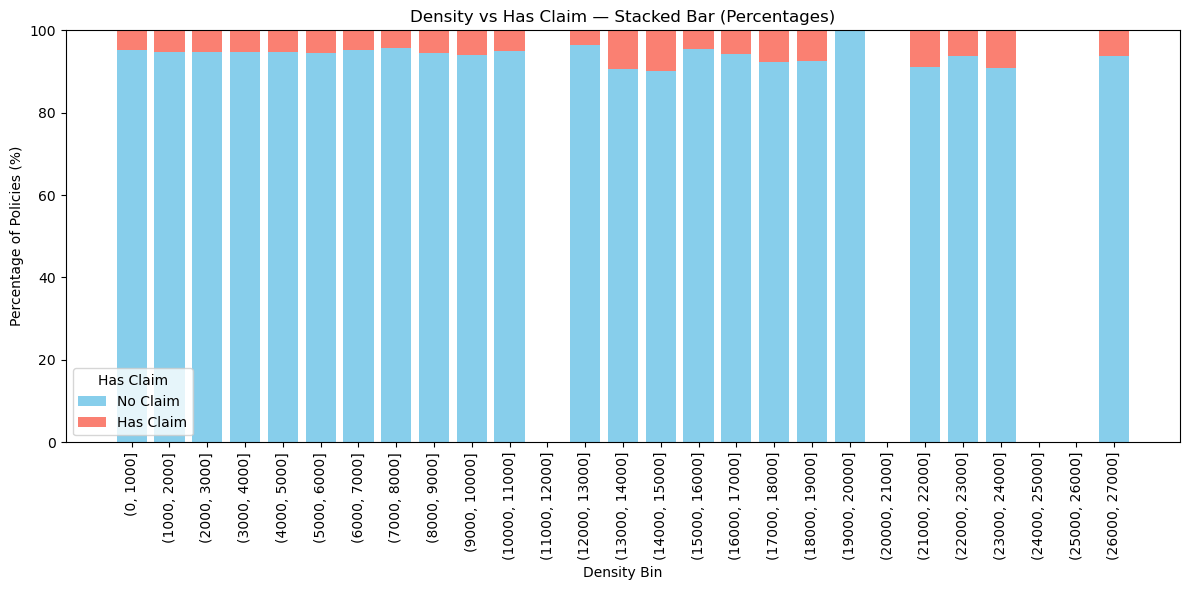

In [75]:
import matplotlib.pyplot as plt

# --- Bin Density ---
density_bins = range(0, int(claims_raw["Density"].max()) + 100, 1000)  # adjust bin width if needed
claims_raw["Density_bin"] = pd.cut(claims_raw["Density"], bins=density_bins)

# --- Group by Density bin and has_claim ---
density_claim_counts = claims_raw.groupby(["Density_bin", "has_claim"]).size().unstack(fill_value=0)
density_claim_counts.columns = ["No Claim", "Has Claim"]

# --- Convert to percentages per bin ---
density_claim_perc = density_claim_counts.div(density_claim_counts.sum(axis=1), axis=0) * 100

# --- Plot stacked bar (percentages) ---
plt.figure(figsize=(12,6))
plt.bar(density_claim_perc.index.astype(str), density_claim_perc["No Claim"], 
        label="No Claim", color="skyblue")
plt.bar(density_claim_perc.index.astype(str), density_claim_perc["Has Claim"], 
        bottom=density_claim_perc["No Claim"], label="Has Claim", color="salmon")

plt.xticks(rotation=90)
plt.xlabel("Density Bin")
plt.ylabel("Percentage of Policies (%)")
plt.title("Density vs Has Claim — Stacked Bar (Percentages)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()


As we can see it might be useful to apply log transformation on `Density` later.

#### Target vs `BonusMalus`

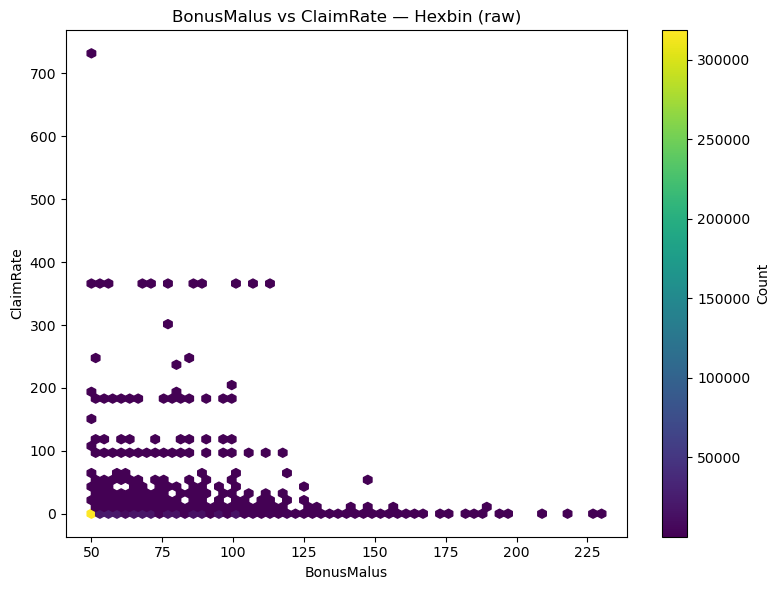

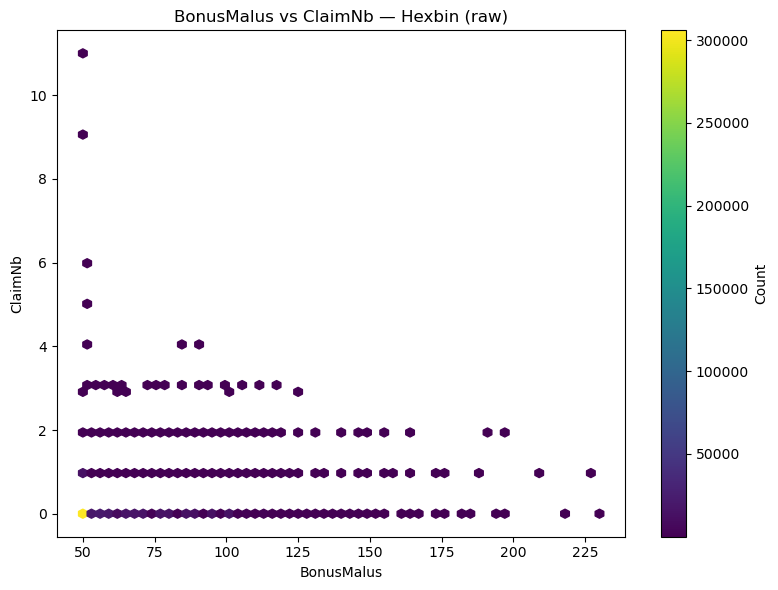

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# --- Hexbin: BonusMalus vs ClaimRate (raw) ---
plt.figure(figsize=(8, 6))
plt.hexbin(claims_raw["BonusMalus"], claims_raw["ClaimRate"],
           gridsize=60, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("BonusMalus vs ClaimRate — Hexbin (raw)")
plt.xlabel("BonusMalus")
plt.ylabel("ClaimRate")
plt.tight_layout()
plt.show()

# --- Hexbin: BonusMalus vs ClaimNb (raw) ---
plt.figure(figsize=(8, 6))
plt.hexbin(claims_raw["BonusMalus"], claims_raw["ClaimNb"],
           gridsize=60, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("BonusMalus vs ClaimNb — Hexbin (raw)")
plt.xlabel("BonusMalus")
plt.ylabel("ClaimNb")
plt.tight_layout()
plt.show()


Hmmm ye this looks super skewed..

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3303560971.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bonus_stats_rate = claims_raw.groupby("Bonus_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3303560971.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bonus_stats_nb = claims_raw.groupby("Bonus_bin")["ClaimNb"].agg(["mean","std"]).reset_index()


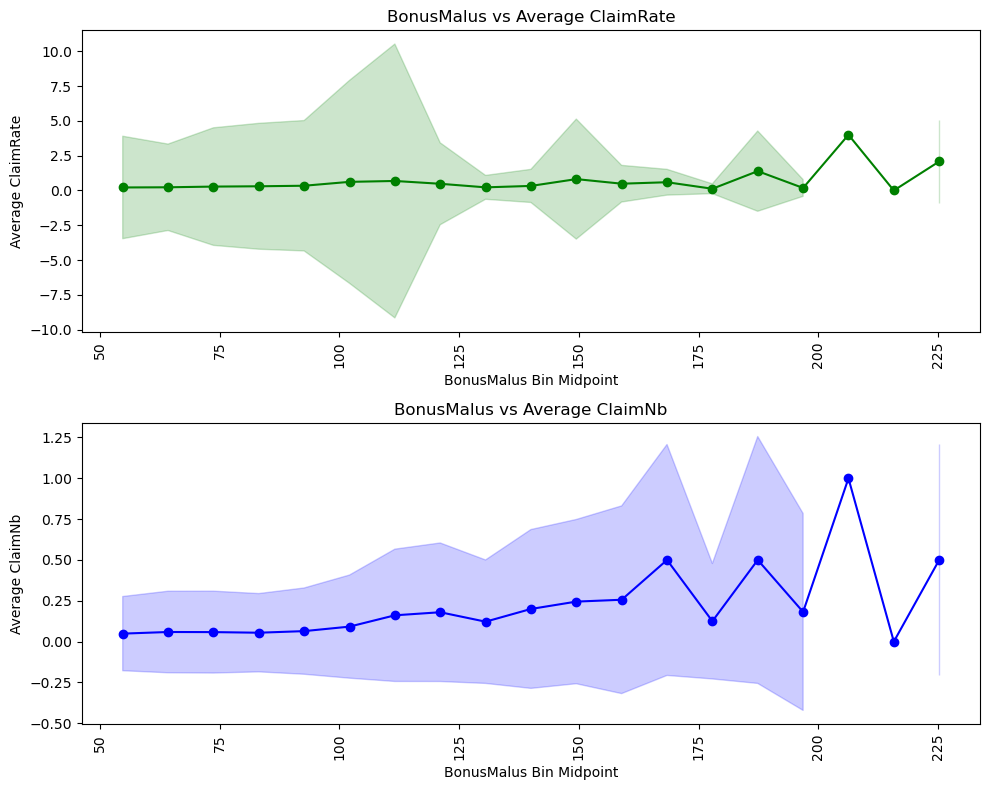

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Bin BonusMalus ---
bonus_bins = np.linspace(claims_raw["BonusMalus"].min(),
                         claims_raw["BonusMalus"].max(), 20)  # 20 bins
claims_raw["Bonus_bin"] = pd.cut(claims_raw["BonusMalus"], bins=bonus_bins)

# --- Compute mean and std per bin ---
bonus_stats_rate = claims_raw.groupby("Bonus_bin")["ClaimRate"].agg(["mean","std"]).reset_index()
bonus_stats_nb = claims_raw.groupby("Bonus_bin")["ClaimNb"].agg(["mean","std"]).reset_index()

# --- Compute bin midpoints for plotting ---
bonus_stats_rate["mid"] = bonus_stats_rate["Bonus_bin"].apply(lambda x: x.mid)
bonus_stats_nb["mid"] = bonus_stats_nb["Bonus_bin"].apply(lambda x: x.mid)

# --- Plot both in same figure ---
plt.figure(figsize=(10, 8))

# ClaimRate
plt.subplot(2, 1, 1)
plt.plot(bonus_stats_rate["mid"], bonus_stats_rate["mean"], marker='o', color='green')
plt.fill_between(bonus_stats_rate["mid"],
                 bonus_stats_rate["mean"] - bonus_stats_rate["std"],
                 bonus_stats_rate["mean"] + bonus_stats_rate["std"],
                 color='green', alpha=0.2)
plt.xticks(rotation=90)
plt.title("BonusMalus vs Average ClaimRate")
plt.xlabel("BonusMalus Bin Midpoint")
plt.ylabel("Average ClaimRate")

# ClaimNb
plt.subplot(2, 1, 2)
plt.plot(bonus_stats_nb["mid"], bonus_stats_nb["mean"], marker='o', color='blue')
plt.fill_between(bonus_stats_nb["mid"],
                 bonus_stats_nb["mean"] - bonus_stats_nb["std"],
                 bonus_stats_nb["mean"] + bonus_stats_nb["std"],
                 color='blue', alpha=0.2)
plt.xticks(rotation=90)
plt.title("BonusMalus vs Average ClaimNb")
plt.xlabel("BonusMalus Bin Midpoint")
plt.ylabel("Average ClaimNb")

plt.tight_layout()
plt.show()


Higher BonusMalus probably leads to more Claims?

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/1195183314.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bonus_claim_counts = claims_raw.groupby(["Bonus_bin", "has_claim"]).size().unstack(fill_value=0)


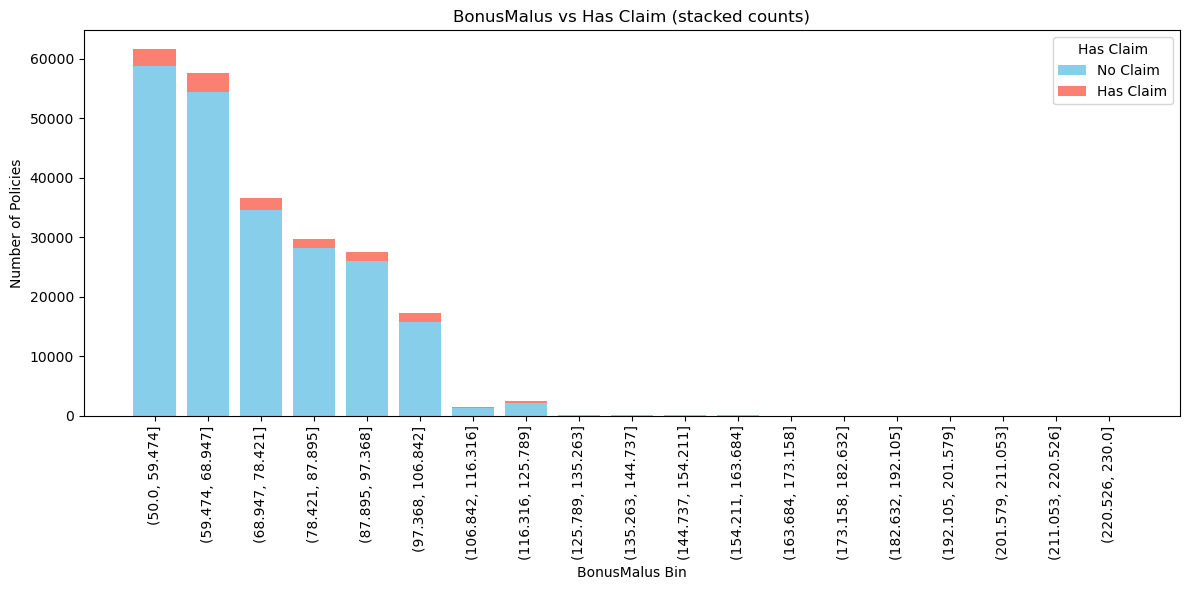

In [78]:

# --- Compute raw counts per bin for has_claim ---
bonus_claim_counts = claims_raw.groupby(["Bonus_bin", "has_claim"]).size().unstack(fill_value=0)
bonus_claim_counts.columns = ["No Claim", "Has Claim"]

# --- Plot stacked bar plot ---
plt.figure(figsize=(12, 6))
plt.bar(bonus_claim_counts.index.astype(str), bonus_claim_counts["No Claim"], label="No Claim", color="skyblue")
plt.bar(bonus_claim_counts.index.astype(str), bonus_claim_counts["Has Claim"],
        bottom=bonus_claim_counts["No Claim"], label="Has Claim", color="salmon")

plt.xticks(rotation=90)
plt.xlabel("BonusMalus Bin")
plt.ylabel("Number of Policies")
plt.title("BonusMalus vs Has Claim (stacked counts)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()


/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3939504608.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bonus_claim_counts = claims_raw.groupby(["Bonus_bin", "has_claim"]).size().unstack(fill_value=0)


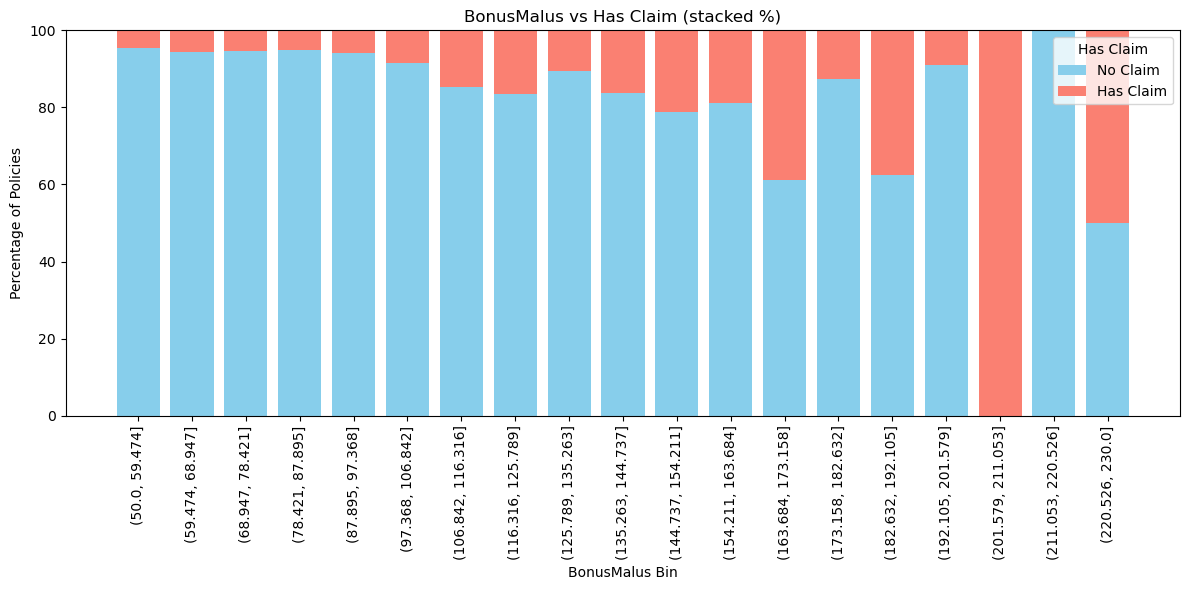

In [79]:

# --- Bin BonusMalus ---
bonus_bins = np.linspace(claims_raw["BonusMalus"].min(),
                         claims_raw["BonusMalus"].max(), 20)  # 20 bins
claims_raw["Bonus_bin"] = pd.cut(claims_raw["BonusMalus"], bins=bonus_bins)

# --- Compute counts per bin for has_claim ---
bonus_claim_counts = claims_raw.groupby(["Bonus_bin", "has_claim"]).size().unstack(fill_value=0)
bonus_claim_counts.columns = ["No Claim", "Has Claim"]

# --- Optional: convert to percentages ---
bonus_claim_perc = bonus_claim_counts.div(bonus_claim_counts.sum(axis=1), axis=0) * 100

# --- Plot stacked bar plot ---
plt.figure(figsize=(12, 6))
plt.bar(bonus_claim_perc.index.astype(str), bonus_claim_perc["No Claim"], label="No Claim", color="skyblue")
plt.bar(bonus_claim_perc.index.astype(str), bonus_claim_perc["Has Claim"],
        bottom=bonus_claim_perc["No Claim"], label="Has Claim", color="salmon")

plt.xticks(rotation=90)
plt.xlabel("BonusMalus Bin")
plt.ylabel("Percentage of Policies")
plt.title("BonusMalus vs Has Claim (stacked %)")
plt.legend(title="Has Claim")
plt.tight_layout()
plt.show()


Yes, higher Bonus Malus definitely leads to higher claims, but 99% of the data has a BonusMalus of 50, so the proporteins are uneven.

### Target vs Categorical variables

In [80]:
cat_features = ["VehBrand", "VehGas", "Area", "Region", "VehPower"]

In [ ]:
# for cat in cat_features:
#     print(f"\n=== {cat} ===")
#     stats_rate = claims_raw.groupby(cat)["ClaimRate"].agg(["mean", "std"]).sort_values("mean", ascending=False)
#     stats_nb = claims_raw.groupby(cat)["ClaimNb"].agg(["mean", "std"]).sort_values("mean", ascending=False)
#     print("ClaimRate stats:")
#     print(stats_rate)
#     print("\nClaimNb stats:")
#     print(stats_nb)


=== VehBrand ===
ClaimRate stats:
              mean       std
VehBrand                    
B12       0.479439  6.582064
B3        0.246495  4.632233
B10       0.214117  5.151634
B13       0.212657  4.690344
B5        0.210601  3.231106
B4        0.191911  3.427513
B6        0.190065  3.169227
B1        0.183419  3.341087
B2        0.172463  2.913388
B14       0.167863  3.370238
B11       0.167208  1.771286

ClaimNb stats:
              mean       std
VehBrand                    
B5        0.058456  0.246257
B13       0.054029  0.240265
B11       0.053724  0.240845
B2        0.053505  0.239194
B12       0.053082  0.240121
B1        0.053011  0.239972
B3        0.052387  0.235289
B4        0.052363  0.234677
B6        0.051200  0.232822
B10       0.048594  0.226182
B14       0.041345  0.206723

=== VehGas ===
ClaimRate stats:
             mean       std
VehGas                     
Regular  0.309219  4.858596
Diesel   0.211169  3.929331

ClaimNb stats:
             mean       std
VehGas

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2252312960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claims_raw.groupby(cat)["ClaimRate"].mean().index,


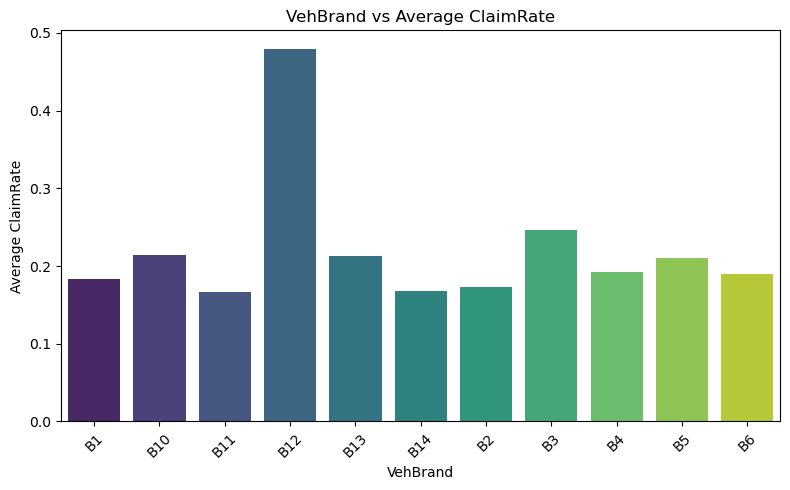

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2252312960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claims_raw.groupby(cat)["ClaimRate"].mean().index,


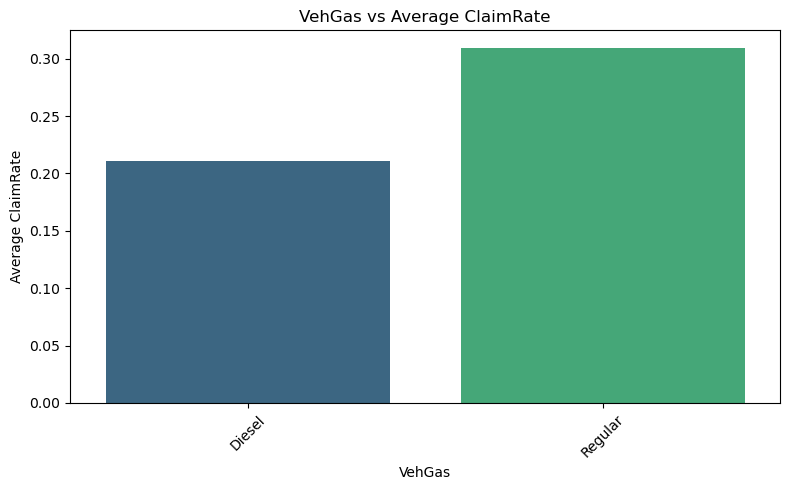

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2252312960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claims_raw.groupby(cat)["ClaimRate"].mean().index,


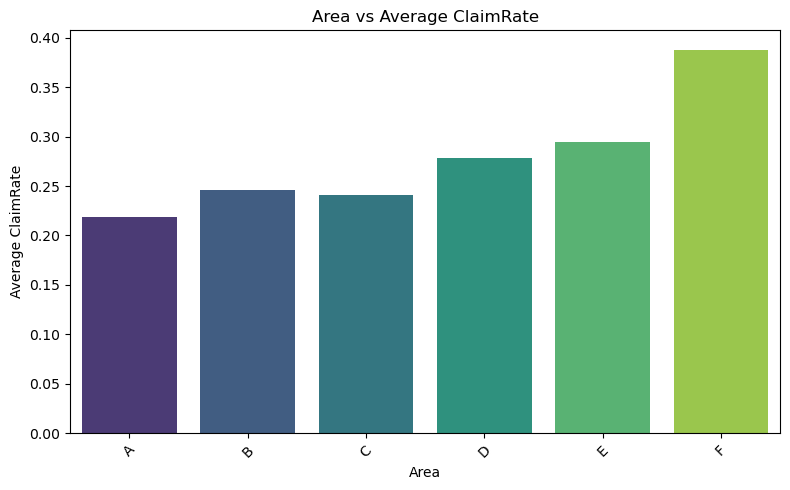

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2252312960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claims_raw.groupby(cat)["ClaimRate"].mean().index,


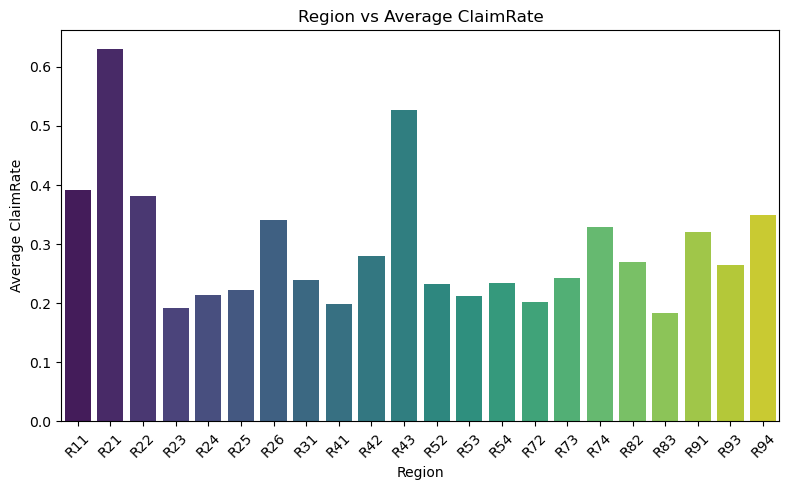

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/2252312960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claims_raw.groupby(cat)["ClaimRate"].mean().index,


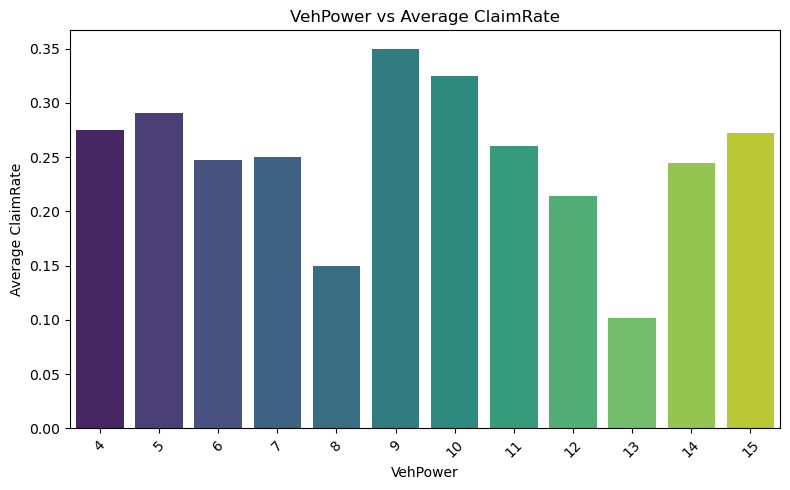

In [90]:
for cat in cat_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=claims_raw.groupby(cat)["ClaimRate"].mean().index,
                y=claims_raw.groupby(cat)["ClaimRate"].mean().values,
                palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"{cat} vs Average ClaimRate")
    plt.ylabel("Average ClaimRate")
    plt.tight_layout()
    plt.show()

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/1467116279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y="ClaimRate", data=claims_raw, palette="viridis", ax=axes[0, 0])


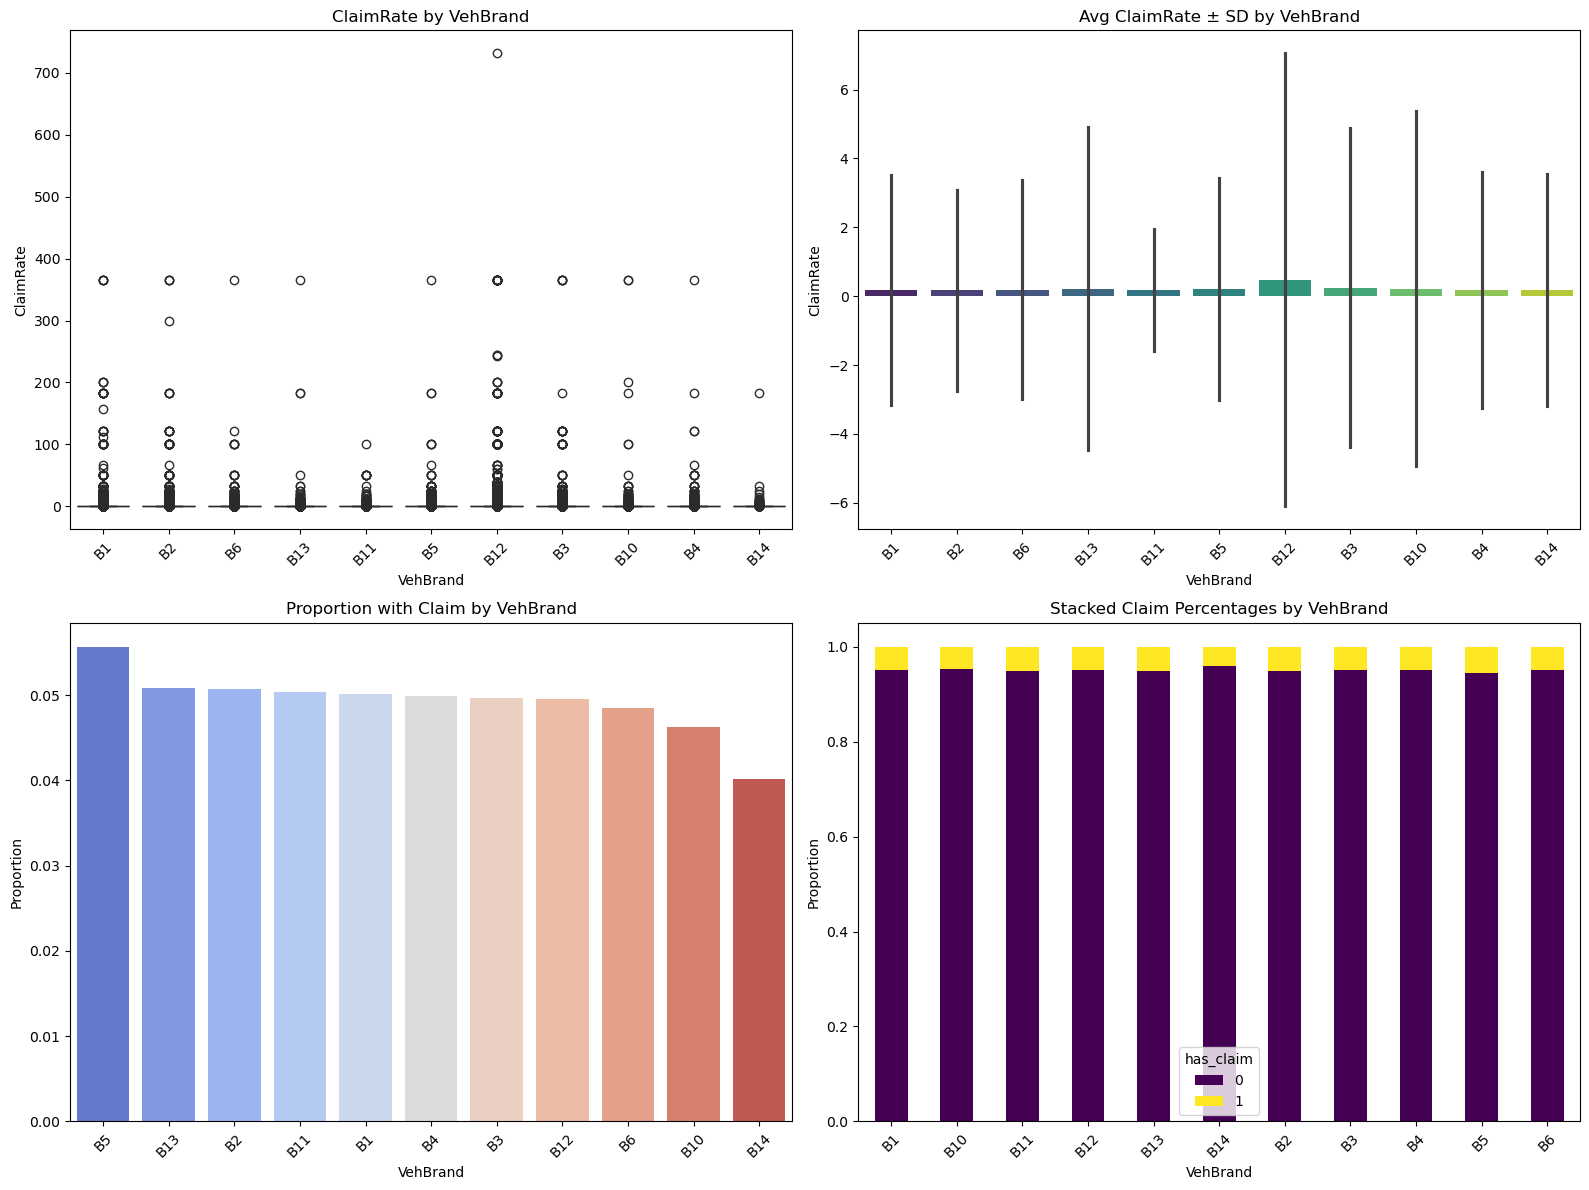

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/1467116279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y="ClaimRate", data=claims_raw, palette="viridis", ax=axes[0, 0])


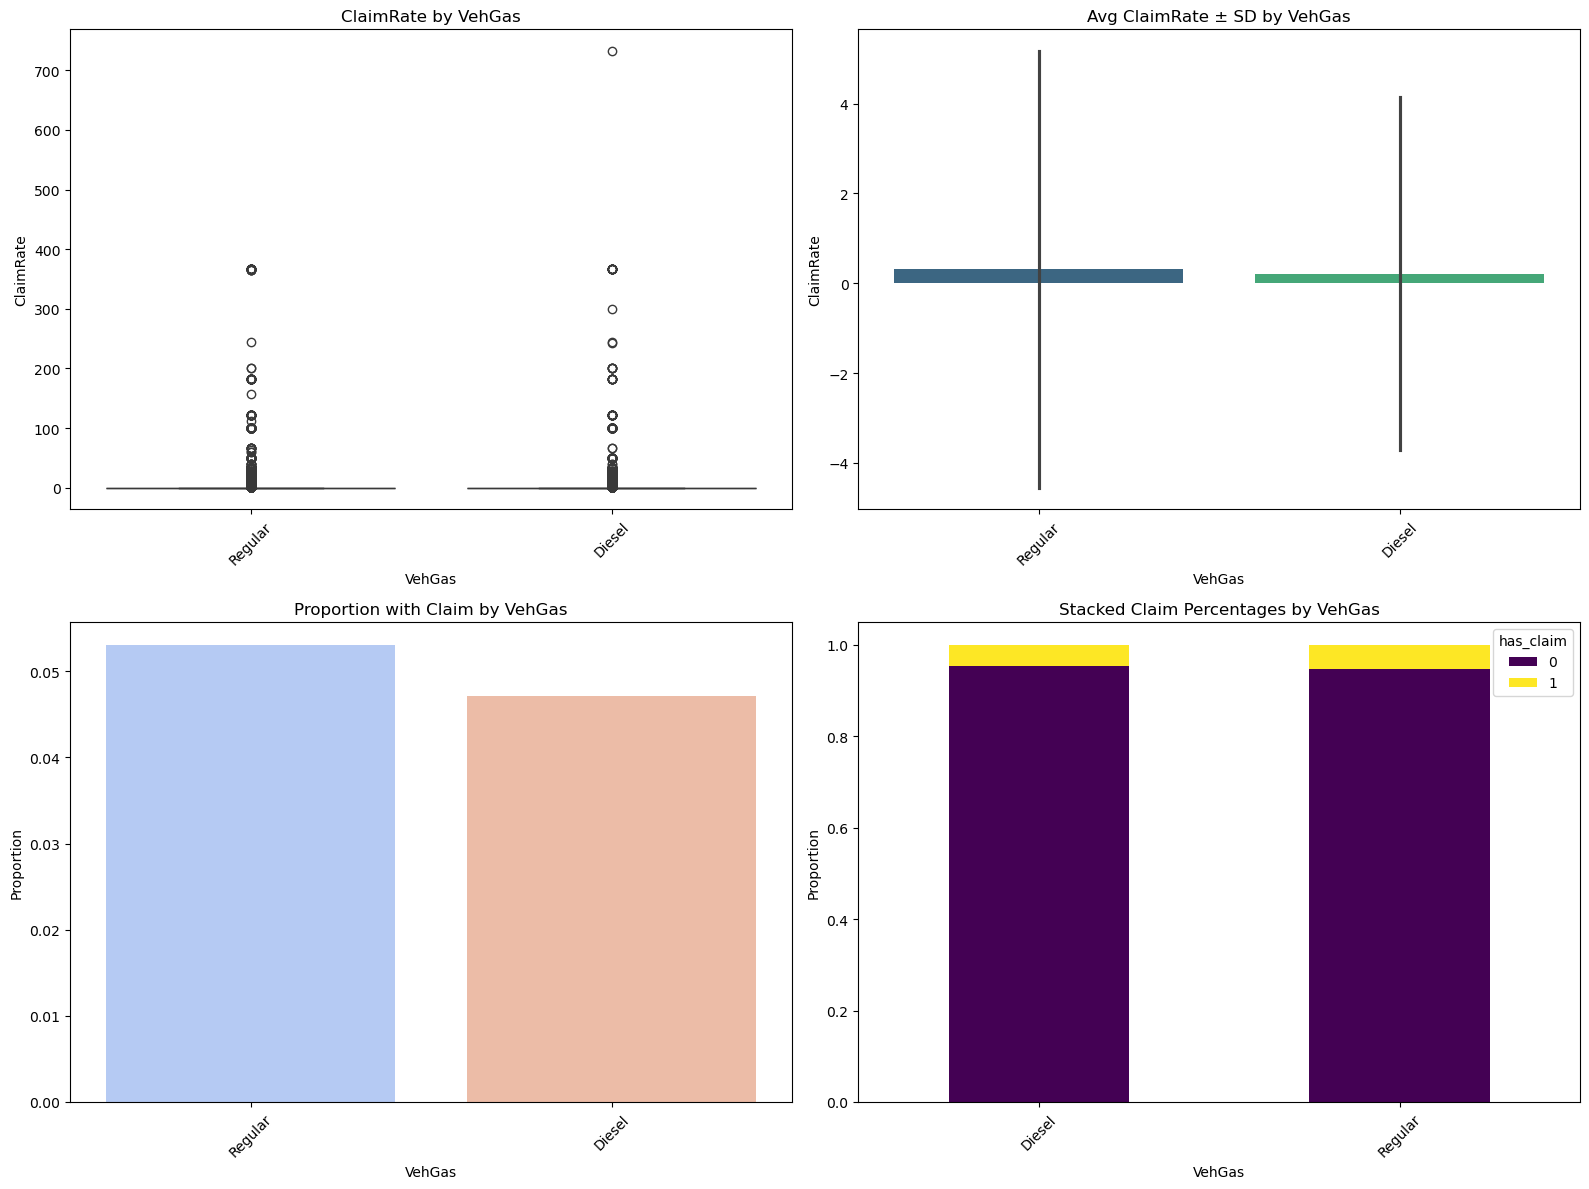

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/1467116279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y="ClaimRate", data=claims_raw, palette="viridis", ax=axes[0, 0])


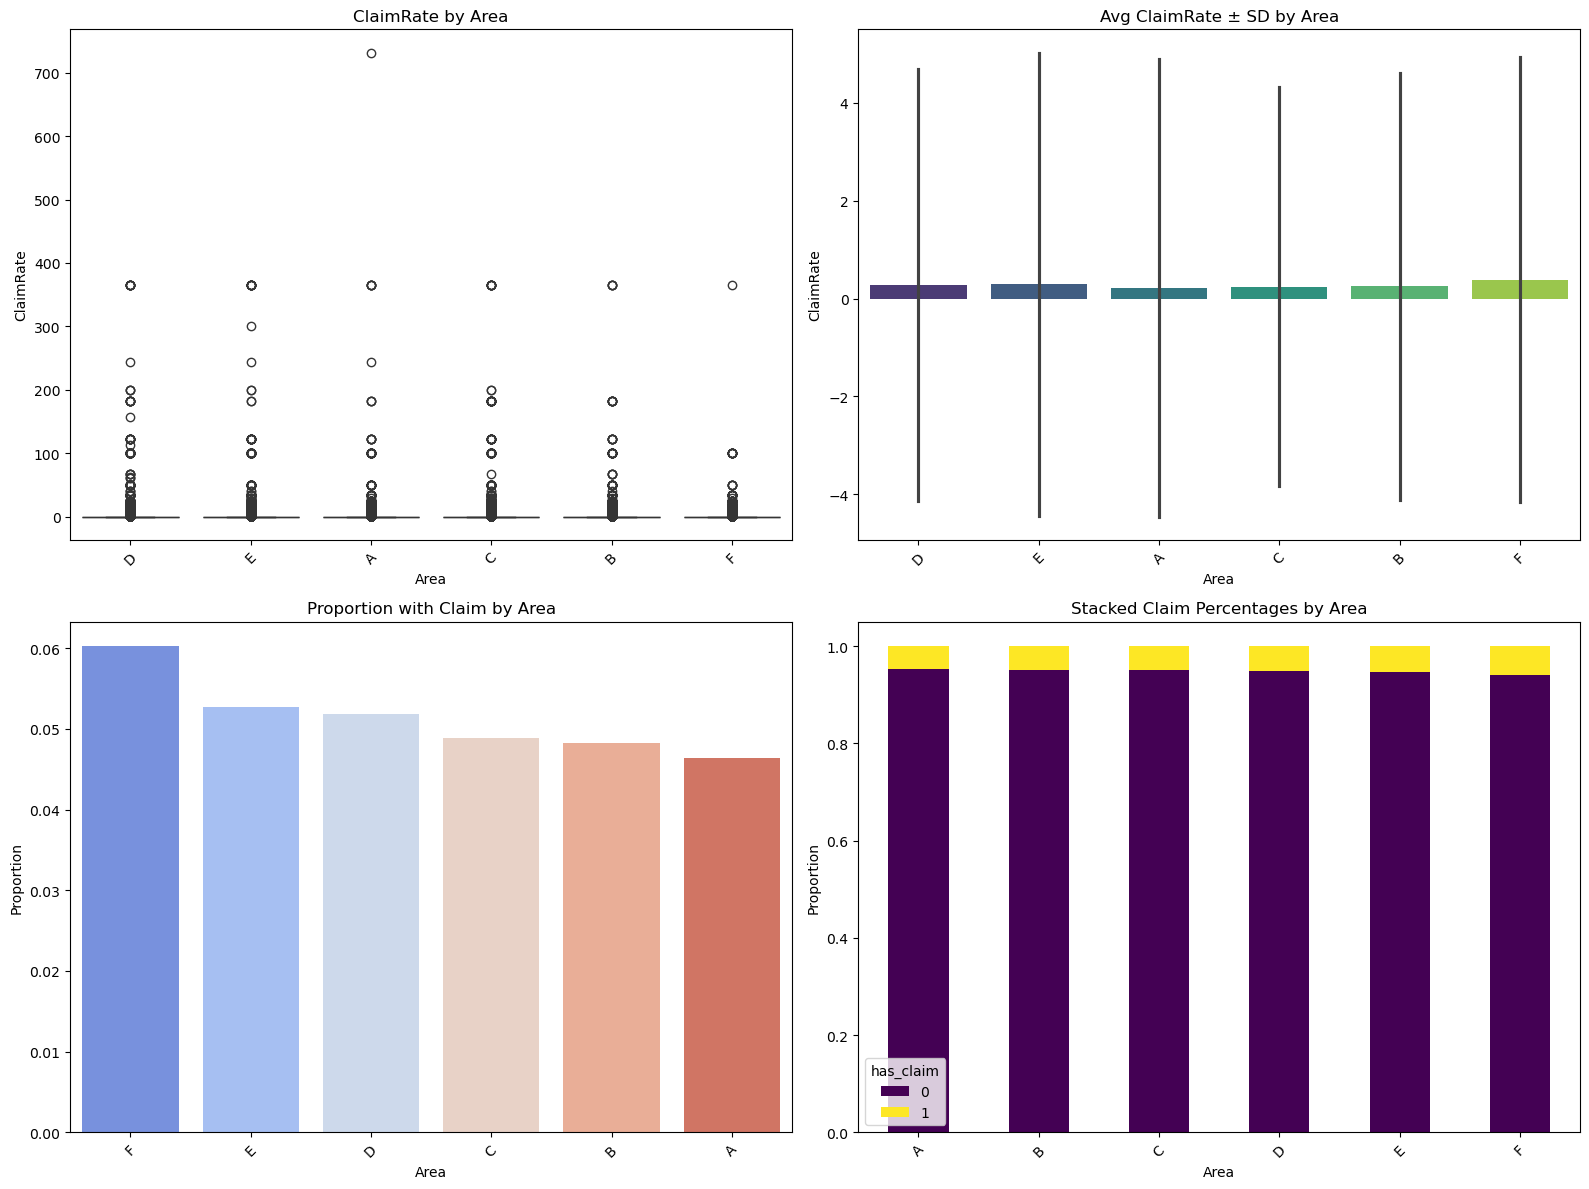

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/1467116279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y="ClaimRate", data=claims_raw, palette="viridis", ax=axes[0, 0])


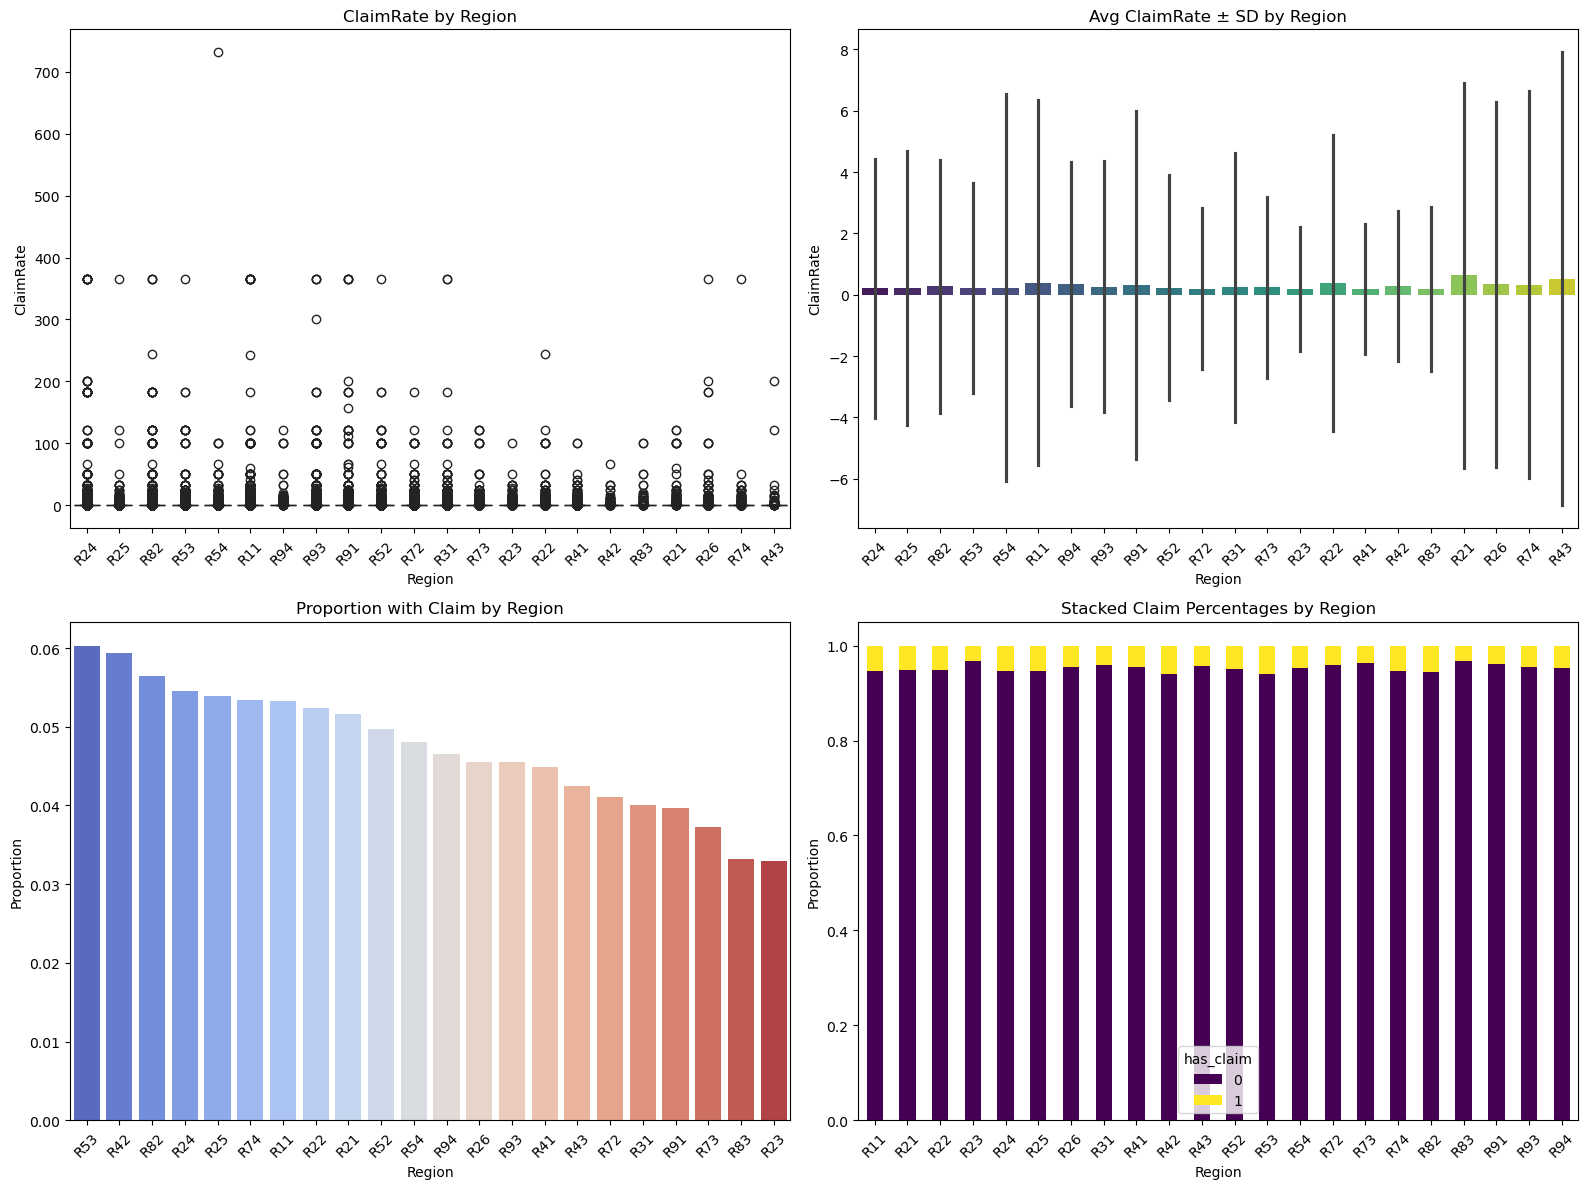

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/1467116279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y="ClaimRate", data=claims_raw, palette="viridis", ax=axes[0, 0])


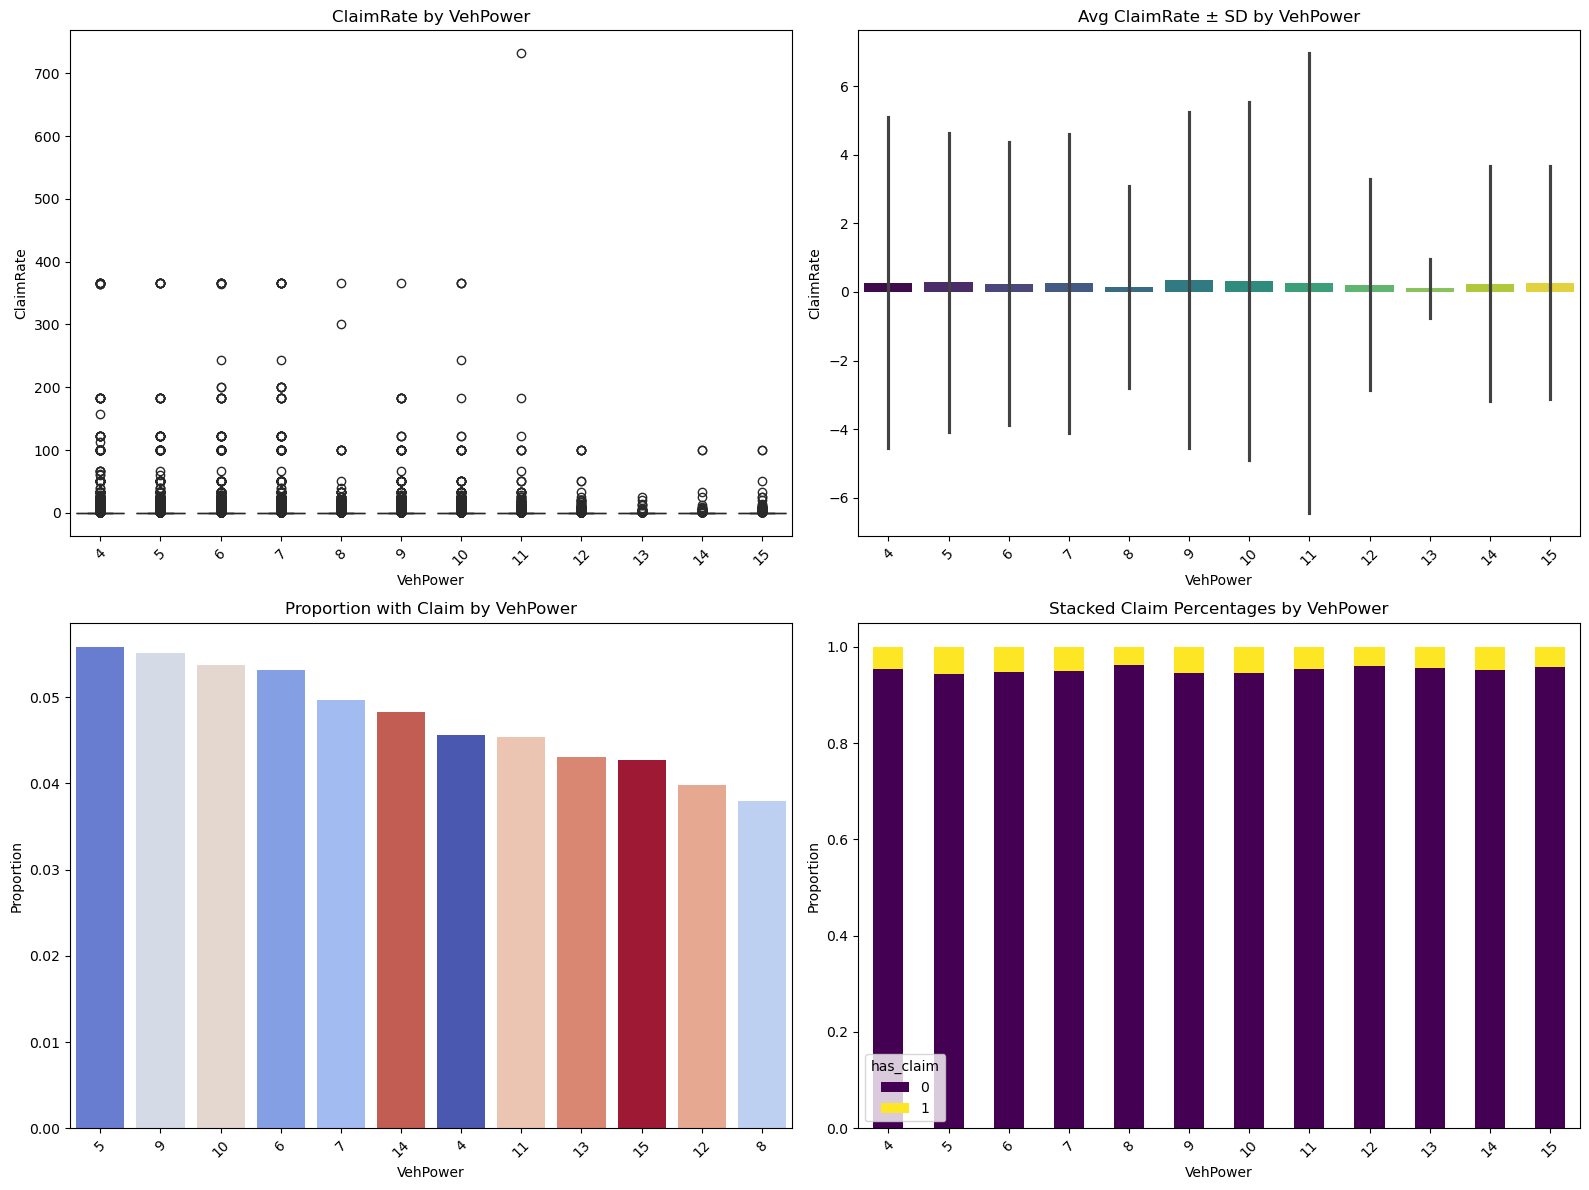

In [82]:
for cat in cat_features:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid

    # --- 1. Boxplot of ClaimRate ---
    sns.boxplot(x=cat, y="ClaimRate", data=claims_raw, palette="viridis", ax=axes[0, 0])
    axes[0, 0].set_title(f"ClaimRate by {cat}")
    axes[0, 0].tick_params(axis='x', rotation=45)

    # --- 2. Barplot of Mean ClaimRate ± SD ---
    sns.barplot(x=cat, y="ClaimRate", hue=cat, data=claims_raw,
                errorbar="sd", palette="viridis", ax=axes[0, 1], dodge=False, legend=False)
    axes[0, 1].set_title(f"Avg ClaimRate ± SD by {cat}")
    axes[0, 1].tick_params(axis='x', rotation=45)

    # --- 3. Proportion of Policies with a Claim ---
    prop_df = claims_raw.groupby(cat)["has_claim"].mean().sort_values(ascending=False)
    sns.barplot(x=prop_df.index.astype(str), y=prop_df.values,
                hue=prop_df.index, palette="coolwarm", dodge=False, legend=False, ax=axes[1, 0])
    axes[1, 0].set_title(f"Proportion with Claim by {cat}")
    axes[1, 0].set_ylabel("Proportion")
    axes[1, 0].tick_params(axis='x', rotation=45)

    # --- 4. Stacked percentage of Claims ---
    counts = claims_raw.groupby([cat, "has_claim"]).size().unstack(fill_value=0)
    counts_pct = counts.div(counts.sum(axis=1), axis=0)  # convert to percentage
    counts_pct.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[1, 1])
    axes[1, 1].set_title(f"Stacked Claim Percentages by {cat}")
    axes[1, 1].set_ylabel("Proportion")
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


There are definitely some categories which have higher proportions of claims, but it seems a little.

### Features vs Features

#### Continuous vs Continuous

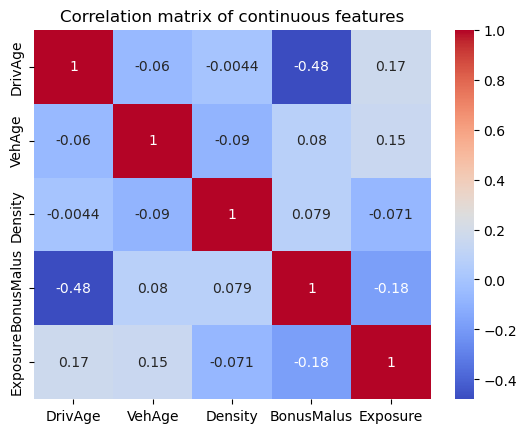

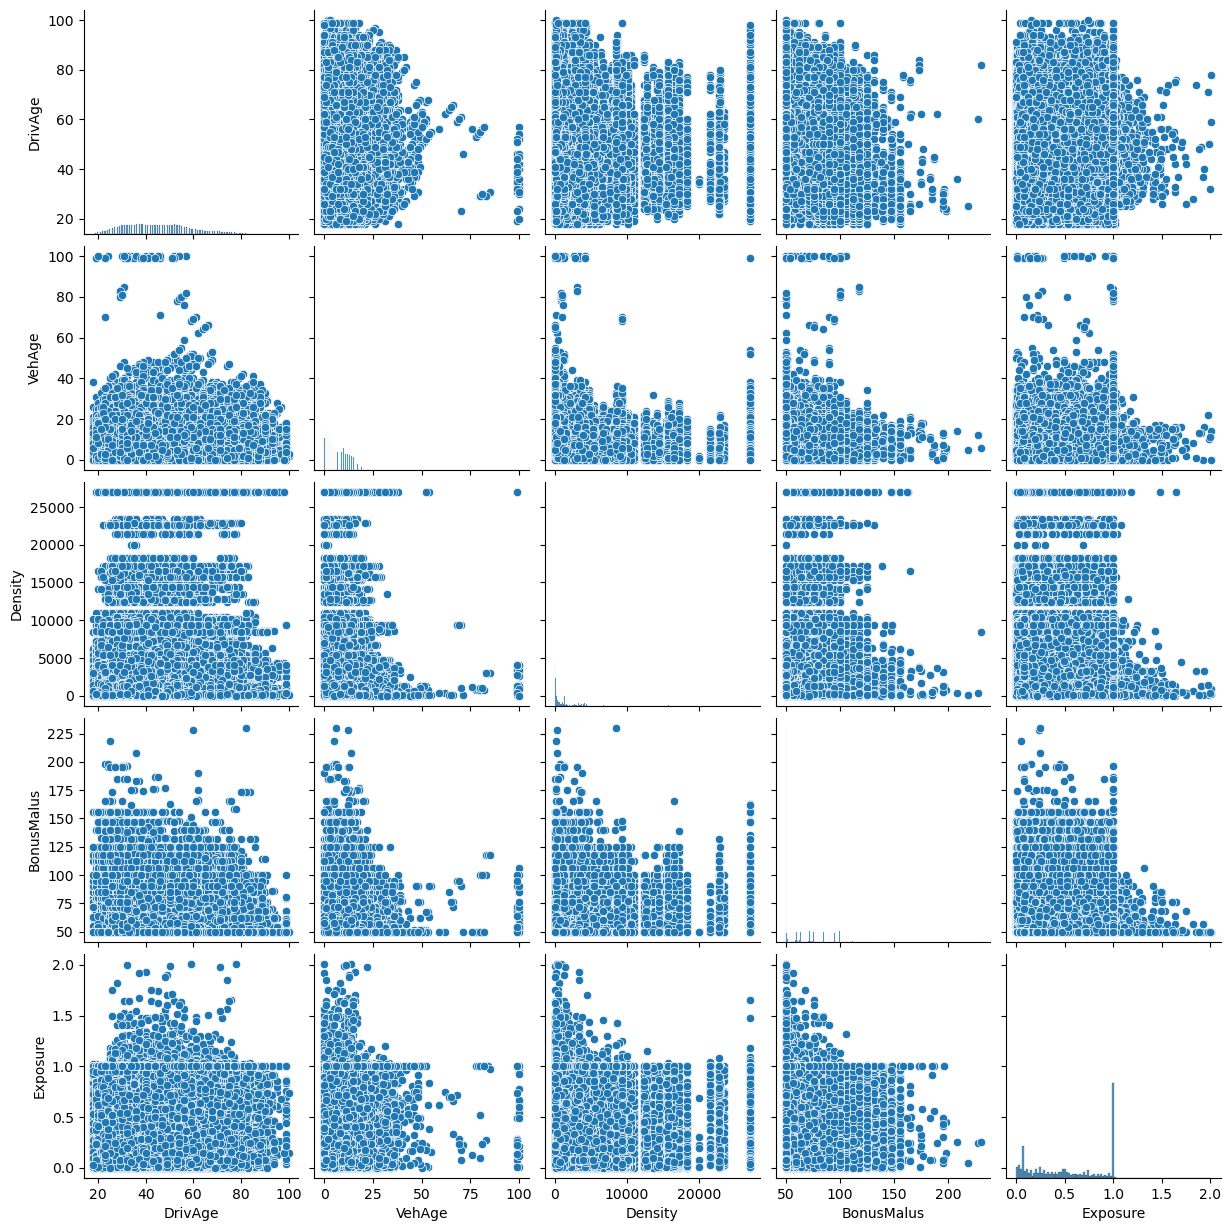

In [83]:
# Correlation matrix
cont_features = ["DrivAge", "VehAge", "Density", "BonusMalus", "Exposure"]
corr = claims_raw[cont_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of continuous features")
plt.show()

# Scatterplots
sns.pairplot(claims_raw[cont_features])
plt.show()


We are looking for multicollinearity here. `DrivAge` and `BonusMalus` seem to have moderately strong negative correlation, this means higher Bonus Malus score means younger ages.

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = claims_raw[cont_features]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      feature       VIF
0     DrivAge  5.977899
1      VehAge  2.631881
2     Density  1.228184
3  BonusMalus  5.722547
4    Exposure  3.211576


We can see the VIF score is high for the two features, because of their correlation. Most likely this is still fine as its just moderate, but it could be combined if needed.

#### Categorical vs Categorical

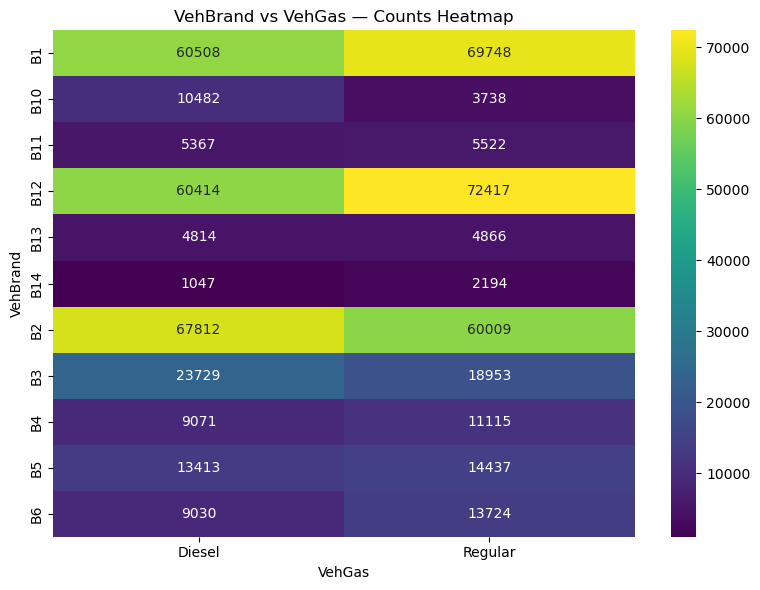

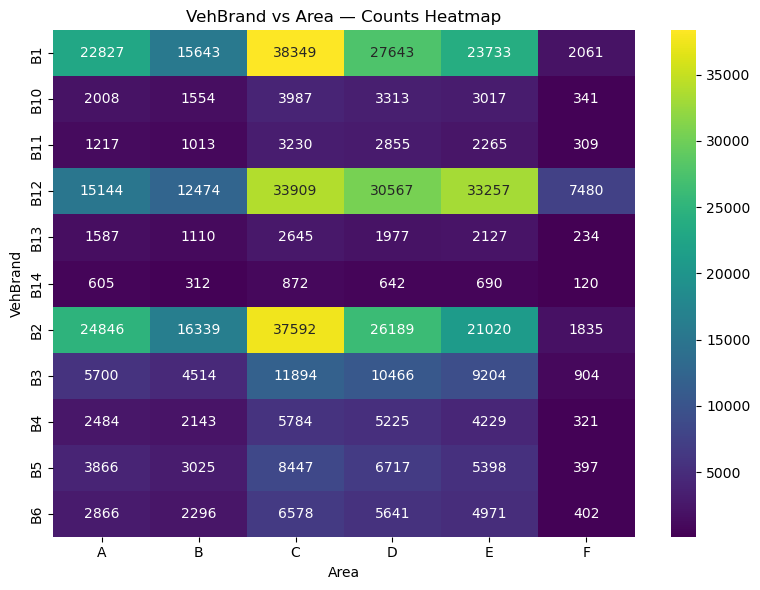

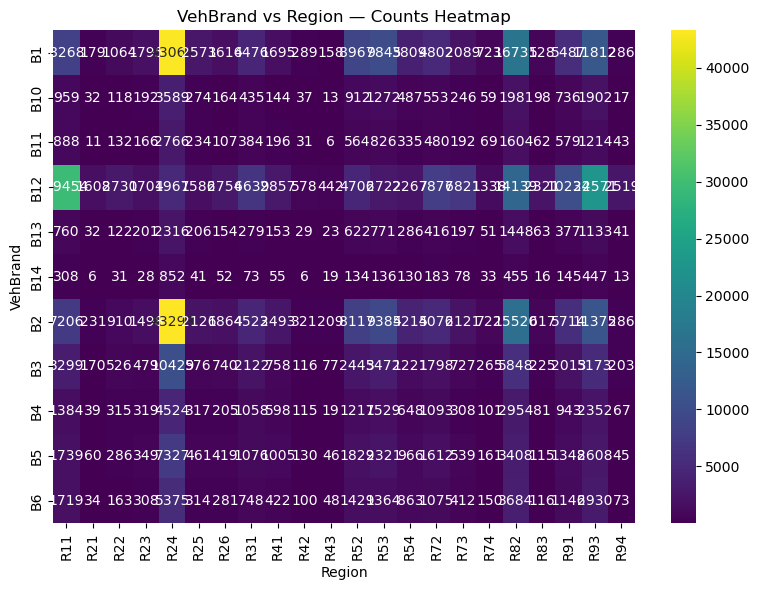

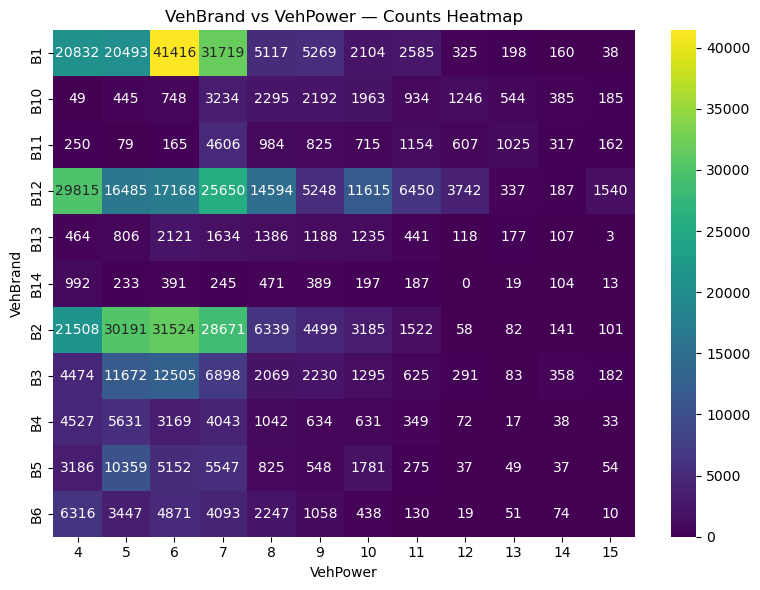

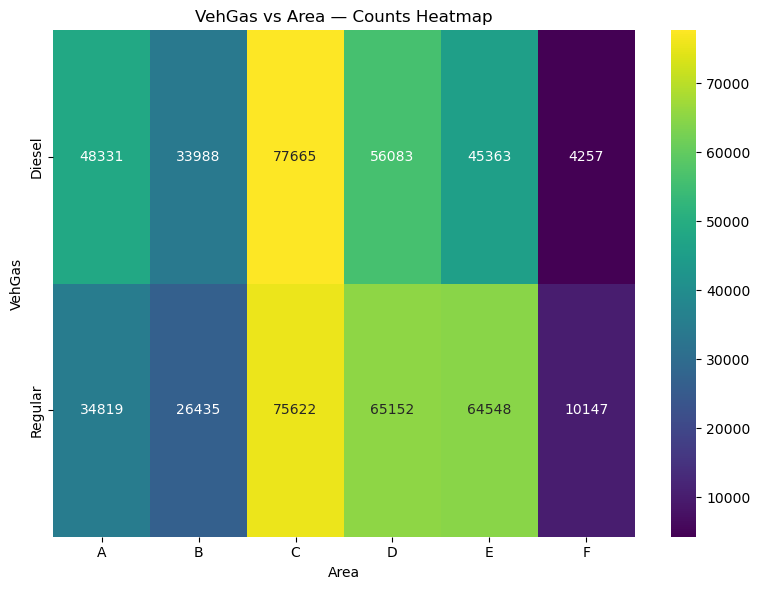

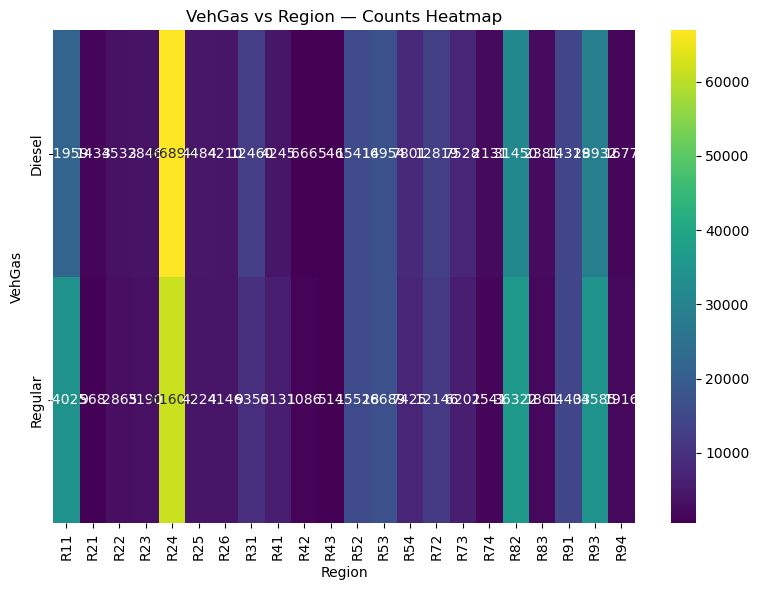

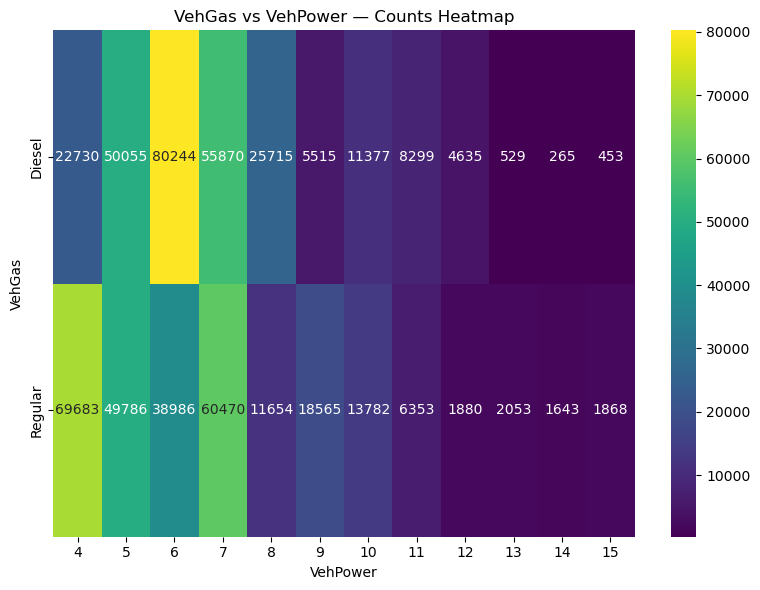

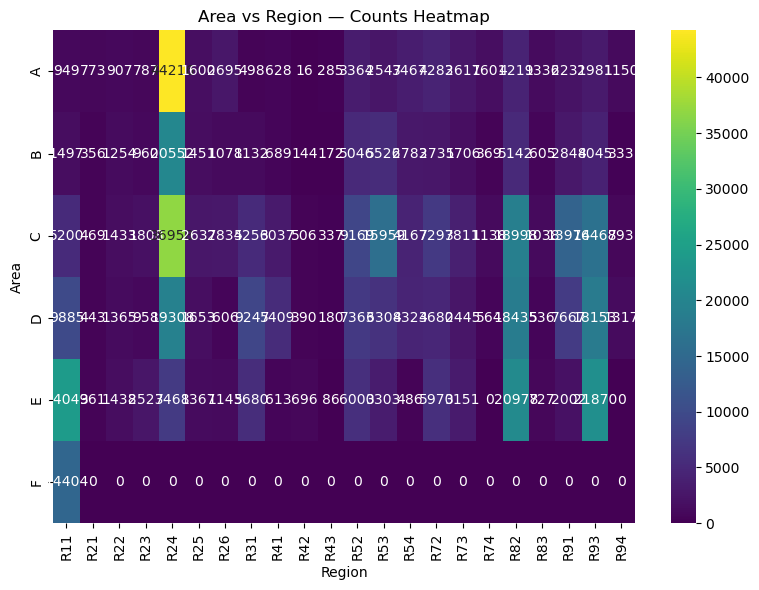

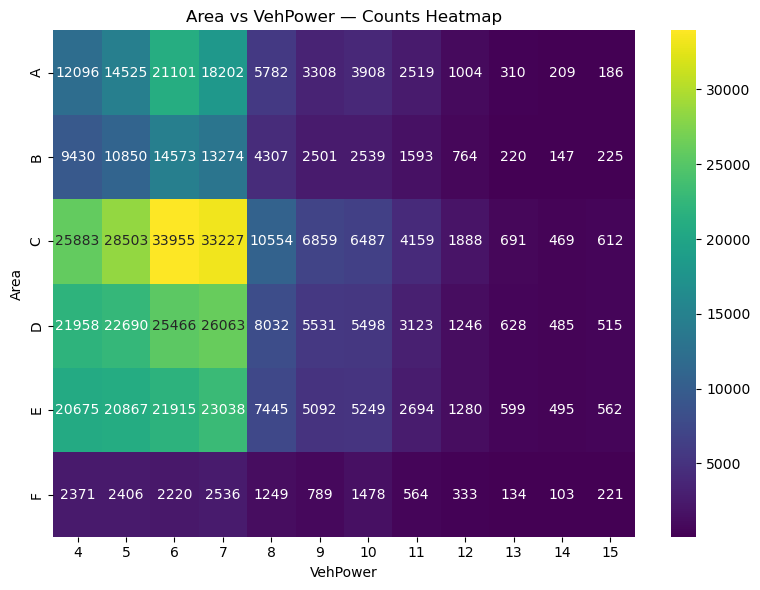

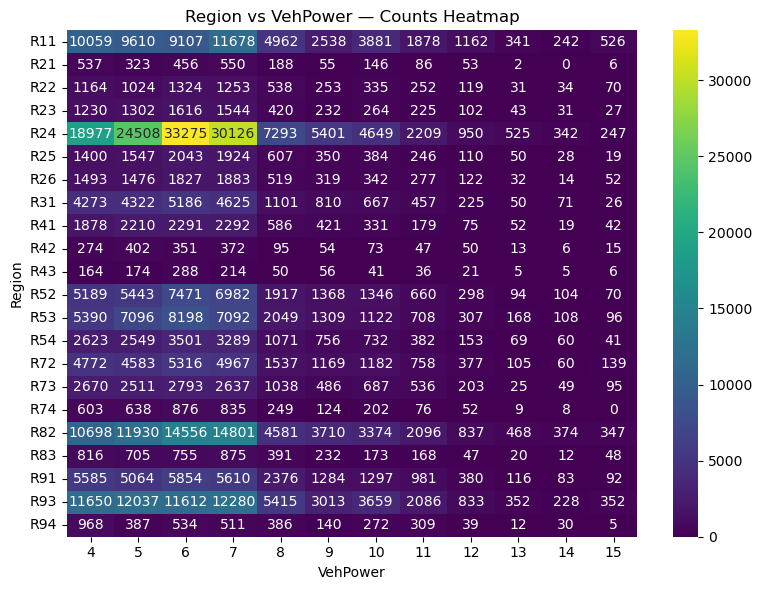

In [85]:
# Loop through pairs
for i, cat1 in enumerate(cat_features):
    for cat2 in cat_features[i+1:]:
        # Create contingency table
        table = pd.crosstab(claims_raw[cat1], claims_raw[cat2])
        
        # Plot heatmap
        plt.figure(figsize=(8,6))
        sns.heatmap(table, annot=True, fmt="d", cmap="viridis")
        plt.title(f"{cat1} vs {cat2} — Counts Heatmap")
        plt.ylabel(cat1)
        plt.xlabel(cat2)
        plt.tight_layout()
        plt.show()

There are some rarer and some dominant combinations, hard to interpret much, so lets check some statistics.

In [86]:
from scipy.stats import chi2_contingency


chi_results = []

for i, cat1 in enumerate(cat_features):
    for cat2 in cat_features[i+1:]:
        # Contingency table
        table = pd.crosstab(claims_raw[cat1], claims_raw[cat2])
        
        # Chi-square test
        chi2, p, dof, ex = chi2_contingency(table)
        
        # Cramer's V
        n = table.sum().sum()
        phi2 = chi2/n
        r, k = table.shape
        cramers_v = (phi2 / min(k-1, r-1))**0.5
        
        chi_results.append({
            "Feature 1": cat1,
            "Feature 2": cat2,
            "Chi2": chi2,
            "p-value": p,
            "Cramers V": cramers_v
        })

chi_results_df = pd.DataFrame(chi_results)
chi_results_df.sort_values("Cramers V", ascending=False, inplace=True)
print(chi_results_df)

  Feature 1 Feature 2           Chi2  p-value  Cramers V
7      Area    Region  276954.758175      0.0   0.319562
6    VehGas  VehPower   54887.289868      0.0   0.318106
3  VehBrand  VehPower  134510.503294      0.0   0.157476
4    VehGas      Area    9382.092956      0.0   0.131518
2  VehBrand    Region   91566.105165      0.0   0.129928
0  VehBrand    VehGas    7349.150330      0.0   0.116400
5    VehGas    Region    4898.707897      0.0   0.095034
1  VehBrand      Area   14661.022957      0.0   0.073525
9    Region  VehPower   11611.982401      0.0   0.044116
8      Area  VehPower    4364.173310      0.0   0.040115


- **Chi2 Statistic** & p-value: Tests whether two categorical features are independent. A low p-value (<0.05) indicates that the variables are likely dependent.
- **Cramer's V** :Measures the strength of association between two categorical variables (0 = no association, 1 = perfect association). Helps identify which pairs are strongly related and may need careful handling in modeling (like avoiding dummy variable multicollinearity).


- `Area` vs `Region`: Cramer's V = 0.32 → moderately strong association. Makes sense, regions are geographically grouped by areas.
- `VehGas` vs `VehPower`: Cramer's V = 0.32 → moderately strong association. Certain fuel types correlate with engine power

We might need to combine these into a single feature, as they contain redundant information and we would just increase dimensionaly for no reason.

#### Continuous vs Categorical

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folde

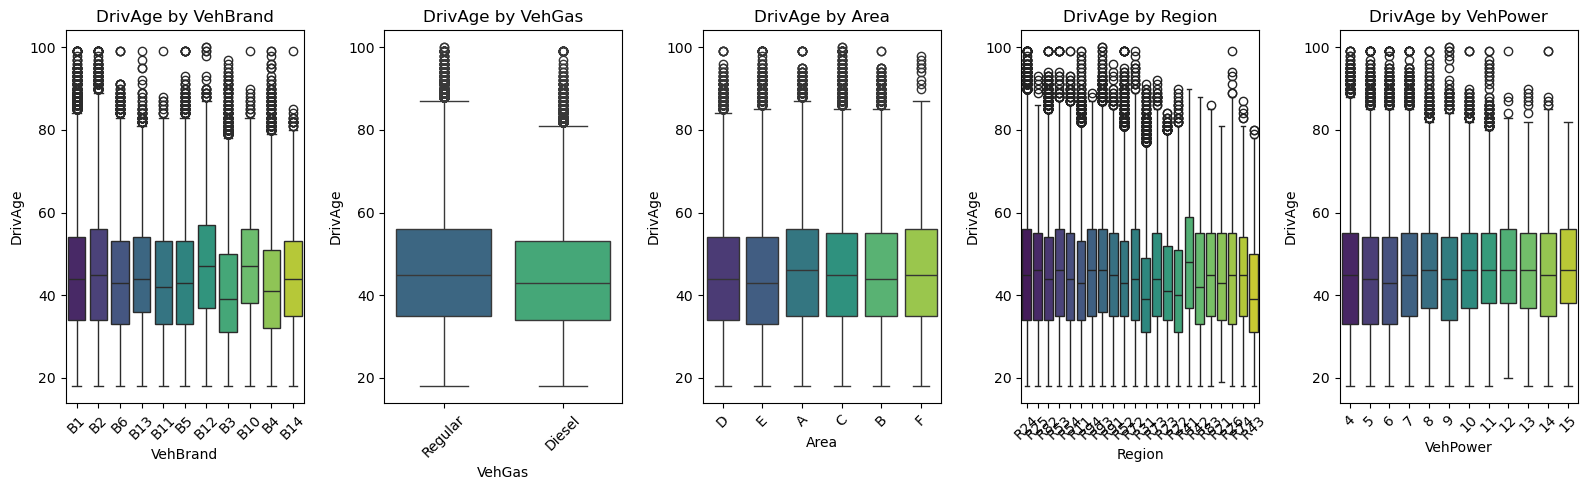

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folde

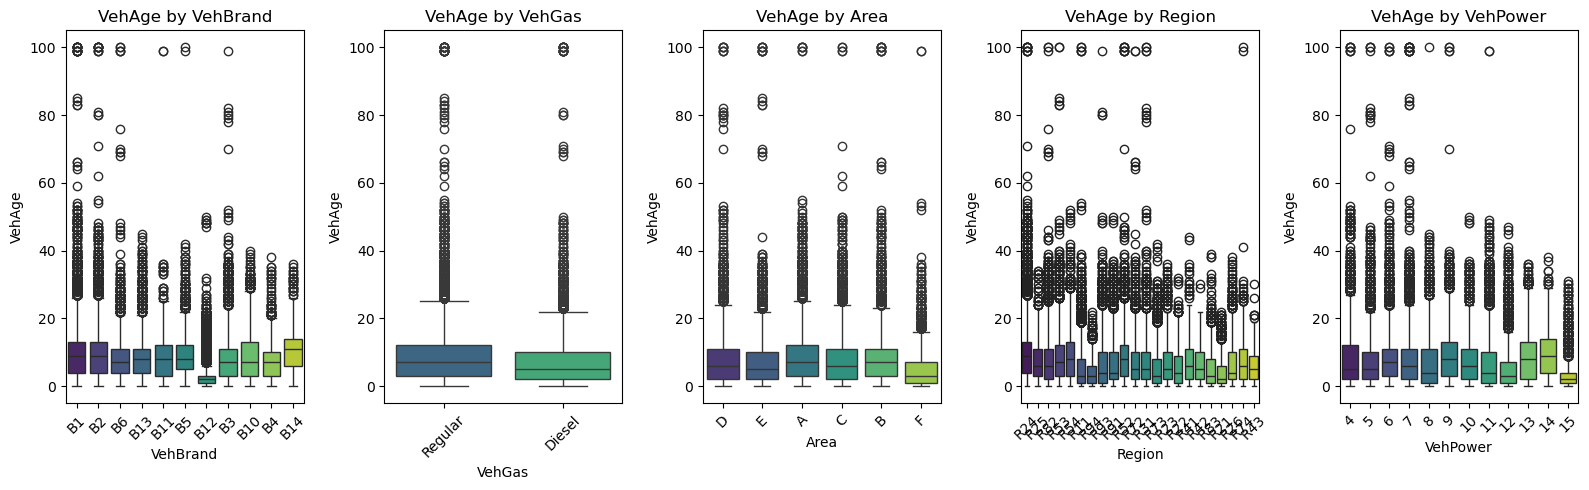

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folde

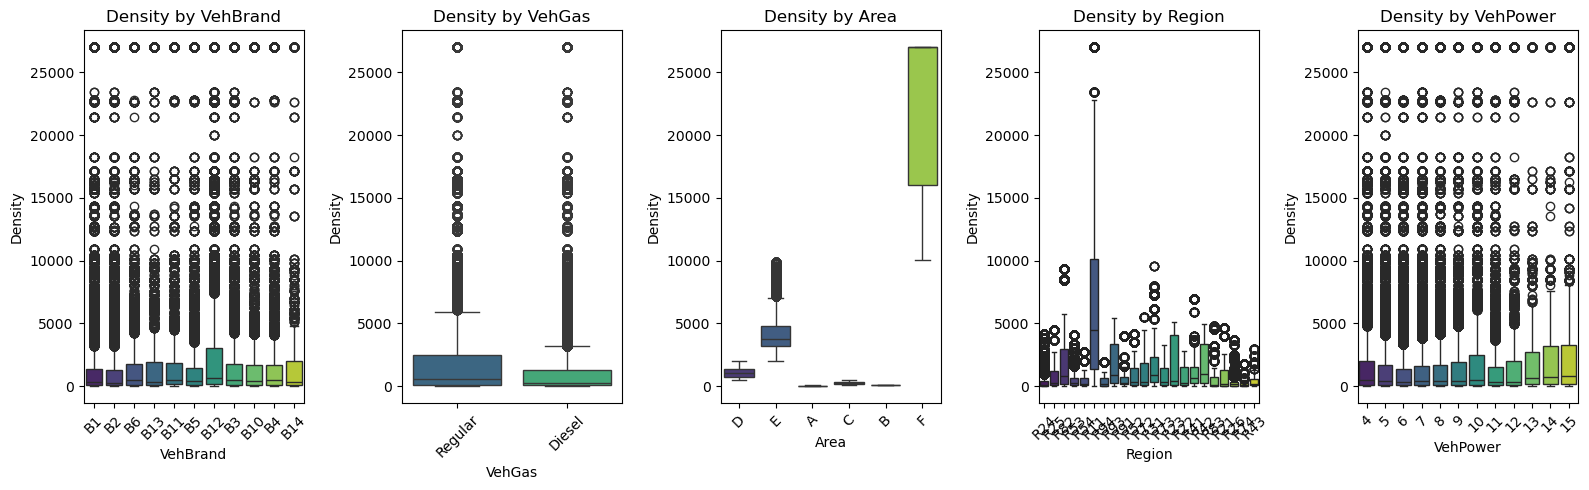

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folde

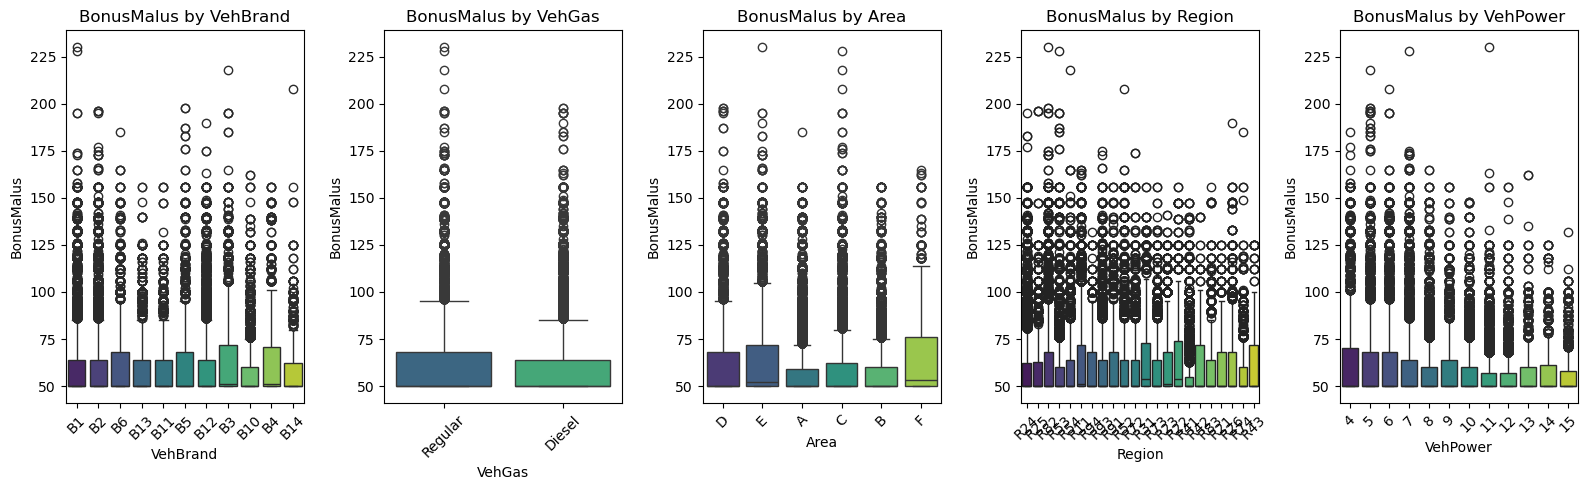

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/3963627820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
/var/folde

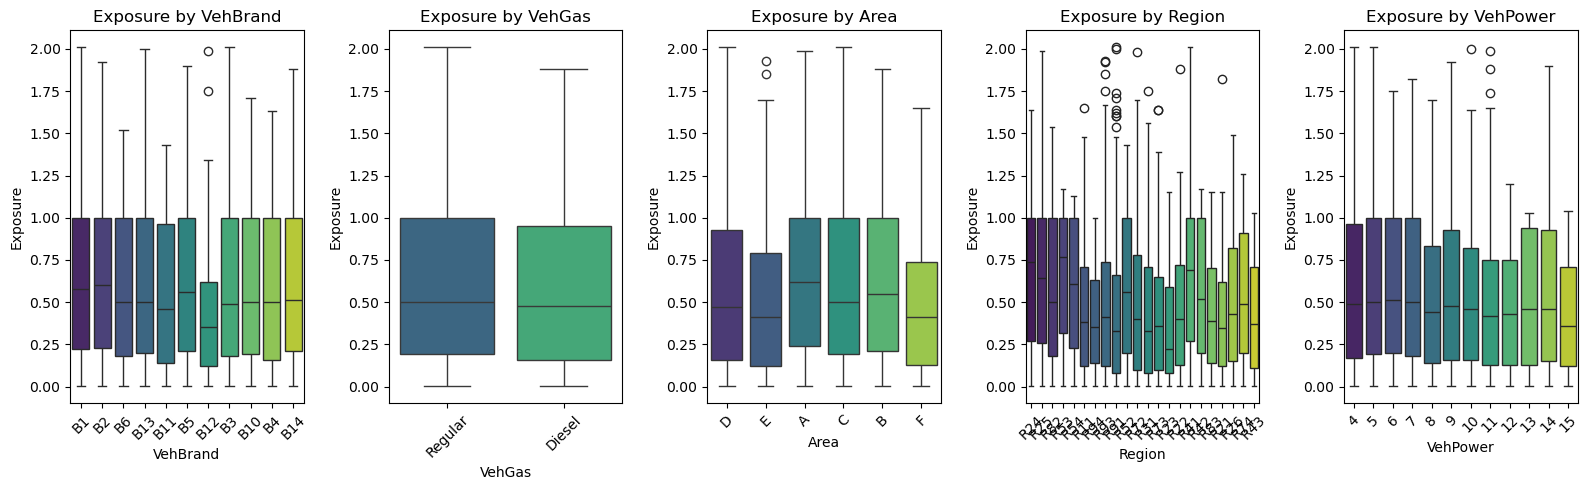

In [87]:

for cont in cont_features:
    plt.figure(figsize=(16, 5))
    for i, cat in enumerate(cat_features):
        plt.subplot(1, len(cat_features), i+1)
        sns.boxplot(x=cat, y=cont, data=claims_raw, palette="viridis")
        plt.xticks(rotation=45)
        plt.title(f"{cont} by {cat}")
    plt.tight_layout()
    plt.show()


`Density` is connected to `Area` and `Region` as we can see from the plots, there are also some smaller cues.

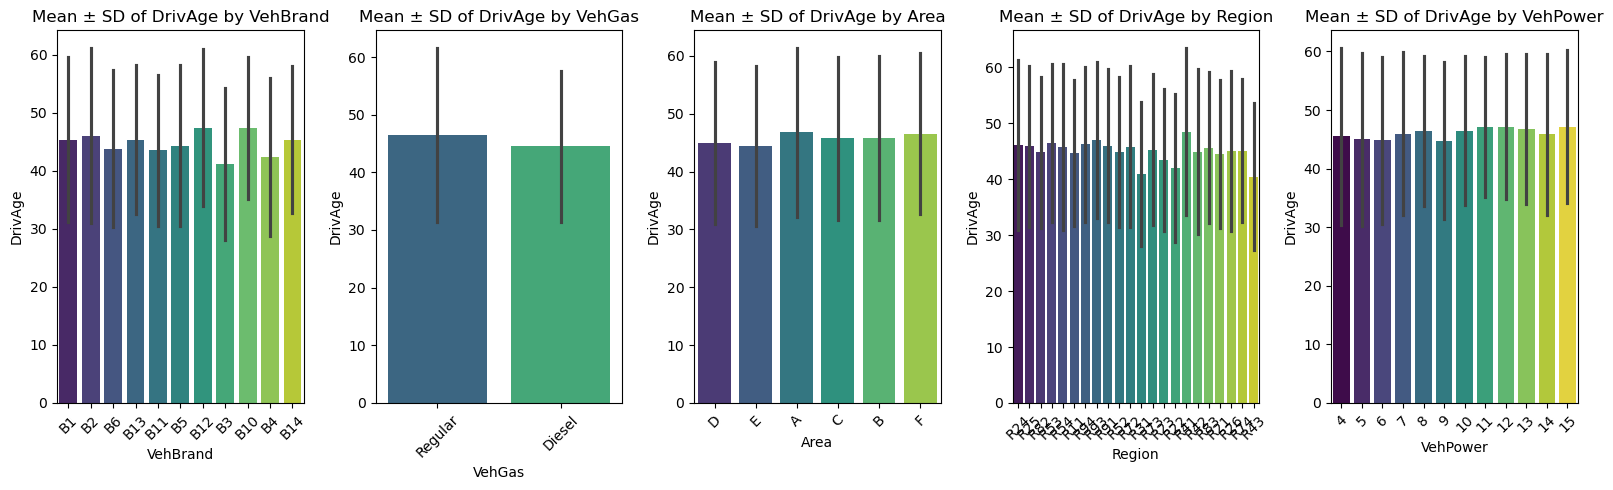

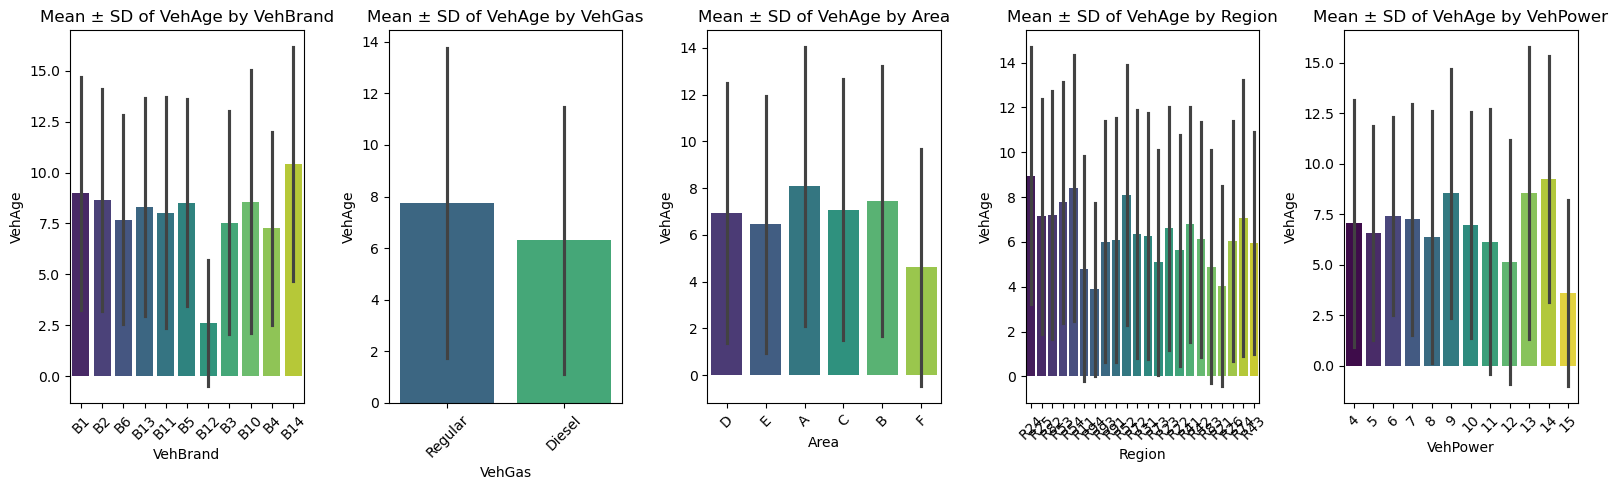

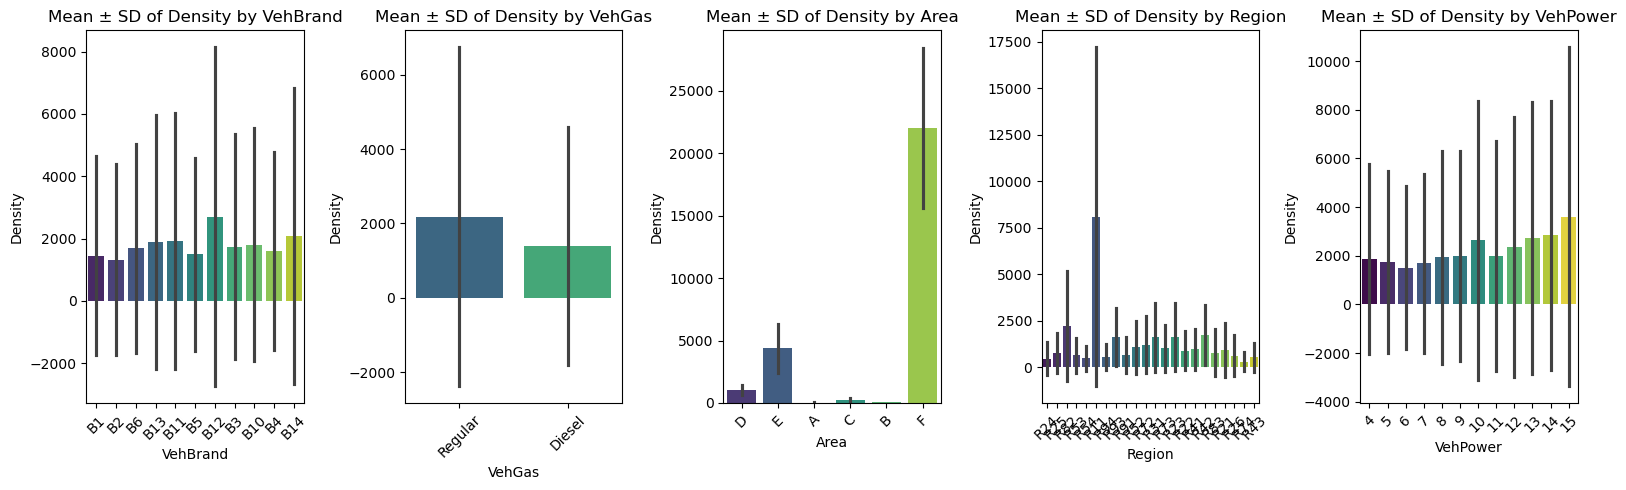

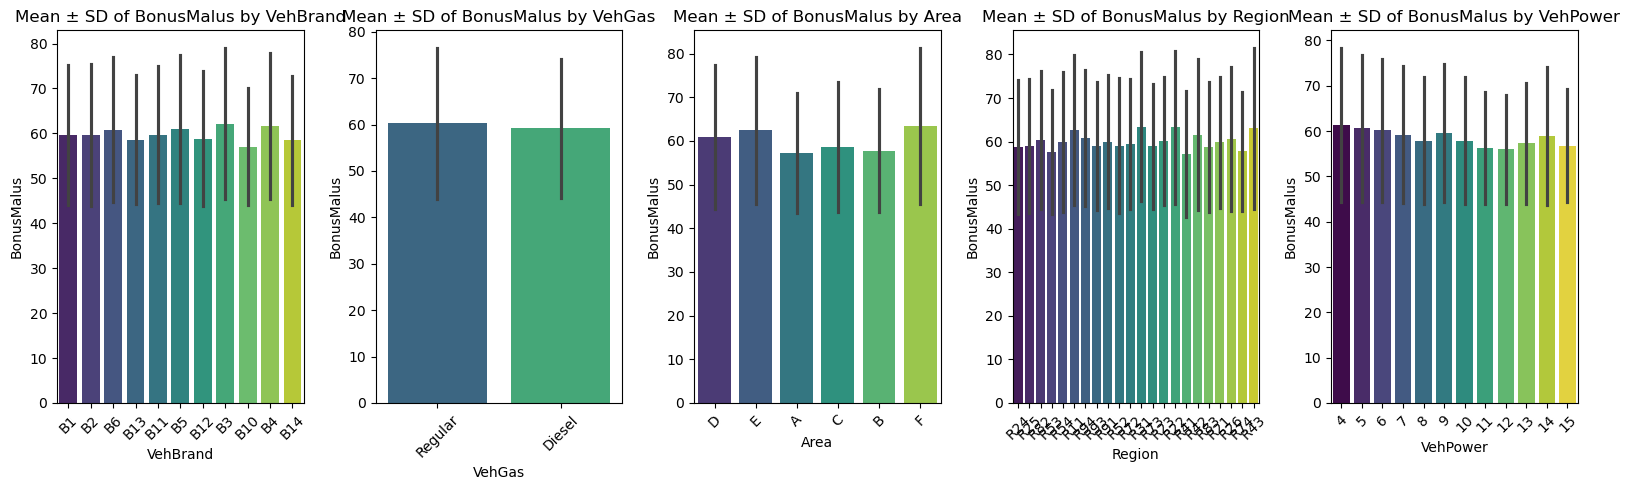

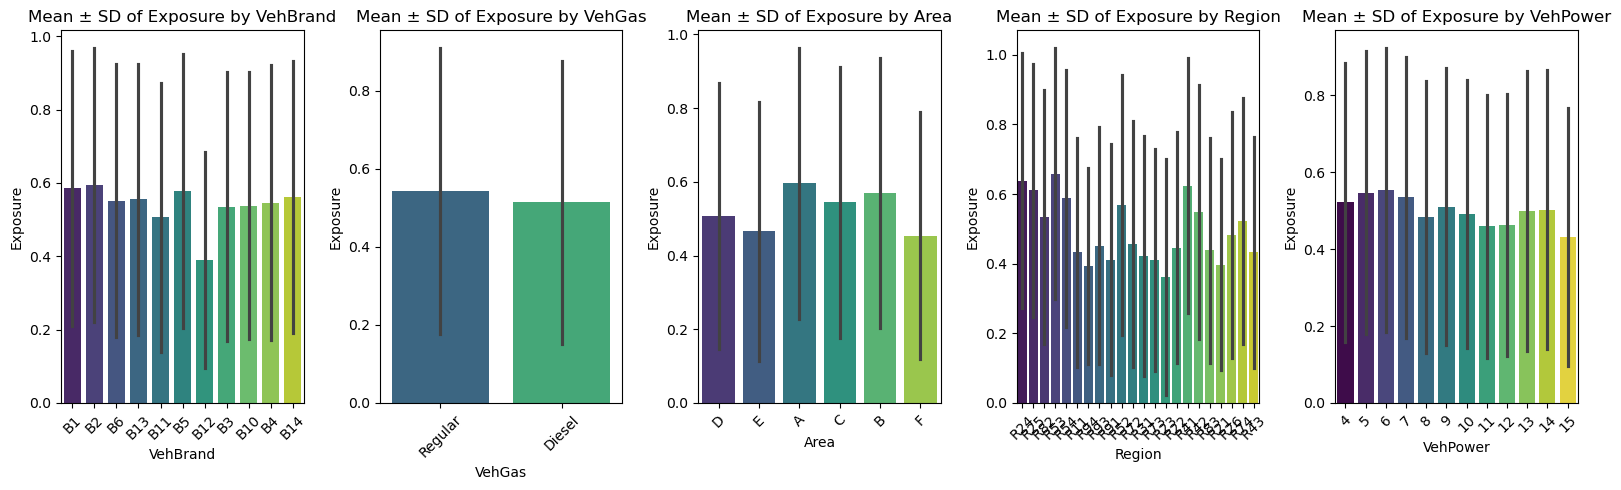

In [88]:
for cont in cont_features:
    plt.figure(figsize=(16, 5))
    for i, cat in enumerate(cat_features):
        plt.subplot(1, len(cat_features), i+1)
        sns.barplot(x=cat, y=cont, data=claims_raw, hue=cat, errorbar="sd", dodge=False, palette="viridis", legend=False)
        plt.xticks(rotation=45)
        plt.title(f"Mean ± SD of {cont} by {cat}")
    plt.tight_layout()
    plt.show()

In [89]:
import scipy.stats as stats

results = []
for cont in cont_features:
    for cat in cat_features:
        groups = [group[cont].values for name, group in claims_raw.groupby(cat)]
        f_stat, p_val = stats.f_oneway(*groups)
        results.append({"Continuous": cont, "Categorical": cat, "F-stat": f_stat, "p-value": p_val})


anova_df = pd.DataFrame(results)
anova_df

Continuous Categorical         F-stat        p-value
0      DrivAge    VehBrand     877.143623   0.000000e+00
1      DrivAge      VehGas    2740.038328   0.000000e+00
2      DrivAge        Area     332.811615   0.000000e+00
3      DrivAge      Region     249.263183   0.000000e+00
4      DrivAge    VehPower     110.829507  2.399369e-254
5       VehAge    VehBrand   14262.243688   0.000000e+00
6       VehAge      VehGas    8929.735910   0.000000e+00
7       VehAge        Area    1406.690280   0.000000e+00
8       VehAge      Region    1760.797226   0.000000e+00
9       VehAge    VehPower     547.810614   0.000000e+00
10     Density    VehBrand    1023.164513   0.000000e+00
11     Density      VehGas    5383.119433   0.000000e+00
12     Density        Area  792357.967835   0.000000e+00
13     Density      Region   11739.626440   0.000000e+00
14     Density    VehPower     264.882172   0.000000e+00
15  BonusMalus    VehBrand     255.380471   0.000000e+00
16  BonusMalus      VehGas     552.532562  4.077059e-122
17  BonusMalus        Area    1761.715260   0.000000e+00
18  BonusMalus      Region     252.940001   0.000000e+00
19  BonusMalus    VehPower     331.174915   0.000000e+00
20    Exposure    VehBrand    2858.256994   0.000000e+00
21    Exposure      VehGas     871.563498  2.117990e-191
22    Exposure        Area    1664.309981   0.000000e+00
23    Exposure      Region    1777.314448   0.000000e+00
24    Exposure    VehPower     247.146489   0.000000e+00

This show that all continuous variables significantly differ between categories.

### Bivariate analysis summary

1. Weak correlations with target for most continuous variables
2. Categories show some variation in claim proportions, but differences are generally subtle.
3. Cont vs Cont, no strong multicollinearity overall, though `DrivAge` and `BonusMalus` are moderately correlated.
4. For Categorical vs Categorical analysis, moderate associations detected, e.g., `Area` vs `Region` and `VehGas` vs `VehPower`, indicating potential redundancy.
5. Cat vs Cont, distributions of numerical features differ significantly across categories, as confirmed by ANOVA tests. `Density` still looks like its affected by `Area` and `Region` which would be logical.
6. Patterns exist between features and target, but they are generally weak; careful feature engineering, binning, and transformations may improve modeling.

## Multivariate analysis

Let's check out some combinations of features that could be important or that could be combined based on earlier assumptions.

### `Area` x `Density` x `ClaimRate`

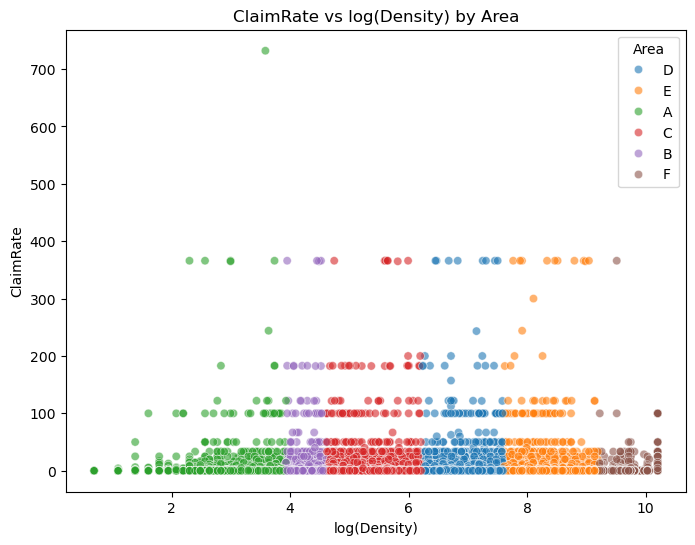

In [92]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=claims_raw, 
                x=np.log1p(claims_raw["Density"]), 
                y="ClaimRate", 
                hue="Area", 
                alpha=0.6)
plt.title("ClaimRate vs log(Density) by Area")
plt.xlabel("log(Density)")
plt.ylabel("ClaimRate")
plt.legend(title="Area")
plt.show()

`Area` is not an independent feature and most likely it’s derived from or highly correlated with the log of `Density` (most likely through binning). So `Area` could be just a categorical encoding of `Density` bins

In [93]:
# Compute mean and range of log(Density) by Area
claims_raw["logDensity"] = np.log1p(claims_raw["Density"])
area_density_summary = claims_raw.groupby("Area")["logDensity"].agg(["min", "max", "mean", "std"])
display(area_density_summary)


min        max      mean       std
Area                                         
A     0.693147   3.931826  3.231109  0.520353
B     3.931826   4.615121  4.277974  0.203915
C     4.615121   6.216606  5.415106  0.464252
D     6.216606   7.597898  6.911397  0.379761
E     7.601902   9.195328  8.302086  0.394726
F     9.211240  10.203629  9.947459  0.344290

In [95]:
area_codes = claims_raw["Area"].astype("category").cat.codes
print(np.corrcoef(area_codes, claims_raw["logDensity"])[0,1])

0.9707143328579899


Yes, these confirm it they are almost perfectly correlated. We missed it before as we didn't take the log of `Density`. So including both in our model could cause multicollinearity. So we can include only one(probably `Density`) to not introduce redundancy.

### `Region` × `Area` × `ClaimRate`

Let's see if certain regions are riskier only in specific area types.

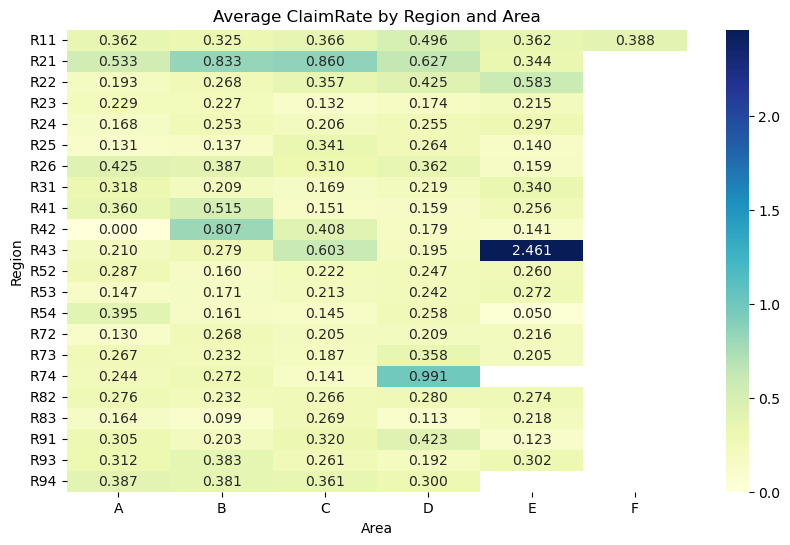

In [98]:
region_area = (
    claims_raw
    .groupby(["Region", "Area"])["ClaimRate"]
    .mean()
    .reset_index()
)
region_area = region_area.sort_values("Region")
plt.figure(figsize=(10, 6))
sns.heatmap(
    region_area.pivot(index="Region", columns="Area", values="ClaimRate"),
    cmap="YlGnBu",
    annot=True,
    fmt=".3f"
)
plt.title("Average ClaimRate by Region and Area")
plt.xlabel("Area")
plt.ylabel("Region")
plt.show()


This shows some localized differences, but no strong global pattern across all regions. **Area A** consistently shows lower claim rates, while **Areas B–E** show pockets of higher ClaimRate within certain regions, but not in a uniform way

### `VehPower` x `VehBrand` x `ClaimRate`

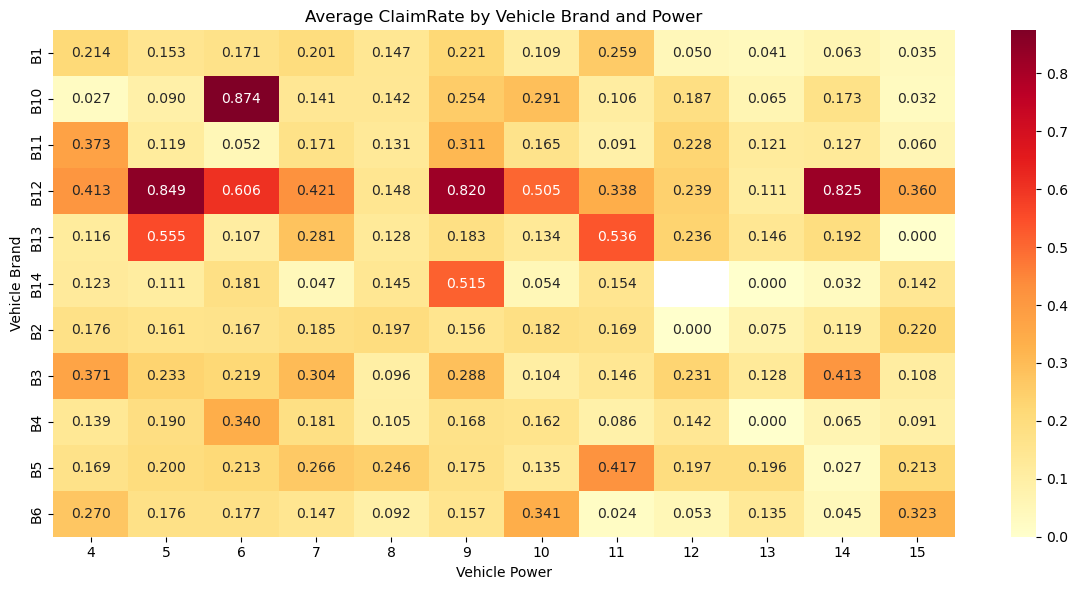

In [101]:
veh_interact = (
    claims_raw
    .groupby(["VehBrand", "VehPower"])["ClaimRate"]
    .mean()
    .reset_index()
)


plt.figure(figsize=(12, 6))
sns.heatmap(
    veh_interact.pivot(index="VehBrand", columns="VehPower", values="ClaimRate"),
    cmap="YlOrRd", annot=True, fmt=".3f"
)
plt.title("Average ClaimRate by Vehicle Brand and Power")
plt.xlabel("Vehicle Power")
plt.ylabel("Vehicle Brand")
plt.tight_layout()
plt.show()


There are some brands with consistent low claims(probably economy cars) and some with high claims (sports cars).


In [105]:
claims_raw["Brand_Power"] = claims_raw["VehBrand"].astype(str) + "_" + claims_raw["VehPower"].astype(str)

combo_stats = claims_raw.groupby("Brand_Power")["ClaimRate"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False)
print(combo_stats.head(10))


                 mean        std  count
Brand_Power                            
B10_6        0.874166  15.256060    748
B12_5        0.849044   8.646176  16485
B12_14       0.824743   7.710097    187
B12_9        0.820346   8.163686   5248
B12_6        0.606476   7.293478  17168
B13_5        0.554685  12.899450    806
B13_11       0.535920   8.742567    441
B14_9        0.515396   9.281055    389
B12_10       0.505144   6.659187  11615
B12_7        0.421077   6.226750  25650


These are the most dangerous types. Brand and Power interact mildly, so a combined feature has predictive value. We could try combining the two features.


### `BonusMalus` x `DriverAge` x `ClaimRate`

/var/folders/7z/z061kg096bs19sl3sxzt8pb00000gn/T/ipykernel_35539/4122924293.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['BM_bucket', 'DrivAge_bin'])['ClaimRate']


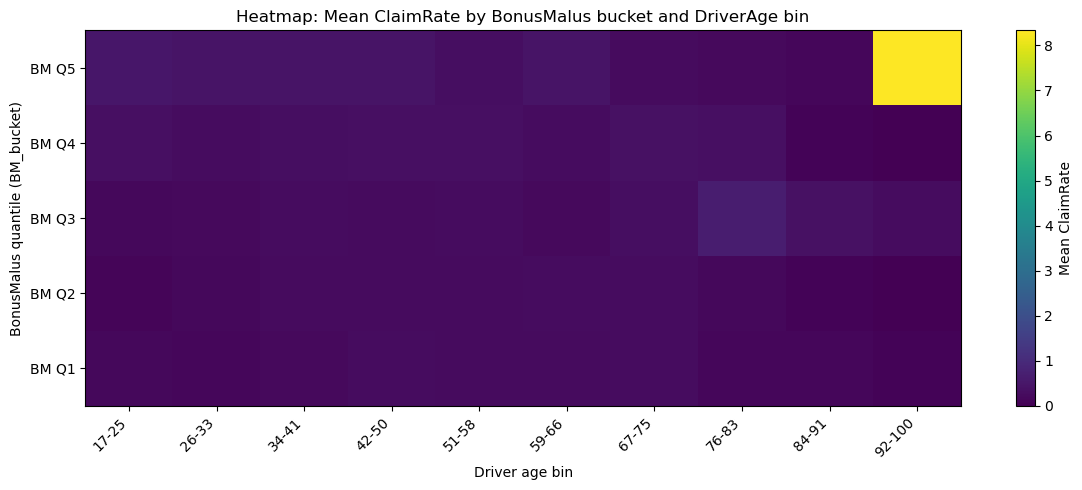

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


n_bm_buckets = 10
n_age_bins = 10       


claims_raw = claims_raw.copy()
claims_raw['BM_bucket'] = pd.qcut(claims_raw['BonusMalus'], q=n_bm_buckets, labels=False, duplicates='drop')
age_bins = np.linspace(claims_raw['DrivAge'].min(), claims_raw['DrivAge'].max()+1, n_age_bins+1)
claims_raw['DrivAge_bin'] = pd.cut(claims_raw['DrivAge'], bins=age_bins, include_lowest=True)

# Pivot to get mean ClaimRate per (BM_bucket x DrivAge_bin)
heat = (
    claims_raw
    .groupby(['BM_bucket', 'DrivAge_bin'])['ClaimRate']
    .mean()
    .unstack(fill_value=np.nan)  
)


age_labels = [f"{int(interval.left)}-{int(interval.right-1)}" for interval in heat.columns]

plt.figure(figsize=(12, 5))
im = plt.imshow(heat.values, aspect='auto', origin='lower')
plt.colorbar(im, label='Mean ClaimRate')
plt.yticks(ticks=np.arange(heat.shape[0]), labels=[f"BM Q{int(i)+1}" for i in heat.index])
plt.xticks(ticks=np.arange(heat.shape[1]), labels=age_labels, rotation=45, ha='right')
plt.xlabel('Driver age bin')
plt.ylabel('BonusMalus quantile (BM_bucket)')
plt.title('Heatmap: Mean ClaimRate by BonusMalus bucket and DriverAge bin')
plt.tight_layout()
plt.show()


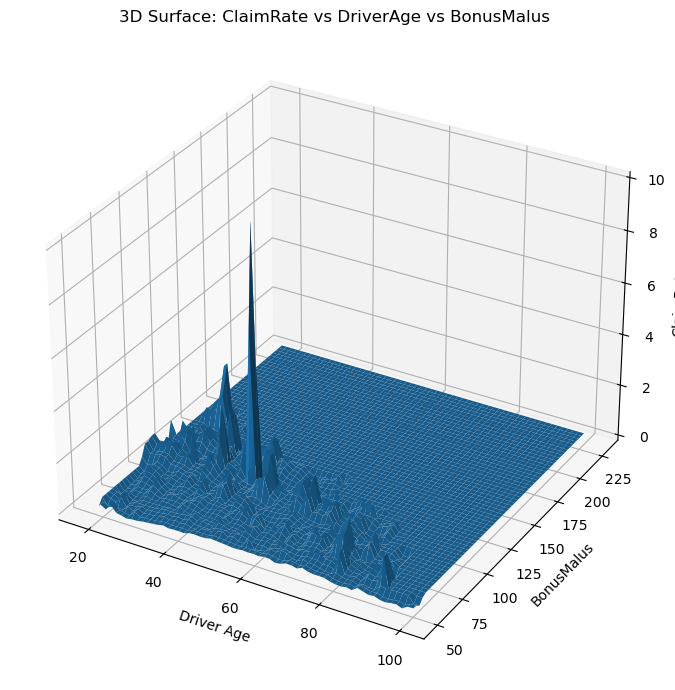

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


age_points = 60
bm_points = 60
age_vals = np.linspace(claims_raw['DrivAge'].min(), claims_raw['DrivAge'].max(), age_points)
bm_vals  = np.linspace(claims_raw['BonusMalus'].min(), claims_raw['BonusMalus'].max(), bm_points)

A, B = np.meshgrid(age_vals, bm_vals)  # shape = (bm_points, age_points)


Z = np.zeros_like(A)

for i in range(bm_points):
    for j in range(age_points):
        df = claims_raw[
            (claims_raw['DrivAge'] >= age_vals[j] - 1) &
            (claims_raw['DrivAge'] <  age_vals[j] + 1) &
            (claims_raw['BonusMalus'] >= bm_vals[i] - 5) &
            (claims_raw['BonusMalus'] <  bm_vals[i] + 5)
        ]
        if len(df) < 10:
            Z[i,j] = claims_raw['ClaimRate'].mean()   # fallback to global mean
        else:
            Z[i,j] = df['ClaimRate'].mean()


fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)

ax.set_xlabel("Driver Age")
ax.set_ylabel("BonusMalus")
ax.set_zlabel("ClaimRate")
ax.set_title("3D Surface: ClaimRate vs DriverAge vs BonusMalus")

plt.tight_layout()
plt.show()


Driver Age and Bonus Malus score matters, and its hard to say if they should be combined.

### Multivariate analysis summary

1. Either `Area` or `Density` can be dropped as they hold the same information.
2. `VehPower` x `VehBrand` could be combined.
3. `DrivAge` x `BonusMalus` most likely should be kept seperate.